In [14]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import os

In [15]:
# Paths
train = '/Users/sarah/PycharmProjects/AMLProject/dataset/dataset_lg/Train'
test = '/Users/sarah/PycharmProjects/AMLProject/dataset/dataset_lg/Test'

# Define train (10901)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(150, 150),
    batch_size=32
)

# Define test (2698)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test,
    image_size=(150, 150),
    batch_size=32
)

Found 23619 files belonging to 18 classes.
Found 6738 files belonging to 14 classes.


In [16]:
# Convert to binary classification for fresh vs. rotten
def binary_conversion(images, labels):
    binary_labels = tf.where(labels < 3, 0, 1)  # 0 for 'fresh', 1 for 'rotten'
    return images, binary_labels

# Apply mapping - notice no parentheses after binary_conversion
train_ds = train_ds.map(binary_conversion)
test_ds = test_ds.map(binary_conversion)

In [17]:
# Scale image pixel values [0, 1]
normalized = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalized(x), y))
test_ds = test_ds.map(lambda x, y: (normalized(x), y))

In [18]:
# CNN model
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

In [19]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)

In [20]:
# Split training data into train and validation
train_size = int(0.8 * len(train_ds))
train_dataset = train_ds.take(train_size)
val_dataset = train_ds.skip(train_size)

history = model.fit(
    train_dataset,
    validation_data=val_dataset, 
    epochs=8
)

Epoch 1/8


2024-12-01 18:30:33.078322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.085378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.090492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.107052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.109234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.110447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.115863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.134994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:33.151479: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  9/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 211ms/step - accuracy: 0.7426 - loss: 0.7961

2024-12-01 18:30:35.305572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 213ms/step - accuracy: 0.7436 - loss: 0.7835

2024-12-01 18:30:35.534463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:35.646983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:35.649298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:35.661497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 216ms/step - accuracy: 0.7440 - loss: 0.7725

2024-12-01 18:30:35.769242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:35.779782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 217ms/step - accuracy: 0.7455 - loss: 0.7615

2024-12-01 18:30:35.997242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:36.008146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 277ms/step - accuracy: 0.7486 - loss: 0.7338

2024-12-01 18:30:37.487920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/591 ━━━━━━━━━━━━━━━━━━━━ 2:46 290ms/step - accuracy: 0.7497 - loss: 0.7259

2024-12-01 18:30:37.964559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:50 297ms/step - accuracy: 0.7507 - loss: 0.7185

2024-12-01 18:30:38.367522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/591 ━━━━━━━━━━━━━━━━━━━━ 2:50 297ms/step - accuracy: 0.7518 - loss: 0.7115

2024-12-01 18:30:38.669202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:38.669468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/591 ━━━━━━━━━━━━━━━━━━━━ 2:48 294ms/step - accuracy: 0.7529 - loss: 0.7047

2024-12-01 18:30:38.920419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:38.922474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:38.928219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:38.931798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 3:01 318ms/step - accuracy: 0.7540 - loss: 0.6984

2024-12-01 18:30:39.646546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:39.646800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:59 316ms/step - accuracy: 0.7552 - loss: 0.6923

2024-12-01 18:30:39.927913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/591 ━━━━━━━━━━━━━━━━━━━━ 2:51 302ms/step - accuracy: 0.7574 - loss: 0.6768

2024-12-01 18:30:40.366185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:40.378646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:40.565905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:40.578684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:40.582140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:49 299ms/step - accuracy: 0.7580 - loss: 0.6721

2024-12-01 18:30:40.787812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:47 296ms/step - accuracy: 0.7588 - loss: 0.6675

2024-12-01 18:30:41.015727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:41.015888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/591 ━━━━━━━━━━━━━━━━━━━━ 2:45 293ms/step - accuracy: 0.7596 - loss: 0.6629

2024-12-01 18:30:41.221767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 287ms/step - accuracy: 0.7608 - loss: 0.6543

2024-12-01 18:30:41.664967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:41.667593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 285ms/step - accuracy: 0.7614 - loss: 0.6503

2024-12-01 18:30:41.871454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:41.874374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:41.875143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:41.881378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 280ms/step - accuracy: 0.7625 - loss: 0.6424

2024-12-01 18:30:42.096119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:42.096180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 276ms/step - accuracy: 0.7645 - loss: 0.6316

2024-12-01 18:30:42.793116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.007952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 273ms/step - accuracy: 0.7661 - loss: 0.6247

2024-12-01 18:30:43.224487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.423720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 271ms/step - accuracy: 0.7669 - loss: 0.6214

2024-12-01 18:30:43.438989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 269ms/step - accuracy: 0.7678 - loss: 0.6182

2024-12-01 18:30:43.853720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.858273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.860691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.868489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.870806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:43.873243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 279ms/step - accuracy: 0.7686 - loss: 0.6151

2024-12-01 18:30:44.509431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:44.512447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/591 ━━━━━━━━━━━━━━━━━━━━ 2:32 278ms/step - accuracy: 0.7703 - loss: 0.6089

2024-12-01 18:30:44.996642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:45.005797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 276ms/step - accuracy: 0.7712 - loss: 0.6059

2024-12-01 18:30:45.224763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 282ms/step - accuracy: 0.7720 - loss: 0.6029

2024-12-01 18:30:45.772822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:45.774841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:45.776139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 285ms/step - accuracy: 0.7729 - loss: 0.6000

2024-12-01 18:30:46.137240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:46.143974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:46.144278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 286ms/step - accuracy: 0.7737 - loss: 0.5971

2024-12-01 18:30:46.507975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 286ms/step - accuracy: 0.7745 - loss: 0.5943

2024-12-01 18:30:46.781706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:46.783946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 295ms/step - accuracy: 0.7761 - loss: 0.5888

2024-12-01 18:30:47.769604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 295ms/step - accuracy: 0.7768 - loss: 0.5862

2024-12-01 18:30:48.075570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:48.076817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:48.078568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 294ms/step - accuracy: 0.7776 - loss: 0.5836

2024-12-01 18:30:48.355647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 294ms/step - accuracy: 0.7783 - loss: 0.5810

2024-12-01 18:30:48.608266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:48.616024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:48.618025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 298ms/step - accuracy: 0.7791 - loss: 0.5786

2024-12-01 18:30:49.108619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:49.117680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 298ms/step - accuracy: 0.7799 - loss: 0.5762

2024-12-01 18:30:49.412142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:49.412234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:49.419451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 296ms/step - accuracy: 0.7814 - loss: 0.5715

2024-12-01 18:30:49.914307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 294ms/step - accuracy: 0.7827 - loss: 0.5672

2024-12-01 18:30:50.174273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:50.377875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:50.388142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:50.392816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 293ms/step - accuracy: 0.7833 - loss: 0.5653

2024-12-01 18:30:50.602279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 292ms/step - accuracy: 0.7839 - loss: 0.5634

2024-12-01 18:30:50.827785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 289ms/step - accuracy: 0.7850 - loss: 0.5597

2024-12-01 18:30:51.274205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:51.274332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:51.283299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:51.289218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 2:32 288ms/step - accuracy: 0.7856 - loss: 0.5579

2024-12-01 18:30:51.496003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 287ms/step - accuracy: 0.7862 - loss: 0.5561

2024-12-01 18:30:51.744306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:51.817276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:51.821579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 288ms/step - accuracy: 0.7873 - loss: 0.5526

2024-12-01 18:30:52.350143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:52.352575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 287ms/step - accuracy: 0.7878 - loss: 0.5508

2024-12-01 18:30:52.602680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 290ms/step - accuracy: 0.7884 - loss: 0.5490

2024-12-01 18:30:53.058400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:53.059683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:53.068206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:53.068363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 69/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 290ms/step - accuracy: 0.7889 - loss: 0.5473

2024-12-01 18:30:53.347160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:53.351757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:53.353015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 289ms/step - accuracy: 0.7900 - loss: 0.5438

2024-12-01 18:30:53.875317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 289ms/step - accuracy: 0.7905 - loss: 0.5422

2024-12-01 18:30:54.164793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:54.166918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 73/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 289ms/step - accuracy: 0.7910 - loss: 0.5406

2024-12-01 18:30:54.421604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 74/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 288ms/step - accuracy: 0.7915 - loss: 0.5390

2024-12-01 18:30:54.666284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:54.671575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 291ms/step - accuracy: 0.7920 - loss: 0.5375

2024-12-01 18:30:55.156305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 76/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 292ms/step - accuracy: 0.7925 - loss: 0.5360

2024-12-01 18:30:55.505817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:55.510791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:55.521101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 291ms/step - accuracy: 0.7934 - loss: 0.5330

2024-12-01 18:30:56.017981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.018003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.018572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.023006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.024146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.026479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 290ms/step - accuracy: 0.7938 - loss: 0.5315

2024-12-01 18:30:56.249558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.265952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 289ms/step - accuracy: 0.7943 - loss: 0.5301

2024-12-01 18:30:56.491051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 289ms/step - accuracy: 0.7947 - loss: 0.5286

2024-12-01 18:30:56.702819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:56.712143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 288ms/step - accuracy: 0.7956 - loss: 0.5257

2024-12-01 18:30:57.232807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:57.234866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:57.238630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 287ms/step - accuracy: 0.7966 - loss: 0.5228

2024-12-01 18:30:57.482777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:57.694751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:57.697454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 286ms/step - accuracy: 0.7970 - loss: 0.5214

2024-12-01 18:30:57.965761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:57.980275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 87/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 286ms/step - accuracy: 0.7975 - loss: 0.5199

2024-12-01 18:30:58.228535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.230906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.243310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.246286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 286ms/step - accuracy: 0.7980 - loss: 0.5185

2024-12-01 18:30:58.497230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.497429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.500949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.508527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.509850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 285ms/step - accuracy: 0.7985 - loss: 0.5171

2024-12-01 18:30:58.719266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:58.724738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 91/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 285ms/step - accuracy: 0.7995 - loss: 0.5143

2024-12-01 18:30:59.226551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 283ms/step - accuracy: 0.8005 - loss: 0.5115

2024-12-01 18:30:59.675635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:59.675947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:30:59.683670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 283ms/step - accuracy: 0.8019 - loss: 0.5074

2024-12-01 18:31:00.465592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 97/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 282ms/step - accuracy: 0.8024 - loss: 0.5061

2024-12-01 18:31:00.737546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 282ms/step - accuracy: 0.8028 - loss: 0.5047

2024-12-01 18:31:00.996267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:01.015958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:01.019912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 282ms/step - accuracy: 0.8033 - loss: 0.5034

2024-12-01 18:31:01.250511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 282ms/step - accuracy: 0.8038 - loss: 0.5022

2024-12-01 18:31:01.498167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


101/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 281ms/step - accuracy: 0.8042 - loss: 0.5009

2024-12-01 18:31:01.730903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:01.744252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 281ms/step - accuracy: 0.8047 - loss: 0.4996

2024-12-01 18:31:01.952429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


103/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 280ms/step - accuracy: 0.8051 - loss: 0.4983

2024-12-01 18:31:02.195880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:02.196713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 281ms/step - accuracy: 0.8056 - loss: 0.4971

2024-12-01 18:31:02.549277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:02.564462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 281ms/step - accuracy: 0.8060 - loss: 0.4958

2024-12-01 18:31:02.881069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:02.881231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:02.881286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:02.886538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 286ms/step - accuracy: 0.8070 - loss: 0.4933

2024-12-01 18:31:04.020274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:04.024873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 290ms/step - accuracy: 0.8074 - loss: 0.4920

2024-12-01 18:31:04.662335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


112/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 297ms/step - accuracy: 0.8093 - loss: 0.4871

2024-12-01 18:31:06.599090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:06.656350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 302ms/step - accuracy: 0.8097 - loss: 0.4859

2024-12-01 18:31:07.407296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 302ms/step - accuracy: 0.8101 - loss: 0.4847

2024-12-01 18:31:07.750995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 302ms/step - accuracy: 0.8106 - loss: 0.4836

2024-12-01 18:31:08.072841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


116/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 302ms/step - accuracy: 0.8110 - loss: 0.4824

2024-12-01 18:31:08.354263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:08.364127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


118/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 301ms/step - accuracy: 0.8119 - loss: 0.4801

2024-12-01 18:31:08.825703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:08.827395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 300ms/step - accuracy: 0.8127 - loss: 0.4778

2024-12-01 18:31:09.288753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:09.292209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:09.295089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 299ms/step - accuracy: 0.8131 - loss: 0.4767

2024-12-01 18:31:09.525348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


122/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 302ms/step - accuracy: 0.8135 - loss: 0.4757

2024-12-01 18:31:10.192832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


123/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 302ms/step - accuracy: 0.8139 - loss: 0.4746

2024-12-01 18:31:10.465053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 301ms/step - accuracy: 0.8143 - loss: 0.4736

2024-12-01 18:31:10.673185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 301ms/step - accuracy: 0.8146 - loss: 0.4725

2024-12-01 18:31:10.899497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:10.907144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 301ms/step - accuracy: 0.8150 - loss: 0.4715

2024-12-01 18:31:11.190977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:11.201976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 300ms/step - accuracy: 0.8154 - loss: 0.4705

2024-12-01 18:31:11.425188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:11.432024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 299ms/step - accuracy: 0.8158 - loss: 0.4695

2024-12-01 18:31:11.652603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 299ms/step - accuracy: 0.8161 - loss: 0.4685

2024-12-01 18:31:11.907032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 299ms/step - accuracy: 0.8165 - loss: 0.4675

2024-12-01 18:31:12.144352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 298ms/step - accuracy: 0.8169 - loss: 0.4666

2024-12-01 18:31:12.369273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 298ms/step - accuracy: 0.8172 - loss: 0.4656

2024-12-01 18:31:12.595170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:12.596684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 297ms/step - accuracy: 0.8176 - loss: 0.4647

2024-12-01 18:31:12.865056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 297ms/step - accuracy: 0.8179 - loss: 0.4638

2024-12-01 18:31:13.094893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:13.107166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 296ms/step - accuracy: 0.8186 - loss: 0.4619

2024-12-01 18:31:13.578503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:13.585314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:13.585349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:13.590066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:13.594523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 295ms/step - accuracy: 0.8189 - loss: 0.4610

2024-12-01 18:31:13.798980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


138/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 295ms/step - accuracy: 0.8193 - loss: 0.4601

2024-12-01 18:31:14.060877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 295ms/step - accuracy: 0.8196 - loss: 0.4592

2024-12-01 18:31:14.342380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:14.347643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 295ms/step - accuracy: 0.8199 - loss: 0.4583

2024-12-01 18:31:14.584611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 294ms/step - accuracy: 0.8203 - loss: 0.4575

2024-12-01 18:31:14.813579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 293ms/step - accuracy: 0.8209 - loss: 0.4557

2024-12-01 18:31:15.056061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:15.276804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 293ms/step - accuracy: 0.8213 - loss: 0.4549

2024-12-01 18:31:15.494776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:15.497480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 293ms/step - accuracy: 0.8219 - loss: 0.4532

2024-12-01 18:31:16.053578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:16.055849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 293ms/step - accuracy: 0.8222 - loss: 0.4523

2024-12-01 18:31:16.412567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 293ms/step - accuracy: 0.8226 - loss: 0.4515

2024-12-01 18:31:16.666470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:16.676712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:16.678203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:16.678344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:16.680063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 293ms/step - accuracy: 0.8229 - loss: 0.4507

2024-12-01 18:31:16.904773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


150/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 292ms/step - accuracy: 0.8232 - loss: 0.4499

2024-12-01 18:31:17.159689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:17.163129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:17.167192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


151/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 292ms/step - accuracy: 0.8235 - loss: 0.4490

2024-12-01 18:31:17.423855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:17.426344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:17.427790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 292ms/step - accuracy: 0.8238 - loss: 0.4482

2024-12-01 18:31:17.659968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:17.665433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 291ms/step - accuracy: 0.8241 - loss: 0.4474

2024-12-01 18:31:17.909421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


154/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 291ms/step - accuracy: 0.8244 - loss: 0.4466

2024-12-01 18:31:18.120816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.125221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.126609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.129127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 290ms/step - accuracy: 0.8247 - loss: 0.4458

2024-12-01 18:31:18.343084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


156/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 290ms/step - accuracy: 0.8250 - loss: 0.4450

2024-12-01 18:31:18.595920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.599513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.602113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.610577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 290ms/step - accuracy: 0.8253 - loss: 0.4442

2024-12-01 18:31:18.920886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.923689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:18.928337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 291ms/step - accuracy: 0.8256 - loss: 0.4435

2024-12-01 18:31:19.399270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


159/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 291ms/step - accuracy: 0.8259 - loss: 0.4427

2024-12-01 18:31:19.656976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 291ms/step - accuracy: 0.8262 - loss: 0.4419

2024-12-01 18:31:19.923099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:19.923550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


161/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 291ms/step - accuracy: 0.8265 - loss: 0.4411

2024-12-01 18:31:20.166219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 291ms/step - accuracy: 0.8268 - loss: 0.4403

2024-12-01 18:31:20.434797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.439108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.439932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 290ms/step - accuracy: 0.8274 - loss: 0.4388

2024-12-01 18:31:20.680702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.689473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.711730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.902165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.902253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:20.910119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 291ms/step - accuracy: 0.8277 - loss: 0.4380

2024-12-01 18:31:21.468776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:21.469065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 292ms/step - accuracy: 0.8280 - loss: 0.4373

2024-12-01 18:31:21.802263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:21.826877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


167/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 292ms/step - accuracy: 0.8283 - loss: 0.4365

2024-12-01 18:31:22.070480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 292ms/step - accuracy: 0.8286 - loss: 0.4357

2024-12-01 18:31:22.302060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 291ms/step - accuracy: 0.8289 - loss: 0.4350

2024-12-01 18:31:22.524052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:22.524404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:22.527887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 291ms/step - accuracy: 0.8292 - loss: 0.4342

2024-12-01 18:31:22.749881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:22.752600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:22.759449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 290ms/step - accuracy: 0.8295 - loss: 0.4335

2024-12-01 18:31:23.004484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 290ms/step - accuracy: 0.8298 - loss: 0.4328

2024-12-01 18:31:23.254105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:23.268317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 290ms/step - accuracy: 0.8301 - loss: 0.4320

2024-12-01 18:31:23.527309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:23.531927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:23.532000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 290ms/step - accuracy: 0.8303 - loss: 0.4313

2024-12-01 18:31:23.766963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:23.776157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 289ms/step - accuracy: 0.8306 - loss: 0.4306

2024-12-01 18:31:23.997221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:24.003142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:24.011251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


177/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 289ms/step - accuracy: 0.8312 - loss: 0.4291

2024-12-01 18:31:24.222029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:24.223943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:24.422753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 288ms/step - accuracy: 0.8315 - loss: 0.4284

2024-12-01 18:31:24.659626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:24.660849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 289ms/step - accuracy: 0.8318 - loss: 0.4276

2024-12-01 18:31:25.117938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:25.118779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 289ms/step - accuracy: 0.8323 - loss: 0.4262

2024-12-01 18:31:25.631036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


182/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 289ms/step - accuracy: 0.8326 - loss: 0.4256

2024-12-01 18:31:25.850570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:25.851342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:25.855715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:25.858429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


183/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 288ms/step - accuracy: 0.8328 - loss: 0.4249

2024-12-01 18:31:26.068357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:26.068865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


184/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 288ms/step - accuracy: 0.8331 - loss: 0.4242

2024-12-01 18:31:26.315199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:26.322170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 288ms/step - accuracy: 0.8334 - loss: 0.4235

2024-12-01 18:31:26.574408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:26.577883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:26.579473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 287ms/step - accuracy: 0.8336 - loss: 0.4228

2024-12-01 18:31:26.793533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:26.808464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:26.808564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 287ms/step - accuracy: 0.8339 - loss: 0.4222

2024-12-01 18:31:27.015173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:27.016428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 287ms/step - accuracy: 0.8341 - loss: 0.4215

2024-12-01 18:31:27.233188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:27.235507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:27.240320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 286ms/step - accuracy: 0.8344 - loss: 0.4209

2024-12-01 18:31:27.465526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:27.477060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 286ms/step - accuracy: 0.8349 - loss: 0.4195

2024-12-01 18:31:27.701783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 286ms/step - accuracy: 0.8351 - loss: 0.4189

2024-12-01 18:31:27.953123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.155775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 285ms/step - accuracy: 0.8354 - loss: 0.4183

2024-12-01 18:31:28.386702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.400184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 285ms/step - accuracy: 0.8356 - loss: 0.4176

2024-12-01 18:31:28.642002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.642849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.644663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 285ms/step - accuracy: 0.8359 - loss: 0.4170

2024-12-01 18:31:28.872495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.884682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.894562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:28.895460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 284ms/step - accuracy: 0.8361 - loss: 0.4163

2024-12-01 18:31:29.085858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 284ms/step - accuracy: 0.8364 - loss: 0.4157

2024-12-01 18:31:29.316710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:29.320574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 285ms/step - accuracy: 0.8366 - loss: 0.4150

2024-12-01 18:31:29.831870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:29.835901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:29.836359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:29.851068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 285ms/step - accuracy: 0.8371 - loss: 0.4138

2024-12-01 18:31:30.091400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:30.307201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:30.308875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 285ms/step - accuracy: 0.8374 - loss: 0.4132

2024-12-01 18:31:30.579382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


202/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 285ms/step - accuracy: 0.8376 - loss: 0.4125

2024-12-01 18:31:30.941341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:30.945917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:30.947144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


204/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 285ms/step - accuracy: 0.8381 - loss: 0.4113

2024-12-01 18:31:31.187999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


205/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 284ms/step - accuracy: 0.8383 - loss: 0.4107

2024-12-01 18:31:31.612579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 284ms/step - accuracy: 0.8386 - loss: 0.4101

2024-12-01 18:31:31.819378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:31.819560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


207/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 284ms/step - accuracy: 0.8388 - loss: 0.4095

2024-12-01 18:31:32.035406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:32.047995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


208/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 283ms/step - accuracy: 0.8390 - loss: 0.4089

2024-12-01 18:31:32.277639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 283ms/step - accuracy: 0.8393 - loss: 0.4083

2024-12-01 18:31:32.505512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 282ms/step - accuracy: 0.8400 - loss: 0.4066

2024-12-01 18:31:32.947443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:33.151989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 281ms/step - accuracy: 0.8404 - loss: 0.4054

2024-12-01 18:31:33.358353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:33.377877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


215/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 281ms/step - accuracy: 0.8407 - loss: 0.4049

2024-12-01 18:31:33.585150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 281ms/step - accuracy: 0.8409 - loss: 0.4043

2024-12-01 18:31:33.810721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:34.020284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 280ms/step - accuracy: 0.8413 - loss: 0.4032

2024-12-01 18:31:34.454528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


219/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 280ms/step - accuracy: 0.8415 - loss: 0.4026

2024-12-01 18:31:34.671381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


220/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 280ms/step - accuracy: 0.8418 - loss: 0.4021

2024-12-01 18:31:34.883490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:34.883640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


221/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 280ms/step - accuracy: 0.8420 - loss: 0.4015

2024-12-01 18:31:35.137711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:35.138639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:35.141660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


222/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 280ms/step - accuracy: 0.8422 - loss: 0.4010

2024-12-01 18:31:35.406988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:35.420544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:35.420565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


223/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 279ms/step - accuracy: 0.8424 - loss: 0.4004

2024-12-01 18:31:35.669000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:35.670654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 280ms/step - accuracy: 0.8426 - loss: 0.3999

2024-12-01 18:31:36.016244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:36.020728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


225/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 280ms/step - accuracy: 0.8428 - loss: 0.3993

2024-12-01 18:31:36.295242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:36.298616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 280ms/step - accuracy: 0.8431 - loss: 0.3988

2024-12-01 18:31:36.546385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:36.550358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


227/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 280ms/step - accuracy: 0.8433 - loss: 0.3982

2024-12-01 18:31:36.823434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:36.824462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


228/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 279ms/step - accuracy: 0.8435 - loss: 0.3977

2024-12-01 18:31:37.049954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:37.051142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:37.051594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


229/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 279ms/step - accuracy: 0.8437 - loss: 0.3972

2024-12-01 18:31:37.278922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:37.282262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:37.286076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 279ms/step - accuracy: 0.8439 - loss: 0.3966

2024-12-01 18:31:37.506340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:37.518694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 280ms/step - accuracy: 0.8443 - loss: 0.3956

2024-12-01 18:31:38.197906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:38.206782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:38.207313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:38.208612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


233/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 280ms/step - accuracy: 0.8446 - loss: 0.3950

2024-12-01 18:31:38.494023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:38.494373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 281ms/step - accuracy: 0.8448 - loss: 0.3945

2024-12-01 18:31:39.064970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:39.070764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 281ms/step - accuracy: 0.8452 - loss: 0.3935

2024-12-01 18:31:39.548528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:39.557384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 280ms/step - accuracy: 0.8454 - loss: 0.3929

2024-12-01 18:31:39.792475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:39.802857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


238/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 280ms/step - accuracy: 0.8456 - loss: 0.3924

2024-12-01 18:31:40.039410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:40.050839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 280ms/step - accuracy: 0.8458 - loss: 0.3919

2024-12-01 18:31:40.269493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 280ms/step - accuracy: 0.8462 - loss: 0.3909

2024-12-01 18:31:40.511158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 279ms/step - accuracy: 0.8464 - loss: 0.3904

2024-12-01 18:31:40.936312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:40.963117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 279ms/step - accuracy: 0.8468 - loss: 0.3894

2024-12-01 18:31:41.145334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:41.146456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:41.147355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:41.362216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 278ms/step - accuracy: 0.8472 - loss: 0.3883

2024-12-01 18:31:41.589955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:41.596229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 278ms/step - accuracy: 0.8477 - loss: 0.3873

2024-12-01 18:31:42.028413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:42.243675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:42.243759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:42.255402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 277ms/step - accuracy: 0.8481 - loss: 0.3863

2024-12-01 18:31:42.674493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 278ms/step - accuracy: 0.8483 - loss: 0.3858

2024-12-01 18:31:43.092905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:43.099849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 278ms/step - accuracy: 0.8485 - loss: 0.3853

2024-12-01 18:31:43.338220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 278ms/step - accuracy: 0.8487 - loss: 0.3848

2024-12-01 18:31:43.571655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 278ms/step - accuracy: 0.8489 - loss: 0.3843

2024-12-01 18:31:43.848559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 277ms/step - accuracy: 0.8493 - loss: 0.3833

2024-12-01 18:31:44.335069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:44.336301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:44.344894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 277ms/step - accuracy: 0.8495 - loss: 0.3828

2024-12-01 18:31:44.605026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:44.609524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 277ms/step - accuracy: 0.8497 - loss: 0.3824

2024-12-01 18:31:44.836504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:44.840482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 277ms/step - accuracy: 0.8500 - loss: 0.3814

2024-12-01 18:31:45.085948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:45.286058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 277ms/step - accuracy: 0.8502 - loss: 0.3809

2024-12-01 18:31:45.523730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 276ms/step - accuracy: 0.8504 - loss: 0.3804

2024-12-01 18:31:45.736191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:45.738275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:45.778717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 276ms/step - accuracy: 0.8506 - loss: 0.3800

2024-12-01 18:31:45.993395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 276ms/step - accuracy: 0.8508 - loss: 0.3795

2024-12-01 18:31:46.246063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:46.259257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


265/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 276ms/step - accuracy: 0.8510 - loss: 0.3791

2024-12-01 18:31:46.509837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 276ms/step - accuracy: 0.8512 - loss: 0.3786

2024-12-01 18:31:46.769325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:46.783095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:46.783185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 276ms/step - accuracy: 0.8514 - loss: 0.3781

2024-12-01 18:31:47.004758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:47.005985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


268/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 276ms/step - accuracy: 0.8515 - loss: 0.3777

2024-12-01 18:31:47.282318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 276ms/step - accuracy: 0.8517 - loss: 0.3772

2024-12-01 18:31:47.523659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:47.524400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 276ms/step - accuracy: 0.8519 - loss: 0.3768

2024-12-01 18:31:47.777580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:47.781139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 275ms/step - accuracy: 0.8521 - loss: 0.3763

2024-12-01 18:31:48.007545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:48.010408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 275ms/step - accuracy: 0.8524 - loss: 0.3755

2024-12-01 18:31:48.252867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:48.256775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:48.261232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:48.450731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:48.452497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 275ms/step - accuracy: 0.8528 - loss: 0.3746

2024-12-01 18:31:48.890522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


276/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 275ms/step - accuracy: 0.8530 - loss: 0.3742

2024-12-01 18:31:49.111473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:49.111675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:49.123557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


277/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 275ms/step - accuracy: 0.8531 - loss: 0.3737

2024-12-01 18:31:49.412318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:49.412648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


278/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 274ms/step - accuracy: 0.8533 - loss: 0.3733

2024-12-01 18:31:49.629894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:49.634019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 274ms/step - accuracy: 0.8535 - loss: 0.3729

2024-12-01 18:31:49.891088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 274ms/step - accuracy: 0.8536 - loss: 0.3725

2024-12-01 18:31:50.115360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 274ms/step - accuracy: 0.8538 - loss: 0.3720

2024-12-01 18:31:50.351393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:50.351698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:50.363316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


283/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 274ms/step - accuracy: 0.8541 - loss: 0.3712

2024-12-01 18:31:50.595085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:50.801617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:50.812546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 274ms/step - accuracy: 0.8543 - loss: 0.3708

2024-12-01 18:31:51.050662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


285/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 273ms/step - accuracy: 0.8545 - loss: 0.3704

2024-12-01 18:31:51.266216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


286/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 273ms/step - accuracy: 0.8546 - loss: 0.3700

2024-12-01 18:31:51.476436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:51.482833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:51.499761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 273ms/step - accuracy: 0.8548 - loss: 0.3696

2024-12-01 18:31:51.696577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:51.710708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 273ms/step - accuracy: 0.8550 - loss: 0.3692

2024-12-01 18:31:51.957513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:51.960189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 273ms/step - accuracy: 0.8551 - loss: 0.3688

2024-12-01 18:31:52.181816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.181932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.187581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.197261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.198274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


290/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 273ms/step - accuracy: 0.8553 - loss: 0.3684

2024-12-01 18:31:52.400367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.403934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.409470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


291/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 272ms/step - accuracy: 0.8554 - loss: 0.3680

2024-12-01 18:31:52.625427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.627460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:52.629395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 273ms/step - accuracy: 0.8559 - loss: 0.3668

2024-12-01 18:31:53.358316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:53.362261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:53.561524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:53.574466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


295/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 273ms/step - accuracy: 0.8561 - loss: 0.3664

2024-12-01 18:31:53.807544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:53.810029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


297/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 272ms/step - accuracy: 0.8564 - loss: 0.3656

2024-12-01 18:31:54.044591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:54.250833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:54.258932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:54.264022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 272ms/step - accuracy: 0.8567 - loss: 0.3648

2024-12-01 18:31:54.709064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:54.714059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 272ms/step - accuracy: 0.8569 - loss: 0.3644

2024-12-01 18:31:54.947550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:54.955902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


303/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 272ms/step - accuracy: 0.8573 - loss: 0.3633

2024-12-01 18:31:55.394348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 271ms/step - accuracy: 0.8575 - loss: 0.3629

2024-12-01 18:31:55.636227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:55.649339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


305/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 271ms/step - accuracy: 0.8576 - loss: 0.3625

2024-12-01 18:31:56.067846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


306/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 271ms/step - accuracy: 0.8578 - loss: 0.3621

2024-12-01 18:31:56.283594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:56.309935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 271ms/step - accuracy: 0.8579 - loss: 0.3618

2024-12-01 18:31:56.517188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:56.527701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 271ms/step - accuracy: 0.8582 - loss: 0.3610

2024-12-01 18:31:56.776314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:56.780020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:56.970645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 270ms/step - accuracy: 0.8584 - loss: 0.3607

2024-12-01 18:31:57.201817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 270ms/step - accuracy: 0.8586 - loss: 0.3599

2024-12-01 18:31:57.648060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:57.651278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 270ms/step - accuracy: 0.8588 - loss: 0.3596

2024-12-01 18:31:57.878585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:57.887694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:57.912853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


314/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 270ms/step - accuracy: 0.8589 - loss: 0.3592

2024-12-01 18:31:58.106764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:58.133388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


315/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 270ms/step - accuracy: 0.8591 - loss: 0.3589

2024-12-01 18:31:58.335511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:58.339220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


316/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 270ms/step - accuracy: 0.8592 - loss: 0.3585

2024-12-01 18:31:58.559277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


317/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 270ms/step - accuracy: 0.8594 - loss: 0.3581

2024-12-01 18:31:58.790314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


319/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 269ms/step - accuracy: 0.8596 - loss: 0.3574

2024-12-01 18:31:59.032500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.8598 - loss: 0.3571

2024-12-01 18:31:59.246801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:59.462173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.8599 - loss: 0.3567

2024-12-01 18:31:59.689145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:59.691248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


322/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.8600 - loss: 0.3564

2024-12-01 18:31:59.900742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:59.901028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:31:59.905781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.8602 - loss: 0.3560

2024-12-01 18:32:00.120827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.120851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.120894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.120980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.128076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.128210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


325/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 268ms/step - accuracy: 0.8605 - loss: 0.3553

2024-12-01 18:32:00.365473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.369474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.369534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:00.579156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 269ms/step - accuracy: 0.8606 - loss: 0.3550

2024-12-01 18:32:00.898499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


329/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 268ms/step - accuracy: 0.8610 - loss: 0.3540

2024-12-01 18:32:01.577176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 268ms/step - accuracy: 0.8611 - loss: 0.3536

2024-12-01 18:32:01.790489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


331/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 268ms/step - accuracy: 0.8613 - loss: 0.3533

2024-12-01 18:32:02.033856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:02.037479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


332/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 268ms/step - accuracy: 0.8614 - loss: 0.3529

2024-12-01 18:32:02.257120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:02.260782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:02.270009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:02.276423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


333/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 268ms/step - accuracy: 0.8615 - loss: 0.3526

2024-12-01 18:32:02.594995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:02.596619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


335/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 269ms/step - accuracy: 0.8618 - loss: 0.3519

2024-12-01 18:32:03.413309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 269ms/step - accuracy: 0.8619 - loss: 0.3516

2024-12-01 18:32:03.854539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:03.859821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:03.860497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 270ms/step - accuracy: 0.8620 - loss: 0.3513

2024-12-01 18:32:04.226658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:04.233994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 270ms/step - accuracy: 0.8622 - loss: 0.3510

2024-12-01 18:32:04.466885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:04.480801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 269ms/step - accuracy: 0.8623 - loss: 0.3506

2024-12-01 18:32:04.706235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:04.707763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:04.710647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:04.713387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:04.714516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 269ms/step - accuracy: 0.8624 - loss: 0.3503

2024-12-01 18:32:04.941093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 269ms/step - accuracy: 0.8627 - loss: 0.3496

2024-12-01 18:32:05.378091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


343/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 269ms/step - accuracy: 0.8628 - loss: 0.3493

2024-12-01 18:32:05.670769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:05.674633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


346/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 269ms/step - accuracy: 0.8632 - loss: 0.3483

2024-12-01 18:32:06.327654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:06.348206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 269ms/step - accuracy: 0.8633 - loss: 0.3480

2024-12-01 18:32:06.568950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:06.573293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:06.574616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 269ms/step - accuracy: 0.8634 - loss: 0.3477

2024-12-01 18:32:06.827730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:06.828954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


349/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 269ms/step - accuracy: 0.8635 - loss: 0.3474

2024-12-01 18:32:07.067318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:07.074925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 268ms/step - accuracy: 0.8637 - loss: 0.3471

2024-12-01 18:32:07.307809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 268ms/step - accuracy: 0.8638 - loss: 0.3468

2024-12-01 18:32:07.552793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:07.558658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 268ms/step - accuracy: 0.8640 - loss: 0.3461

2024-12-01 18:32:08.018677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.018945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


355/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 268ms/step - accuracy: 0.8643 - loss: 0.3455

2024-12-01 18:32:08.458331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.465273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.465374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.8644 - loss: 0.3452

2024-12-01 18:32:08.688295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.701680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.8645 - loss: 0.3449

2024-12-01 18:32:08.900141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.906855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.907820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:08.915503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.8647 - loss: 0.3446

2024-12-01 18:32:09.124893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.129196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.130947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 267ms/step - accuracy: 0.8648 - loss: 0.3442

2024-12-01 18:32:09.349317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.360836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 267ms/step - accuracy: 0.8649 - loss: 0.3439

2024-12-01 18:32:09.581613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.581924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.596610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.596672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.598224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.601856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 267ms/step - accuracy: 0.8650 - loss: 0.3436

2024-12-01 18:32:09.844273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:09.856093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


363/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 267ms/step - accuracy: 0.8653 - loss: 0.3430

2024-12-01 18:32:10.077155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.279678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.284960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 267ms/step - accuracy: 0.8655 - loss: 0.3424

2024-12-01 18:32:10.505886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.512021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.521186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.529180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.706127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


366/591 ━━━━━━━━━━━━━━━━━━━━ 59s 267ms/step - accuracy: 0.8656 - loss: 0.3421 

2024-12-01 18:32:10.916207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:10.916470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 59s 266ms/step - accuracy: 0.8657 - loss: 0.3418

2024-12-01 18:32:11.144349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


368/591 ━━━━━━━━━━━━━━━━━━━━ 59s 266ms/step - accuracy: 0.8659 - loss: 0.3415

2024-12-01 18:32:11.356713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:11.356871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


370/591 ━━━━━━━━━━━━━━━━━━━━ 58s 266ms/step - accuracy: 0.8661 - loss: 0.3409

2024-12-01 18:32:11.575535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 58s 266ms/step - accuracy: 0.8663 - loss: 0.3403

2024-12-01 18:32:12.010434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


373/591 ━━━━━━━━━━━━━━━━━━━━ 57s 266ms/step - accuracy: 0.8665 - loss: 0.3400

2024-12-01 18:32:12.457045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:12.457714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:12.460464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:12.461444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 57s 266ms/step - accuracy: 0.8666 - loss: 0.3397

2024-12-01 18:32:12.672694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


375/591 ━━━━━━━━━━━━━━━━━━━━ 57s 265ms/step - accuracy: 0.8667 - loss: 0.3394

2024-12-01 18:32:12.891058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


376/591 ━━━━━━━━━━━━━━━━━━━━ 57s 265ms/step - accuracy: 0.8668 - loss: 0.3391

2024-12-01 18:32:13.098786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 56s 265ms/step - accuracy: 0.8669 - loss: 0.3388

2024-12-01 18:32:13.317289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:13.332718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 56s 265ms/step - accuracy: 0.8672 - loss: 0.3382

2024-12-01 18:32:13.536165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:13.552812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:13.756675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 55s 265ms/step - accuracy: 0.8673 - loss: 0.3379

2024-12-01 18:32:13.988405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


381/591 ━━━━━━━━━━━━━━━━━━━━ 55s 265ms/step - accuracy: 0.8674 - loss: 0.3376

2024-12-01 18:32:14.286878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


382/591 ━━━━━━━━━━━━━━━━━━━━ 55s 265ms/step - accuracy: 0.8675 - loss: 0.3373

2024-12-01 18:32:14.514031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:14.515916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/591 ━━━━━━━━━━━━━━━━━━━━ 55s 265ms/step - accuracy: 0.8676 - loss: 0.3370

2024-12-01 18:32:14.741046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:14.744022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/591 ━━━━━━━━━━━━━━━━━━━━ 54s 265ms/step - accuracy: 0.8678 - loss: 0.3367

2024-12-01 18:32:14.950186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:14.957732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:14.960239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 54s 264ms/step - accuracy: 0.8679 - loss: 0.3364

2024-12-01 18:32:15.164800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:15.166511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:15.174033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


387/591 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - accuracy: 0.8681 - loss: 0.3358

2024-12-01 18:32:15.602258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - accuracy: 0.8682 - loss: 0.3356

2024-12-01 18:32:15.821231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:15.821947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:15.835728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/591 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - accuracy: 0.8684 - loss: 0.3350

2024-12-01 18:32:16.267070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:16.267376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 52s 264ms/step - accuracy: 0.8687 - loss: 0.3344

2024-12-01 18:32:16.719585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:16.727061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:16.727089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 52s 264ms/step - accuracy: 0.8688 - loss: 0.3341

2024-12-01 18:32:16.954920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:16.956970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:16.960484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:16.961923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 51s 263ms/step - accuracy: 0.8689 - loss: 0.3338

2024-12-01 18:32:17.164484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 51s 263ms/step - accuracy: 0.8691 - loss: 0.3333

2024-12-01 18:32:17.393295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:17.394728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:17.400149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/591 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - accuracy: 0.8693 - loss: 0.3327

2024-12-01 18:32:17.815874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:17.820411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:17.828149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:17.828238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:18.035659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:18.036172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


399/591 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - accuracy: 0.8695 - loss: 0.3324

2024-12-01 18:32:18.266737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - accuracy: 0.8696 - loss: 0.3321

2024-12-01 18:32:18.494564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/591 ━━━━━━━━━━━━━━━━━━━━ 49s 263ms/step - accuracy: 0.8697 - loss: 0.3319

2024-12-01 18:32:18.707974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


402/591 ━━━━━━━━━━━━━━━━━━━━ 49s 263ms/step - accuracy: 0.8698 - loss: 0.3316

2024-12-01 18:32:19.005237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:19.005426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:19.013863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


403/591 ━━━━━━━━━━━━━━━━━━━━ 49s 263ms/step - accuracy: 0.8699 - loss: 0.3313

2024-12-01 18:32:19.236703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:19.241195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:19.242144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/591 ━━━━━━━━━━━━━━━━━━━━ 49s 263ms/step - accuracy: 0.8700 - loss: 0.3310

2024-12-01 18:32:19.496795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 48s 263ms/step - accuracy: 0.8701 - loss: 0.3307

2024-12-01 18:32:19.800174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:19.806408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:19.811127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


406/591 ━━━━━━━━━━━━━━━━━━━━ 48s 263ms/step - accuracy: 0.8702 - loss: 0.3305

2024-12-01 18:32:20.015969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:20.016016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:20.028047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 48s 263ms/step - accuracy: 0.8703 - loss: 0.3302

2024-12-01 18:32:20.235264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 48s 262ms/step - accuracy: 0.8704 - loss: 0.3299

2024-12-01 18:32:20.470369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


409/591 ━━━━━━━━━━━━━━━━━━━━ 47s 262ms/step - accuracy: 0.8706 - loss: 0.3296

2024-12-01 18:32:20.712136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 47s 262ms/step - accuracy: 0.8707 - loss: 0.3294

2024-12-01 18:32:20.919908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:20.927790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


412/591 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.8709 - loss: 0.3288

2024-12-01 18:32:21.131714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:21.135299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:21.143125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:21.158539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/591 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.8710 - loss: 0.3286

2024-12-01 18:32:21.576602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/591 ━━━━━━━━━━━━━━━━━━━━ 45s 262ms/step - accuracy: 0.8715 - loss: 0.3272

2024-12-01 18:32:22.483673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:22.484564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:22.689601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:22.692903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:22.706318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/591 ━━━━━━━━━━━━━━━━━━━━ 44s 261ms/step - accuracy: 0.8718 - loss: 0.3265

2024-12-01 18:32:23.373564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 43s 261ms/step - accuracy: 0.8720 - loss: 0.3259

2024-12-01 18:32:23.826365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


426/591 ━━━━━━━━━━━━━━━━━━━━ 43s 261ms/step - accuracy: 0.8723 - loss: 0.3252

2024-12-01 18:32:24.491644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:24.493729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


427/591 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - accuracy: 0.8725 - loss: 0.3249

2024-12-01 18:32:24.706690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:24.717176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - accuracy: 0.8727 - loss: 0.3244

2024-12-01 18:32:25.170074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:25.172362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.8728 - loss: 0.3241

2024-12-01 18:32:25.527167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:25.528383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


431/591 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.8729 - loss: 0.3239

2024-12-01 18:32:25.771104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:25.771139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


432/591 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.8730 - loss: 0.3236

2024-12-01 18:32:25.993275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:25.993399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:25.998181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:25.999408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:26.000268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


433/591 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.8731 - loss: 0.3234

2024-12-01 18:32:26.215276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:26.222603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


436/591 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - accuracy: 0.8734 - loss: 0.3226

2024-12-01 18:32:26.653776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - accuracy: 0.8735 - loss: 0.3224

2024-12-01 18:32:26.858077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:27.061841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 39s 260ms/step - accuracy: 0.8737 - loss: 0.3219

2024-12-01 18:32:27.281497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:27.294895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:27.302881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


441/591 ━━━━━━━━━━━━━━━━━━━━ 38s 260ms/step - accuracy: 0.8739 - loss: 0.3214

2024-12-01 18:32:27.700203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:27.894652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.8742 - loss: 0.3206

2024-12-01 18:32:28.323790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:28.517060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:28.533269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/591 ━━━━━━━━━━━━━━━━━━━━ 37s 259ms/step - accuracy: 0.8743 - loss: 0.3204

2024-12-01 18:32:28.722643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:28.723560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:28.724165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


447/591 ━━━━━━━━━━━━━━━━━━━━ 37s 259ms/step - accuracy: 0.8745 - loss: 0.3199

2024-12-01 18:32:28.928029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:29.136859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


448/591 ━━━━━━━━━━━━━━━━━━━━ 37s 259ms/step - accuracy: 0.8746 - loss: 0.3196

2024-12-01 18:32:29.142624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:29.155011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


449/591 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.8747 - loss: 0.3194

2024-12-01 18:32:29.552055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.8748 - loss: 0.3191

2024-12-01 18:32:29.785094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:29.787036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/591 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.8749 - loss: 0.3189

2024-12-01 18:32:30.149346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:30.152564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:30.155261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 35s 259ms/step - accuracy: 0.8750 - loss: 0.3186

2024-12-01 18:32:30.360955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:30.365896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:30.367556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 35s 259ms/step - accuracy: 0.8752 - loss: 0.3182

2024-12-01 18:32:30.583125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:30.599175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:30.599242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


456/591 ━━━━━━━━━━━━━━━━━━━━ 34s 258ms/step - accuracy: 0.8754 - loss: 0.3177

2024-12-01 18:32:31.007045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:31.007081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:31.013188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:31.027558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:31.034974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


458/591 ━━━━━━━━━━━━━━━━━━━━ 34s 258ms/step - accuracy: 0.8756 - loss: 0.3172

2024-12-01 18:32:31.424321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:31.615867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 33s 258ms/step - accuracy: 0.8759 - loss: 0.3165

2024-12-01 18:32:32.055626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/591 ━━━━━━━━━━━━━━━━━━━━ 33s 258ms/step - accuracy: 0.8759 - loss: 0.3162

2024-12-01 18:32:32.276457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:32.276731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:32.466928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 32s 258ms/step - accuracy: 0.8760 - loss: 0.3160

2024-12-01 18:32:32.485590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:32.656352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:32.665554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:32.674274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/591 ━━━━━━━━━━━━━━━━━━━━ 32s 258ms/step - accuracy: 0.8761 - loss: 0.3158

2024-12-01 18:32:32.860592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:32.867449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


465/591 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step - accuracy: 0.8762 - loss: 0.3155

2024-12-01 18:32:33.082365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:33.082915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.8764 - loss: 0.3151

2024-12-01 18:32:33.309930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:33.505418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


470/591 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.8767 - loss: 0.3144

2024-12-01 18:32:33.932738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.8768 - loss: 0.3141

2024-12-01 18:32:34.141543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:34.168633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.8769 - loss: 0.3139

2024-12-01 18:32:34.348375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:34.541948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:34.542446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.8770 - loss: 0.3137

2024-12-01 18:32:34.745768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:34.746000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:34.747769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:34.751598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.8771 - loss: 0.3135

2024-12-01 18:32:34.953323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


475/591 ━━━━━━━━━━━━━━━━━━━━ 29s 256ms/step - accuracy: 0.8772 - loss: 0.3132

2024-12-01 18:32:35.171229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:35.177607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


476/591 ━━━━━━━━━━━━━━━━━━━━ 29s 256ms/step - accuracy: 0.8773 - loss: 0.3130

2024-12-01 18:32:35.387730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


478/591 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.8775 - loss: 0.3125

2024-12-01 18:32:35.605923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


479/591 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.8775 - loss: 0.3123

2024-12-01 18:32:35.812498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.013957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


480/591 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.8776 - loss: 0.3121

2024-12-01 18:32:36.020322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.224608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.224782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.229321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


481/591 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.8777 - loss: 0.3119

2024-12-01 18:32:36.232860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.418184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


484/591 ━━━━━━━━━━━━━━━━━━━━ 27s 256ms/step - accuracy: 0.8780 - loss: 0.3112

2024-12-01 18:32:36.848525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.850794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:36.852024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


485/591 ━━━━━━━━━━━━━━━━━━━━ 27s 255ms/step - accuracy: 0.8781 - loss: 0.3110

2024-12-01 18:32:37.061023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.244953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.252504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.258777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.8783 - loss: 0.3105

2024-12-01 18:32:37.456921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.457012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.480217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


488/591 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.8784 - loss: 0.3103

2024-12-01 18:32:37.673420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.673566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.689181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.869419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:37.870290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.8785 - loss: 0.3101

2024-12-01 18:32:38.067948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.068298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.068869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/591 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - accuracy: 0.8786 - loss: 0.3096

2024-12-01 18:32:38.294865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.480239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.480337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.485780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.487174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


492/591 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - accuracy: 0.8787 - loss: 0.3094

2024-12-01 18:32:38.688104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.689019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.689921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.690550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step - accuracy: 0.8789 - loss: 0.3090

2024-12-01 18:32:38.902510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:38.920635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.095321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.097901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.099675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.100373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.102192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.103371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 24s 254ms/step - accuracy: 0.8791 - loss: 0.3085

2024-12-01 18:32:39.514839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.517209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.518587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/591 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 0.8792 - loss: 0.3083

2024-12-01 18:32:39.756121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/591 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 0.8793 - loss: 0.3081

2024-12-01 18:32:39.986802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:39.992537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:40.186173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/591 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 0.8794 - loss: 0.3077

2024-12-01 18:32:40.193506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:40.201974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:40.211911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/591 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.8795 - loss: 0.3075

2024-12-01 18:32:40.404555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:40.612645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:40.618007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


502/591 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.8796 - loss: 0.3072

2024-12-01 18:32:40.948751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.8798 - loss: 0.3068

2024-12-01 18:32:41.204229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:41.204246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:41.396653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/591 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.8799 - loss: 0.3066

2024-12-01 18:32:41.424784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:41.626256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.8801 - loss: 0.3062

2024-12-01 18:32:41.868125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.049739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.060400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.8801 - loss: 0.3060

2024-12-01 18:32:42.251394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


509/591 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.8802 - loss: 0.3058

2024-12-01 18:32:42.486866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.492559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.495477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


511/591 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.8804 - loss: 0.3053

2024-12-01 18:32:42.730612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.736405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.737092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.739388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:42.740261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


512/591 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - accuracy: 0.8805 - loss: 0.3051

2024-12-01 18:32:43.159685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:43.165982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/591 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.8807 - loss: 0.3045

2024-12-01 18:32:43.946419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:43.946781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:43.961254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:43.969363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:43.971330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


516/591 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.8808 - loss: 0.3043

2024-12-01 18:32:44.220126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:44.239422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:44.240344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


517/591 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - accuracy: 0.8809 - loss: 0.3041

2024-12-01 18:32:44.441169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:44.444558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


519/591 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.8811 - loss: 0.3037

2024-12-01 18:32:44.861474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


520/591 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.8811 - loss: 0.3035

2024-12-01 18:32:45.075215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.8812 - loss: 0.3033

2024-12-01 18:32:45.307354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:45.313854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


522/591 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.8813 - loss: 0.3031

2024-12-01 18:32:45.539006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.8814 - loss: 0.3029

2024-12-01 18:32:45.830325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


525/591 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.8816 - loss: 0.3025

2024-12-01 18:32:46.098334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:46.282796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


526/591 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.8816 - loss: 0.3023

2024-12-01 18:32:46.486339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:46.495264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:46.505330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


527/591 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.8817 - loss: 0.3021

2024-12-01 18:32:46.706429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:46.715319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


528/591 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - accuracy: 0.8818 - loss: 0.3019

2024-12-01 18:32:46.933744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


529/591 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - accuracy: 0.8819 - loss: 0.3017

2024-12-01 18:32:47.154061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - accuracy: 0.8820 - loss: 0.3015

2024-12-01 18:32:47.394417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - accuracy: 0.8821 - loss: 0.3013

2024-12-01 18:32:47.610399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:47.610721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:47.615726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:47.617369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:47.623591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - accuracy: 0.8822 - loss: 0.3009

2024-12-01 18:32:47.846388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:47.846401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:47.868993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


534/591 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - accuracy: 0.8823 - loss: 0.3007

2024-12-01 18:32:48.070179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:48.276583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


536/591 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.8825 - loss: 0.3003

2024-12-01 18:32:48.469784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:48.470237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:48.687816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.8827 - loss: 0.2997

2024-12-01 18:32:49.158326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:49.349605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


541/591 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - accuracy: 0.8829 - loss: 0.2993

2024-12-01 18:32:49.560729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


543/591 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - accuracy: 0.8830 - loss: 0.2989

2024-12-01 18:32:49.988003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:50.171866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


544/591 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.8831 - loss: 0.2987

2024-12-01 18:32:50.383041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


546/591 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.8832 - loss: 0.2983

2024-12-01 18:32:50.856791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


548/591 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.8834 - loss: 0.2979

2024-12-01 18:32:51.077570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:51.287369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


549/591 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.8835 - loss: 0.2977

2024-12-01 18:32:51.294620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:51.294741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:51.496485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.8836 - loss: 0.2973

2024-12-01 18:32:51.923794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:51.928218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


552/591 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.8837 - loss: 0.2972 

2024-12-01 18:32:52.151988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:52.163449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:52.163544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:52.165281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:52.183339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.8838 - loss: 0.2970

2024-12-01 18:32:52.422963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:52.431859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


555/591 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.8840 - loss: 0.2966

2024-12-01 18:32:53.146835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


556/591 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.8840 - loss: 0.2964

2024-12-01 18:32:53.410601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.8842 - loss: 0.2960

2024-12-01 18:32:53.871000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:53.875238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


560/591 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.8843 - loss: 0.2956

2024-12-01 18:32:54.327080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:54.337646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:54.341224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.8844 - loss: 0.2954

2024-12-01 18:32:54.599612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:54.608212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


562/591 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.8845 - loss: 0.2953

2024-12-01 18:32:54.860455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/591 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8846 - loss: 0.2949

2024-12-01 18:32:55.106123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:55.297812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:55.305376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/591 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8847 - loss: 0.2947

2024-12-01 18:32:55.518232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:55.518356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8849 - loss: 0.2943

2024-12-01 18:32:55.985610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


568/591 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.8849 - loss: 0.2941

2024-12-01 18:32:56.201837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:56.207583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


569/591 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.8850 - loss: 0.2940

2024-12-01 18:32:56.445703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:56.447198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:56.451508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


571/591 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.8852 - loss: 0.2936

2024-12-01 18:32:56.873317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:56.874019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.8854 - loss: 0.2930

2024-12-01 18:32:57.319864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


575/591 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.8855 - loss: 0.2928

2024-12-01 18:32:57.718913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


576/591 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.8855 - loss: 0.2927

2024-12-01 18:32:57.980274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:57.982714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.8857 - loss: 0.2923

2024-12-01 18:32:58.195538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:58.201042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.8858 - loss: 0.2919

2024-12-01 18:32:58.905983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:58.906300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


581/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.8859 - loss: 0.2918

2024-12-01 18:32:59.122627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:59.131056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.8860 - loss: 0.2916

2024-12-01 18:32:59.366092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:59.368521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:59.369452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


583/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.8861 - loss: 0.2914

2024-12-01 18:32:59.631049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:59.631182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


585/591 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.8862 - loss: 0.2910

2024-12-01 18:32:59.861475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:32:59.869851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


586/591 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.8863 - loss: 0.2909

2024-12-01 18:33:00.087603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:00.286371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.8864 - loss: 0.2905

2024-12-01 18:33:00.711391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:00.714772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:00.724759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.8866 - loss: 0.2901

2024-12-01 18:33:00.967779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.8866 - loss: 0.2900

2024-12-01 18:33:01.668386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.668617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.672450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.676827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.681872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.687671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.694030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.695194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:01.698571: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 167s 281ms/step - accuracy: 0.8867 - loss: 0.2898 - val_accuracy: 0.9575 - val_loss: 0.1086
Epoch 2/8


2024-12-01 18:33:19.307114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.312349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.312374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.312421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.314221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.348563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.349017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.367391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:19.369280: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  9/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 218ms/step - accuracy: 0.9027 - loss: 0.2342

2024-12-01 18:33:21.381533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:21.595722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 233ms/step - accuracy: 0.9043 - loss: 0.2290

2024-12-01 18:33:21.895859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:21.912757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:21.917468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:21.940554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:21.940612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 244ms/step - accuracy: 0.9055 - loss: 0.2243

2024-12-01 18:33:22.272899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:22.274701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 245ms/step - accuracy: 0.9064 - loss: 0.2199

2024-12-01 18:33:22.543873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 254ms/step - accuracy: 0.9075 - loss: 0.2155

2024-12-01 18:33:22.892264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:22.902237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:22.903937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:22.910565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 252ms/step - accuracy: 0.9113 - loss: 0.2041

2024-12-01 18:33:23.410042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 250ms/step - accuracy: 0.9125 - loss: 0.2009

2024-12-01 18:33:23.842584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:23.843405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:23.849219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:23.854909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 247ms/step - accuracy: 0.9149 - loss: 0.1952

2024-12-01 18:33:24.281612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:24.281646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 246ms/step - accuracy: 0.9160 - loss: 0.1925

2024-12-01 18:33:24.524502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 246ms/step - accuracy: 0.9172 - loss: 0.1898

2024-12-01 18:33:24.767541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 22/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 245ms/step - accuracy: 0.9184 - loss: 0.1872

2024-12-01 18:33:24.998339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 244ms/step - accuracy: 0.9194 - loss: 0.1850

2024-12-01 18:33:25.212518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 246ms/step - accuracy: 0.9203 - loss: 0.1830

2024-12-01 18:33:25.497265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 246ms/step - accuracy: 0.9212 - loss: 0.1812

2024-12-01 18:33:25.736463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:25.745564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:25.756351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 245ms/step - accuracy: 0.9221 - loss: 0.1794

2024-12-01 18:33:25.964726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:25.971330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 245ms/step - accuracy: 0.9230 - loss: 0.1776

2024-12-01 18:33:26.193336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:26.204569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 244ms/step - accuracy: 0.9239 - loss: 0.1758

2024-12-01 18:33:26.449466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 244ms/step - accuracy: 0.9247 - loss: 0.1742

2024-12-01 18:33:26.680855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 243ms/step - accuracy: 0.9255 - loss: 0.1725

2024-12-01 18:33:26.888628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:26.898110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:26.899165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 245ms/step - accuracy: 0.9262 - loss: 0.1709

2024-12-01 18:33:27.217494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 246ms/step - accuracy: 0.9270 - loss: 0.1694

2024-12-01 18:33:27.485888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 248ms/step - accuracy: 0.9285 - loss: 0.1663

2024-12-01 18:33:28.036080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 36/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 247ms/step - accuracy: 0.9300 - loss: 0.1633

2024-12-01 18:33:28.288958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 246ms/step - accuracy: 0.9307 - loss: 0.1618

2024-12-01 18:33:28.723671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 246ms/step - accuracy: 0.9320 - loss: 0.1590

2024-12-01 18:33:28.954144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.168953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.174142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 246ms/step - accuracy: 0.9326 - loss: 0.1576

2024-12-01 18:33:29.417197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.417216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.421653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.422237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 245ms/step - accuracy: 0.9333 - loss: 0.1563

2024-12-01 18:33:29.637706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.645080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 245ms/step - accuracy: 0.9339 - loss: 0.1550

2024-12-01 18:33:29.859313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.859385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.867186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:29.867576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 244ms/step - accuracy: 0.9344 - loss: 0.1539

2024-12-01 18:33:30.078789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 244ms/step - accuracy: 0.9349 - loss: 0.1528

2024-12-01 18:33:30.312236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:30.316051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 244ms/step - accuracy: 0.9359 - loss: 0.1510

2024-12-01 18:33:30.801524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:30.801591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 243ms/step - accuracy: 0.9363 - loss: 0.1503

2024-12-01 18:33:31.034791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.039643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.039700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.040656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.045676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 243ms/step - accuracy: 0.9367 - loss: 0.1496

2024-12-01 18:33:31.306244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.306490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.329490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.333315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 244ms/step - accuracy: 0.9371 - loss: 0.1488

2024-12-01 18:33:31.568073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 244ms/step - accuracy: 0.9375 - loss: 0.1481

2024-12-01 18:33:31.806234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:31.810403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 244ms/step - accuracy: 0.9379 - loss: 0.1474

2024-12-01 18:33:32.024919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 244ms/step - accuracy: 0.9383 - loss: 0.1467

2024-12-01 18:33:32.268237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:32.292457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 243ms/step - accuracy: 0.9386 - loss: 0.1461

2024-12-01 18:33:32.491419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 243ms/step - accuracy: 0.9389 - loss: 0.1455

2024-12-01 18:33:32.699698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:32.703586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 55/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 244ms/step - accuracy: 0.9393 - loss: 0.1449

2024-12-01 18:33:32.996455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:33.005192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 244ms/step - accuracy: 0.9396 - loss: 0.1443

2024-12-01 18:33:33.257824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:33.273464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 244ms/step - accuracy: 0.9399 - loss: 0.1437

2024-12-01 18:33:33.519714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:33.525307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:33.528146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 244ms/step - accuracy: 0.9402 - loss: 0.1432

2024-12-01 18:33:33.780522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:33.793186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 244ms/step - accuracy: 0.9405 - loss: 0.1426

2024-12-01 18:33:34.026317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 247ms/step - accuracy: 0.9410 - loss: 0.1415

2024-12-01 18:33:34.692143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 248ms/step - accuracy: 0.9415 - loss: 0.1405

2024-12-01 18:33:35.235591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:35.440836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 247ms/step - accuracy: 0.9420 - loss: 0.1395

2024-12-01 18:33:35.654529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:35.658742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:35.663116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 247ms/step - accuracy: 0.9422 - loss: 0.1390

2024-12-01 18:33:35.886346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 247ms/step - accuracy: 0.9425 - loss: 0.1384

2024-12-01 18:33:36.112777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:36.128666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:36.133360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 247ms/step - accuracy: 0.9427 - loss: 0.1379

2024-12-01 18:33:36.371896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 69/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 247ms/step - accuracy: 0.9430 - loss: 0.1374

2024-12-01 18:33:36.646652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:36.648152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:36.651915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 247ms/step - accuracy: 0.9432 - loss: 0.1369

2024-12-01 18:33:36.909861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:36.917135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 247ms/step - accuracy: 0.9436 - loss: 0.1359

2024-12-01 18:33:37.367897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 73/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 246ms/step - accuracy: 0.9439 - loss: 0.1355

2024-12-01 18:33:37.583654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:37.590189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 74/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 247ms/step - accuracy: 0.9441 - loss: 0.1350

2024-12-01 18:33:37.844485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 246ms/step - accuracy: 0.9443 - loss: 0.1345

2024-12-01 18:33:38.070278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:38.078249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 76/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 246ms/step - accuracy: 0.9445 - loss: 0.1341

2024-12-01 18:33:38.311118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 246ms/step - accuracy: 0.9447 - loss: 0.1337

2024-12-01 18:33:38.545309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:38.545717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 247ms/step - accuracy: 0.9449 - loss: 0.1333

2024-12-01 18:33:38.839525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:38.853491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 247ms/step - accuracy: 0.9451 - loss: 0.1329

2024-12-01 18:33:39.083229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 246ms/step - accuracy: 0.9455 - loss: 0.1321

2024-12-01 18:33:39.324083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:39.326984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:39.522614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 247ms/step - accuracy: 0.9457 - loss: 0.1317

2024-12-01 18:33:39.840487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:39.840754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:39.854893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 247ms/step - accuracy: 0.9459 - loss: 0.1313

2024-12-01 18:33:40.074368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:40.076404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 246ms/step - accuracy: 0.9461 - loss: 0.1309

2024-12-01 18:33:40.297382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 246ms/step - accuracy: 0.9463 - loss: 0.1305

2024-12-01 18:33:40.537011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:40.543670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 246ms/step - accuracy: 0.9464 - loss: 0.1301

2024-12-01 18:33:40.752676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 87/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 246ms/step - accuracy: 0.9466 - loss: 0.1298

2024-12-01 18:33:40.976106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 245ms/step - accuracy: 0.9468 - loss: 0.1294

2024-12-01 18:33:41.190363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.191721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.192569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.196677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 245ms/step - accuracy: 0.9470 - loss: 0.1291

2024-12-01 18:33:41.401921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.406638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.407545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.410049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 245ms/step - accuracy: 0.9471 - loss: 0.1287

2024-12-01 18:33:41.645980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 244ms/step - accuracy: 0.9475 - loss: 0.1280

2024-12-01 18:33:41.861186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:41.877877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 244ms/step - accuracy: 0.9476 - loss: 0.1276

2024-12-01 18:33:42.282006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:42.285978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 243ms/step - accuracy: 0.9481 - loss: 0.1266

2024-12-01 18:33:42.936030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:42.952276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 243ms/step - accuracy: 0.9484 - loss: 0.1259

2024-12-01 18:33:43.173978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:43.177267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:43.385764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 243ms/step - accuracy: 0.9487 - loss: 0.1252

2024-12-01 18:33:43.648174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:43.859782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:43.860493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


103/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 242ms/step - accuracy: 0.9491 - loss: 0.1244

2024-12-01 18:33:44.298407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 241ms/step - accuracy: 0.9492 - loss: 0.1241

2024-12-01 18:33:44.505091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 241ms/step - accuracy: 0.9494 - loss: 0.1239

2024-12-01 18:33:44.720374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:44.930379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:44.930617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 241ms/step - accuracy: 0.9495 - loss: 0.1236

2024-12-01 18:33:45.146061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.154865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 241ms/step - accuracy: 0.9497 - loss: 0.1231

2024-12-01 18:33:45.369360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.370056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.395454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.587078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.591639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


109/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 240ms/step - accuracy: 0.9498 - loss: 0.1228

2024-12-01 18:33:45.797556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.805298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:45.808396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


111/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 240ms/step - accuracy: 0.9501 - loss: 0.1223

2024-12-01 18:33:46.028306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


112/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 240ms/step - accuracy: 0.9502 - loss: 0.1221

2024-12-01 18:33:46.444904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:46.452060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:46.461388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 239ms/step - accuracy: 0.9503 - loss: 0.1218

2024-12-01 18:33:46.648653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:46.651484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 239ms/step - accuracy: 0.9504 - loss: 0.1216

2024-12-01 18:33:46.878635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:46.880250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 240ms/step - accuracy: 0.9505 - loss: 0.1214

2024-12-01 18:33:47.161174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 240ms/step - accuracy: 0.9508 - loss: 0.1207

2024-12-01 18:33:47.915194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 239ms/step - accuracy: 0.9510 - loss: 0.1204

2024-12-01 18:33:48.563595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:48.565062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:48.568077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


122/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 239ms/step - accuracy: 0.9511 - loss: 0.1202

2024-12-01 18:33:48.800747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:48.801058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:48.801078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


123/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 240ms/step - accuracy: 0.9512 - loss: 0.1201

2024-12-01 18:33:49.068670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 240ms/step - accuracy: 0.9513 - loss: 0.1199

2024-12-01 18:33:49.295380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:49.308830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 240ms/step - accuracy: 0.9513 - loss: 0.1198

2024-12-01 18:33:49.576595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:49.580969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 240ms/step - accuracy: 0.9516 - loss: 0.1193

2024-12-01 18:33:50.317206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 240ms/step - accuracy: 0.9517 - loss: 0.1191

2024-12-01 18:33:50.574284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:50.578690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 241ms/step - accuracy: 0.9518 - loss: 0.1190

2024-12-01 18:33:50.900380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:50.900747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:50.903464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:50.905791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:50.911889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 241ms/step - accuracy: 0.9519 - loss: 0.1187

2024-12-01 18:33:51.144215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:51.355356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:51.358197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 240ms/step - accuracy: 0.9521 - loss: 0.1184

2024-12-01 18:33:51.797805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 240ms/step - accuracy: 0.9522 - loss: 0.1182

2024-12-01 18:33:52.017552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:52.023431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:52.029857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 240ms/step - accuracy: 0.9522 - loss: 0.1181

2024-12-01 18:33:52.238249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:52.239082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 240ms/step - accuracy: 0.9523 - loss: 0.1179

2024-12-01 18:33:52.459883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:52.466547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


138/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 240ms/step - accuracy: 0.9524 - loss: 0.1178

2024-12-01 18:33:52.693514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 243ms/step - accuracy: 0.9525 - loss: 0.1176

2024-12-01 18:33:53.434862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:53.441817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 244ms/step - accuracy: 0.9526 - loss: 0.1175

2024-12-01 18:33:53.706710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 244ms/step - accuracy: 0.9526 - loss: 0.1173

2024-12-01 18:33:53.937183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:53.941639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:53.947317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 243ms/step - accuracy: 0.9527 - loss: 0.1172

2024-12-01 18:33:54.177282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 244ms/step - accuracy: 0.9528 - loss: 0.1170

2024-12-01 18:33:54.420475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:54.438992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:54.441275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 245ms/step - accuracy: 0.9529 - loss: 0.1169

2024-12-01 18:33:54.908231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:54.929481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:54.936564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 246ms/step - accuracy: 0.9530 - loss: 0.1166

2024-12-01 18:33:55.445491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:55.451304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 245ms/step - accuracy: 0.9532 - loss: 0.1162

2024-12-01 18:33:55.901801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:55.927709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 244ms/step - accuracy: 0.9534 - loss: 0.1159

2024-12-01 18:33:56.554147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:56.749501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:56.762757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 244ms/step - accuracy: 0.9535 - loss: 0.1158

2024-12-01 18:33:56.979128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 244ms/step - accuracy: 0.9536 - loss: 0.1156

2024-12-01 18:33:57.209625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:57.209859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:57.408767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:57.414268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:57.420710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:57.421851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 244ms/step - accuracy: 0.9538 - loss: 0.1153

2024-12-01 18:33:57.894395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:57.909313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:58.096911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:58.101791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 243ms/step - accuracy: 0.9539 - loss: 0.1151

2024-12-01 18:33:58.542450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:58.547634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 243ms/step - accuracy: 0.9541 - loss: 0.1149

2024-12-01 18:33:58.985087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:58.985302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:59.004657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 243ms/step - accuracy: 0.9541 - loss: 0.1148

2024-12-01 18:33:59.196145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:59.196423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:59.212624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:59.215275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:33:59.218776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 243ms/step - accuracy: 0.9542 - loss: 0.1147

2024-12-01 18:33:59.410088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 242ms/step - accuracy: 0.9543 - loss: 0.1145

2024-12-01 18:33:59.648394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 242ms/step - accuracy: 0.9544 - loss: 0.1143

2024-12-01 18:34:00.080543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.082991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.085696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.085919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 242ms/step - accuracy: 0.9545 - loss: 0.1142

2024-12-01 18:34:00.300074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.512155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.517571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.521512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.528254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 242ms/step - accuracy: 0.9545 - loss: 0.1141

2024-12-01 18:34:00.742951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 242ms/step - accuracy: 0.9546 - loss: 0.1140

2024-12-01 18:34:00.970788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:00.978684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 242ms/step - accuracy: 0.9546 - loss: 0.1139

2024-12-01 18:34:01.201618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:01.207630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:01.226485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 242ms/step - accuracy: 0.9547 - loss: 0.1138

2024-12-01 18:34:01.416778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:01.422735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 242ms/step - accuracy: 0.9547 - loss: 0.1138

2024-12-01 18:34:01.638093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:01.657624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 242ms/step - accuracy: 0.9548 - loss: 0.1137

2024-12-01 18:34:01.876946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 241ms/step - accuracy: 0.9548 - loss: 0.1136

2024-12-01 18:34:02.088107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.088200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.098539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.099494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.099525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


177/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 241ms/step - accuracy: 0.9549 - loss: 0.1135

2024-12-01 18:34:02.324433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.326001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.326866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 241ms/step - accuracy: 0.9549 - loss: 0.1134

2024-12-01 18:34:02.545122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.552510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.555300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.558300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.560952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 241ms/step - accuracy: 0.9550 - loss: 0.1133

2024-12-01 18:34:02.803476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.992306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:02.999426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:03.002408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:03.002931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 241ms/step - accuracy: 0.9551 - loss: 0.1132

2024-12-01 18:34:03.239731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


183/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 241ms/step - accuracy: 0.9552 - loss: 0.1130

2024-12-01 18:34:03.466483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:03.471613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:03.471640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:03.476854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 240ms/step - accuracy: 0.9553 - loss: 0.1128

2024-12-01 18:34:04.132762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:04.147163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:04.333568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 240ms/step - accuracy: 0.9553 - loss: 0.1127

2024-12-01 18:34:04.573053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.9554 - loss: 0.1126

2024-12-01 18:34:04.790511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:04.809566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:04.992161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


190/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.9555 - loss: 0.1125

2024-12-01 18:34:05.010602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:05.012644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:05.212555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:05.212667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:05.220117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.9555 - loss: 0.1124

2024-12-01 18:34:05.445559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:05.449922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 240ms/step - accuracy: 0.9556 - loss: 0.1123

2024-12-01 18:34:05.891276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 240ms/step - accuracy: 0.9557 - loss: 0.1121

2024-12-01 18:34:06.466663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:06.469916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:06.474296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 240ms/step - accuracy: 0.9558 - loss: 0.1121

2024-12-01 18:34:06.706807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 241ms/step - accuracy: 0.9558 - loss: 0.1120

2024-12-01 18:34:06.991771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:06.992035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:06.996456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:06.999399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:06.999529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 241ms/step - accuracy: 0.9558 - loss: 0.1119

2024-12-01 18:34:07.236863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:07.240123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


199/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 241ms/step - accuracy: 0.9559 - loss: 0.1118

2024-12-01 18:34:07.484170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:07.487820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 241ms/step - accuracy: 0.9559 - loss: 0.1118

2024-12-01 18:34:07.697773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:07.698502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:07.701171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:07.715417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 241ms/step - accuracy: 0.9560 - loss: 0.1117

2024-12-01 18:34:07.978140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


202/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 241ms/step - accuracy: 0.9560 - loss: 0.1116

2024-12-01 18:34:08.202770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


203/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 240ms/step - accuracy: 0.9560 - loss: 0.1116

2024-12-01 18:34:08.411400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:08.418785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


204/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 240ms/step - accuracy: 0.9561 - loss: 0.1115

2024-12-01 18:34:08.650337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


205/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 240ms/step - accuracy: 0.9561 - loss: 0.1114

2024-12-01 18:34:08.877781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:08.878524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


207/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 241ms/step - accuracy: 0.9562 - loss: 0.1113

2024-12-01 18:34:09.448275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


208/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 241ms/step - accuracy: 0.9562 - loss: 0.1113

2024-12-01 18:34:09.705376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:09.706317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:09.706516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:09.709926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 241ms/step - accuracy: 0.9563 - loss: 0.1112

2024-12-01 18:34:09.938920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:09.951123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:09.954078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


210/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 241ms/step - accuracy: 0.9563 - loss: 0.1111

2024-12-01 18:34:10.201878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


211/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 241ms/step - accuracy: 0.9563 - loss: 0.1111

2024-12-01 18:34:10.458104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 241ms/step - accuracy: 0.9564 - loss: 0.1110

2024-12-01 18:34:10.691404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:10.701286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


213/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 241ms/step - accuracy: 0.9564 - loss: 0.1110

2024-12-01 18:34:11.033702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:11.035809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:11.051968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 242ms/step - accuracy: 0.9564 - loss: 0.1109

2024-12-01 18:34:11.354438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:11.358645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:11.368104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


215/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 243ms/step - accuracy: 0.9565 - loss: 0.1109

2024-12-01 18:34:11.789996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 245ms/step - accuracy: 0.9565 - loss: 0.1108

2024-12-01 18:34:12.465074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 245ms/step - accuracy: 0.9566 - loss: 0.1107

2024-12-01 18:34:13.094976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:13.095112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


219/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 246ms/step - accuracy: 0.9566 - loss: 0.1106

2024-12-01 18:34:13.386483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


220/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 246ms/step - accuracy: 0.9566 - loss: 0.1106

2024-12-01 18:34:13.700154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:13.705722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:13.708161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


221/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 246ms/step - accuracy: 0.9566 - loss: 0.1105

2024-12-01 18:34:13.966841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:13.968886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:13.969847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


222/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 246ms/step - accuracy: 0.9567 - loss: 0.1105

2024-12-01 18:34:14.263969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 246ms/step - accuracy: 0.9567 - loss: 0.1104

2024-12-01 18:34:14.733347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:14.735706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


225/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 246ms/step - accuracy: 0.9568 - loss: 0.1103

2024-12-01 18:34:14.960610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:14.968508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:14.968570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 246ms/step - accuracy: 0.9568 - loss: 0.1102

2024-12-01 18:34:15.211643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


228/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 246ms/step - accuracy: 0.9569 - loss: 0.1101

2024-12-01 18:34:15.650655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:15.652539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:15.654424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:15.658859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:15.661985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


229/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 246ms/step - accuracy: 0.9569 - loss: 0.1101

2024-12-01 18:34:15.898278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:15.917036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 246ms/step - accuracy: 0.9569 - loss: 0.1100

2024-12-01 18:34:16.207384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:16.208315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 246ms/step - accuracy: 0.9570 - loss: 0.1100

2024-12-01 18:34:16.466182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 246ms/step - accuracy: 0.9570 - loss: 0.1099

2024-12-01 18:34:16.723538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:16.730291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:16.731207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


233/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 246ms/step - accuracy: 0.9570 - loss: 0.1098

2024-12-01 18:34:16.966951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 246ms/step - accuracy: 0.9571 - loss: 0.1098

2024-12-01 18:34:17.183157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 248ms/step - accuracy: 0.9571 - loss: 0.1097

2024-12-01 18:34:17.859205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 248ms/step - accuracy: 0.9571 - loss: 0.1097

2024-12-01 18:34:18.203232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:18.208107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 248ms/step - accuracy: 0.9572 - loss: 0.1096

2024-12-01 18:34:18.458006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


238/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 248ms/step - accuracy: 0.9572 - loss: 0.1095

2024-12-01 18:34:18.690633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:18.706513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


240/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 248ms/step - accuracy: 0.9572 - loss: 0.1094

2024-12-01 18:34:19.230837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:19.252793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 248ms/step - accuracy: 0.9573 - loss: 0.1094

2024-12-01 18:34:19.487985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:19.491974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 249ms/step - accuracy: 0.9573 - loss: 0.1093

2024-12-01 18:34:19.737218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:19.740298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:19.740597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:19.749656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:19.749699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


243/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 248ms/step - accuracy: 0.9573 - loss: 0.1092

2024-12-01 18:34:19.993084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 248ms/step - accuracy: 0.9574 - loss: 0.1092

2024-12-01 18:34:20.210363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:20.216457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 249ms/step - accuracy: 0.9574 - loss: 0.1091

2024-12-01 18:34:20.501014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:20.514344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 249ms/step - accuracy: 0.9574 - loss: 0.1091

2024-12-01 18:34:20.788198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 249ms/step - accuracy: 0.9575 - loss: 0.1090

2024-12-01 18:34:21.057159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:21.070309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 249ms/step - accuracy: 0.9575 - loss: 0.1088

2024-12-01 18:34:21.815942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:21.819755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:21.827533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 249ms/step - accuracy: 0.9576 - loss: 0.1088

2024-12-01 18:34:22.053234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 249ms/step - accuracy: 0.9576 - loss: 0.1087

2024-12-01 18:34:22.297942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 249ms/step - accuracy: 0.9576 - loss: 0.1086

2024-12-01 18:34:22.611220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 249ms/step - accuracy: 0.9577 - loss: 0.1086

2024-12-01 18:34:22.888284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 249ms/step - accuracy: 0.9577 - loss: 0.1085

2024-12-01 18:34:23.168095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 249ms/step - accuracy: 0.9577 - loss: 0.1085

2024-12-01 18:34:23.448469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 249ms/step - accuracy: 0.9578 - loss: 0.1084

2024-12-01 18:34:23.685989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:23.687881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


259/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 249ms/step - accuracy: 0.9578 - loss: 0.1083

2024-12-01 18:34:23.926486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:23.928316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:23.928566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:23.937110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:24.125741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 249ms/step - accuracy: 0.9578 - loss: 0.1082

2024-12-01 18:34:24.139350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:24.158027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 249ms/step - accuracy: 0.9579 - loss: 0.1081

2024-12-01 18:34:24.915788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:24.929856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:24.934377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 249ms/step - accuracy: 0.9579 - loss: 0.1080

2024-12-01 18:34:25.212963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:25.221260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 249ms/step - accuracy: 0.9580 - loss: 0.1080

2024-12-01 18:34:25.439768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:25.445724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 249ms/step - accuracy: 0.9580 - loss: 0.1078

2024-12-01 18:34:26.184243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.194443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.203913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


268/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 249ms/step - accuracy: 0.9581 - loss: 0.1077

2024-12-01 18:34:26.418785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.418839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 249ms/step - accuracy: 0.9581 - loss: 0.1077

2024-12-01 18:34:26.628665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.640597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.645498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 249ms/step - accuracy: 0.9581 - loss: 0.1076

2024-12-01 18:34:26.855617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.855639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.864278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:26.867099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 249ms/step - accuracy: 0.9582 - loss: 0.1076

2024-12-01 18:34:27.107101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


272/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 249ms/step - accuracy: 0.9582 - loss: 0.1075

2024-12-01 18:34:27.377541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:27.396518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 252ms/step - accuracy: 0.9583 - loss: 0.1073

2024-12-01 18:34:28.781811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:28.788853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:28.796924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:28.800356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


276/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 252ms/step - accuracy: 0.9583 - loss: 0.1073

2024-12-01 18:34:29.040779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:29.050592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:29.051143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


278/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 251ms/step - accuracy: 0.9584 - loss: 0.1072

2024-12-01 18:34:29.279605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:29.302081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 251ms/step - accuracy: 0.9584 - loss: 0.1071

2024-12-01 18:34:29.729522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 251ms/step - accuracy: 0.9584 - loss: 0.1071

2024-12-01 18:34:29.950584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 251ms/step - accuracy: 0.9584 - loss: 0.1070

2024-12-01 18:34:30.217846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


282/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 251ms/step - accuracy: 0.9585 - loss: 0.1069

2024-12-01 18:34:30.437226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 251ms/step - accuracy: 0.9585 - loss: 0.1068

2024-12-01 18:34:30.897914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:30.899061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


285/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 251ms/step - accuracy: 0.9586 - loss: 0.1068

2024-12-01 18:34:31.143304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


286/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 251ms/step - accuracy: 0.9586 - loss: 0.1067

2024-12-01 18:34:31.359886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:31.362275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 251ms/step - accuracy: 0.9586 - loss: 0.1066

2024-12-01 18:34:31.601340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:31.602883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9587 - loss: 0.1066

2024-12-01 18:34:31.827106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9587 - loss: 0.1065

2024-12-01 18:34:32.098660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:32.106358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


290/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9587 - loss: 0.1065

2024-12-01 18:34:32.324643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:32.325781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


291/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9587 - loss: 0.1064

2024-12-01 18:34:32.589961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:32.594644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:32.595501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:32.595671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9588 - loss: 0.1064

2024-12-01 18:34:32.832293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


293/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 251ms/step - accuracy: 0.9588 - loss: 0.1063

2024-12-01 18:34:33.106004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 251ms/step - accuracy: 0.9588 - loss: 0.1063

2024-12-01 18:34:33.348811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


295/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 251ms/step - accuracy: 0.9589 - loss: 0.1062

2024-12-01 18:34:33.593717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:33.599407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


296/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 251ms/step - accuracy: 0.9589 - loss: 0.1061

2024-12-01 18:34:33.810400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


297/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 251ms/step - accuracy: 0.9589 - loss: 0.1061

2024-12-01 18:34:34.044344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 251ms/step - accuracy: 0.9589 - loss: 0.1060

2024-12-01 18:34:34.284512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:34.289358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 251ms/step - accuracy: 0.9590 - loss: 0.1060

2024-12-01 18:34:34.505466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:34.512000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:34.512889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


301/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 250ms/step - accuracy: 0.9590 - loss: 0.1059

2024-12-01 18:34:34.955916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:34.964618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:34.967842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


302/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 250ms/step - accuracy: 0.9590 - loss: 0.1058

2024-12-01 18:34:35.199459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


303/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 250ms/step - accuracy: 0.9591 - loss: 0.1058

2024-12-01 18:34:35.428536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.437676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.447457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 250ms/step - accuracy: 0.9591 - loss: 0.1057

2024-12-01 18:34:35.655630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.660104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.663266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.667274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


305/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 250ms/step - accuracy: 0.9591 - loss: 0.1056

2024-12-01 18:34:35.899268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.903906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.904647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:35.919743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 250ms/step - accuracy: 0.9592 - loss: 0.1055

2024-12-01 18:34:36.421364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:36.424054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:36.424210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


308/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 250ms/step - accuracy: 0.9592 - loss: 0.1055

2024-12-01 18:34:36.651403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 250ms/step - accuracy: 0.9592 - loss: 0.1054

2024-12-01 18:34:36.872746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:36.872967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:36.876073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 250ms/step - accuracy: 0.9593 - loss: 0.1054

2024-12-01 18:34:37.102776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:37.116227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:37.116929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


311/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 250ms/step - accuracy: 0.9593 - loss: 0.1053

2024-12-01 18:34:37.348500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 250ms/step - accuracy: 0.9593 - loss: 0.1053

2024-12-01 18:34:37.601463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:37.601613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:37.604012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 251ms/step - accuracy: 0.9593 - loss: 0.1052

2024-12-01 18:34:38.036759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


314/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 251ms/step - accuracy: 0.9594 - loss: 0.1051

2024-12-01 18:34:38.315673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:38.334786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


315/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 251ms/step - accuracy: 0.9594 - loss: 0.1051

2024-12-01 18:34:38.689081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


316/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 252ms/step - accuracy: 0.9594 - loss: 0.1050

2024-12-01 18:34:39.145919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:39.155701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


318/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 252ms/step - accuracy: 0.9595 - loss: 0.1049

2024-12-01 18:34:39.709590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:39.726234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:39.728114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


319/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 252ms/step - accuracy: 0.9595 - loss: 0.1049

2024-12-01 18:34:39.973369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 252ms/step - accuracy: 0.9595 - loss: 0.1048

2024-12-01 18:34:40.185472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:40.188322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:40.191546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 252ms/step - accuracy: 0.9596 - loss: 0.1048

2024-12-01 18:34:40.449648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 252ms/step - accuracy: 0.9596 - loss: 0.1047

2024-12-01 18:34:40.702616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:40.902508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


324/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 252ms/step - accuracy: 0.9596 - loss: 0.1046

2024-12-01 18:34:41.135794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 252ms/step - accuracy: 0.9597 - loss: 0.1045

2024-12-01 18:34:41.732741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:41.736706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


327/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 252ms/step - accuracy: 0.9597 - loss: 0.1044

2024-12-01 18:34:41.958397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:41.962117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:41.962366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


328/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 252ms/step - accuracy: 0.9597 - loss: 0.1044

2024-12-01 18:34:42.175446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 252ms/step - accuracy: 0.9598 - loss: 0.1043

2024-12-01 18:34:42.405218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:42.623016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:42.624211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


332/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 252ms/step - accuracy: 0.9598 - loss: 0.1042

2024-12-01 18:34:42.882737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:43.092888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:43.094463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:43.095480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


333/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 251ms/step - accuracy: 0.9599 - loss: 0.1041

2024-12-01 18:34:43.316377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:43.329268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 251ms/step - accuracy: 0.9599 - loss: 0.1041

2024-12-01 18:34:43.559126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


335/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 252ms/step - accuracy: 0.9599 - loss: 0.1040

2024-12-01 18:34:43.844998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 251ms/step - accuracy: 0.9599 - loss: 0.1040

2024-12-01 18:34:44.087800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:44.098560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 251ms/step - accuracy: 0.9600 - loss: 0.1039

2024-12-01 18:34:44.328184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 251ms/step - accuracy: 0.9600 - loss: 0.1039

2024-12-01 18:34:44.553118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:44.564172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:44.567588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 251ms/step - accuracy: 0.9600 - loss: 0.1038

2024-12-01 18:34:44.800416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 251ms/step - accuracy: 0.9600 - loss: 0.1038

2024-12-01 18:34:45.038737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


341/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 251ms/step - accuracy: 0.9600 - loss: 0.1038

2024-12-01 18:34:45.257239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 251ms/step - accuracy: 0.9601 - loss: 0.1037

2024-12-01 18:34:45.502074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


344/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 251ms/step - accuracy: 0.9601 - loss: 0.1036

2024-12-01 18:34:46.036350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:46.044634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:46.044701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


345/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 251ms/step - accuracy: 0.9601 - loss: 0.1036

2024-12-01 18:34:46.257234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:46.260087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


346/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 251ms/step - accuracy: 0.9602 - loss: 0.1035

2024-12-01 18:34:46.497165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 251ms/step - accuracy: 0.9602 - loss: 0.1035

2024-12-01 18:34:46.773885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 251ms/step - accuracy: 0.9602 - loss: 0.1034

2024-12-01 18:34:47.007359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:47.009268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:47.009415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


349/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 251ms/step - accuracy: 0.9602 - loss: 0.1034

2024-12-01 18:34:47.262911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:47.265928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 251ms/step - accuracy: 0.9603 - loss: 0.1033

2024-12-01 18:34:47.491717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 251ms/step - accuracy: 0.9603 - loss: 0.1033

2024-12-01 18:34:47.711942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:47.713105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 59s 251ms/step - accuracy: 0.9603 - loss: 0.1032 

2024-12-01 18:34:48.021920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 59s 251ms/step - accuracy: 0.9603 - loss: 0.1032

2024-12-01 18:34:48.244080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:48.255266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


354/591 ━━━━━━━━━━━━━━━━━━━━ 59s 251ms/step - accuracy: 0.9603 - loss: 0.1032

2024-12-01 18:34:48.532699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:48.534887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:48.540194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


355/591 ━━━━━━━━━━━━━━━━━━━━ 59s 251ms/step - accuracy: 0.9604 - loss: 0.1031

2024-12-01 18:34:48.779294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:48.781946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:48.782235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:48.785017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 59s 251ms/step - accuracy: 0.9604 - loss: 0.1031

2024-12-01 18:34:49.074729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:49.082641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 58s 251ms/step - accuracy: 0.9604 - loss: 0.1030

2024-12-01 18:34:49.306416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 58s 251ms/step - accuracy: 0.9604 - loss: 0.1030

2024-12-01 18:34:49.548543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 58s 251ms/step - accuracy: 0.9605 - loss: 0.1029

2024-12-01 18:34:49.780942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:49.785153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:49.789173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:49.996443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.006133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 57s 251ms/step - accuracy: 0.9605 - loss: 0.1028

2024-12-01 18:34:50.216617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.218998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.233176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.234172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


363/591 ━━━━━━━━━━━━━━━━━━━━ 57s 251ms/step - accuracy: 0.9605 - loss: 0.1027

2024-12-01 18:34:50.428875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.435712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.644333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9606 - loss: 0.1027

2024-12-01 18:34:50.869664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:50.870257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9606 - loss: 0.1026

2024-12-01 18:34:51.174075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:51.177198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:51.185253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


366/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9606 - loss: 0.1026

2024-12-01 18:34:51.405178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:51.410288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:51.416110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9606 - loss: 0.1026

2024-12-01 18:34:51.618500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:51.619050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


368/591 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9606 - loss: 0.1025

2024-12-01 18:34:51.870000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


370/591 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9607 - loss: 0.1024

2024-12-01 18:34:52.113516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:52.316765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


371/591 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9607 - loss: 0.1024

2024-12-01 18:34:52.343459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9607 - loss: 0.1023

2024-12-01 18:34:52.974106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


373/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9607 - loss: 0.1023

2024-12-01 18:34:53.329460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 54s 252ms/step - accuracy: 0.9608 - loss: 0.1023

2024-12-01 18:34:53.689687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


375/591 ━━━━━━━━━━━━━━━━━━━━ 54s 252ms/step - accuracy: 0.9608 - loss: 0.1022

2024-12-01 18:34:53.914828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:53.918591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


376/591 ━━━━━━━━━━━━━━━━━━━━ 54s 252ms/step - accuracy: 0.9608 - loss: 0.1022

2024-12-01 18:34:54.165889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9608 - loss: 0.1021

2024-12-01 18:34:54.396171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9608 - loss: 0.1021

2024-12-01 18:34:54.617109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:54.629892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:54.629908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9609 - loss: 0.1021

2024-12-01 18:34:54.891758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9609 - loss: 0.1020

2024-12-01 18:34:55.126960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:55.134164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


381/591 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9609 - loss: 0.1020

2024-12-01 18:34:55.365427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


382/591 ━━━━━━━━━━━━━━━━━━━━ 52s 252ms/step - accuracy: 0.9609 - loss: 0.1019

2024-12-01 18:34:55.745480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:55.752182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/591 ━━━━━━━━━━━━━━━━━━━━ 52s 252ms/step - accuracy: 0.9610 - loss: 0.1019

2024-12-01 18:34:56.270467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - accuracy: 0.9610 - loss: 0.1018

2024-12-01 18:34:56.502572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:56.508973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


386/591 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - accuracy: 0.9610 - loss: 0.1018

2024-12-01 18:34:56.735785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:56.735899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:56.737596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:56.739180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - accuracy: 0.9610 - loss: 0.1017

2024-12-01 18:34:57.180807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


389/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9611 - loss: 0.1017

2024-12-01 18:34:57.392644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:57.393304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:57.393639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:57.395103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9611 - loss: 0.1016

2024-12-01 18:34:57.618529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9611 - loss: 0.1016

2024-12-01 18:34:58.130094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:58.136007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:58.147625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:58.149022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.9611 - loss: 0.1015

2024-12-01 18:34:58.388656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:58.399489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:58.403360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.9611 - loss: 0.1015

2024-12-01 18:34:58.604658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:58.615660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/591 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.9612 - loss: 0.1014

2024-12-01 18:34:58.832198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 48s 251ms/step - accuracy: 0.9612 - loss: 0.1014

2024-12-01 18:34:59.090338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:59.092464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:59.094395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:59.099743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


397/591 ━━━━━━━━━━━━━━━━━━━━ 48s 251ms/step - accuracy: 0.9612 - loss: 0.1014

2024-12-01 18:34:59.344211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


399/591 ━━━━━━━━━━━━━━━━━━━━ 48s 251ms/step - accuracy: 0.9612 - loss: 0.1013

2024-12-01 18:34:59.578249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:59.595346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:34:59.778850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 47s 251ms/step - accuracy: 0.9613 - loss: 0.1012

2024-12-01 18:34:59.796515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/591 ━━━━━━━━━━━━━━━━━━━━ 47s 251ms/step - accuracy: 0.9613 - loss: 0.1012

2024-12-01 18:35:00.037295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:00.038839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:00.221867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:00.221900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:00.235393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


403/591 ━━━━━━━━━━━━━━━━━━━━ 47s 251ms/step - accuracy: 0.9613 - loss: 0.1011

2024-12-01 18:35:00.455526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:00.457425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/591 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.9613 - loss: 0.1011

2024-12-01 18:35:00.946049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.9613 - loss: 0.1011

2024-12-01 18:35:01.159888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.167103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.167205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.182713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


406/591 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.9614 - loss: 0.1010

2024-12-01 18:35:01.387206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.9614 - loss: 0.1010

2024-12-01 18:35:01.614679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.614811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.617829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.618572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9614 - loss: 0.1009

2024-12-01 18:35:01.859061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:01.859085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9614 - loss: 0.1009

2024-12-01 18:35:02.101703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:02.306918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


411/591 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9615 - loss: 0.1008

2024-12-01 18:35:02.545132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:02.545215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:02.549208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:02.552722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


412/591 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.9615 - loss: 0.1008

2024-12-01 18:35:02.761483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/591 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.9615 - loss: 0.1007

2024-12-01 18:35:02.989106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


414/591 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.9615 - loss: 0.1007

2024-12-01 18:35:03.209621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:03.213979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


415/591 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.9615 - loss: 0.1007

2024-12-01 18:35:03.475649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:03.482818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


420/591 ━━━━━━━━━━━━━━━━━━━━ 42s 250ms/step - accuracy: 0.9616 - loss: 0.1005

2024-12-01 18:35:04.597969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/591 ━━━━━━━━━━━━━━━━━━━━ 42s 250ms/step - accuracy: 0.9616 - loss: 0.1004

2024-12-01 18:35:04.825133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:04.829499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


422/591 ━━━━━━━━━━━━━━━━━━━━ 42s 250ms/step - accuracy: 0.9617 - loss: 0.1004

2024-12-01 18:35:05.053862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.9617 - loss: 0.1003

2024-12-01 18:35:05.276491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


425/591 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.9617 - loss: 0.1003

2024-12-01 18:35:05.502058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:05.502300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:05.711855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


426/591 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.9617 - loss: 0.1002

2024-12-01 18:35:05.933363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


428/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9618 - loss: 0.1001

2024-12-01 18:35:06.147766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9618 - loss: 0.1001

2024-12-01 18:35:06.371683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:06.373193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:06.569986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:06.581211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9618 - loss: 0.1001

2024-12-01 18:35:06.942726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


431/591 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - accuracy: 0.9618 - loss: 0.1000

2024-12-01 18:35:07.285447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


433/591 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - accuracy: 0.9619 - loss: 0.1000

2024-12-01 18:35:07.783608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


434/591 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - accuracy: 0.9619 - loss: 0.0999

2024-12-01 18:35:08.019069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 38s 250ms/step - accuracy: 0.9619 - loss: 0.0999

2024-12-01 18:35:08.249492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:08.250572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 38s 250ms/step - accuracy: 0.9619 - loss: 0.0998

2024-12-01 18:35:08.710290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9620 - loss: 0.0997

2024-12-01 18:35:09.322761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


440/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9620 - loss: 0.0997

2024-12-01 18:35:09.562922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


442/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9620 - loss: 0.0996

2024-12-01 18:35:10.063166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:10.071415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9621 - loss: 0.0995

2024-12-01 18:35:10.496824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:10.505591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:10.507736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/591 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9621 - loss: 0.0995

2024-12-01 18:35:10.728682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


446/591 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9621 - loss: 0.0995

2024-12-01 18:35:10.942214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


447/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9621 - loss: 0.0994

2024-12-01 18:35:11.170247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:11.175658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:11.175675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


448/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9621 - loss: 0.0994

2024-12-01 18:35:11.389591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


449/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9621 - loss: 0.0993

2024-12-01 18:35:11.632690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9622 - loss: 0.0993

2024-12-01 18:35:11.860402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:11.867046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:11.869716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:11.870896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/591 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.9622 - loss: 0.0993

2024-12-01 18:35:12.105594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.9622 - loss: 0.0992

2024-12-01 18:35:12.338244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:12.351811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:12.357692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


453/591 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.9622 - loss: 0.0992

2024-12-01 18:35:12.553592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.9622 - loss: 0.0992

2024-12-01 18:35:12.788769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:12.789017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:12.789153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:12.799564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


455/591 ━━━━━━━━━━━━━━━━━━━━ 33s 249ms/step - accuracy: 0.9622 - loss: 0.0991

2024-12-01 18:35:13.049760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:13.049913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:13.054270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:13.054890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:13.057154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:13.066571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


457/591 ━━━━━━━━━━━━━━━━━━━━ 33s 249ms/step - accuracy: 0.9623 - loss: 0.0990

2024-12-01 18:35:13.342013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:13.528299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


458/591 ━━━━━━━━━━━━━━━━━━━━ 33s 249ms/step - accuracy: 0.9623 - loss: 0.0990

2024-12-01 18:35:13.749398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


459/591 ━━━━━━━━━━━━━━━━━━━━ 32s 249ms/step - accuracy: 0.9623 - loss: 0.0990

2024-12-01 18:35:13.997649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.9624 - loss: 0.0988

2024-12-01 18:35:14.678805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:14.683925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:14.900580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/591 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.9624 - loss: 0.0988

2024-12-01 18:35:15.196013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:15.203430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


466/591 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.9624 - loss: 0.0987

2024-12-01 18:35:15.642993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:15.643305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.9624 - loss: 0.0987

2024-12-01 18:35:15.916357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:15.922335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


468/591 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.9624 - loss: 0.0987

2024-12-01 18:35:16.152575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.154858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.158681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


469/591 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.9625 - loss: 0.0986

2024-12-01 18:35:16.374113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.384771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


470/591 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.9625 - loss: 0.0986

2024-12-01 18:35:16.624314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.625900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.9625 - loss: 0.0985

2024-12-01 18:35:16.853182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.854664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.857452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:16.859783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/591 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.9625 - loss: 0.0985

2024-12-01 18:35:17.077019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:17.077514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.9625 - loss: 0.0985

2024-12-01 18:35:17.303051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:17.303100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:17.324585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.9625 - loss: 0.0984

2024-12-01 18:35:17.532385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


475/591 ━━━━━━━━━━━━━━━━━━━━ 28s 249ms/step - accuracy: 0.9626 - loss: 0.0984

2024-12-01 18:35:17.755449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:17.762745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:17.768143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


478/591 ━━━━━━━━━━━━━━━━━━━━ 28s 249ms/step - accuracy: 0.9626 - loss: 0.0983

2024-12-01 18:35:18.455263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:18.460010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:18.466477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


479/591 ━━━━━━━━━━━━━━━━━━━━ 27s 249ms/step - accuracy: 0.9626 - loss: 0.0983

2024-12-01 18:35:18.686376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


481/591 ━━━━━━━━━━━━━━━━━━━━ 27s 249ms/step - accuracy: 0.9626 - loss: 0.0982

2024-12-01 18:35:19.020465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


482/591 ━━━━━━━━━━━━━━━━━━━━ 27s 249ms/step - accuracy: 0.9626 - loss: 0.0982

2024-12-01 18:35:19.230654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:19.231532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:19.237047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


483/591 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - accuracy: 0.9627 - loss: 0.0982

2024-12-01 18:35:19.660739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


484/591 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - accuracy: 0.9627 - loss: 0.0981

2024-12-01 18:35:19.887371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:19.890234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:19.894545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


485/591 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - accuracy: 0.9627 - loss: 0.0981

2024-12-01 18:35:20.124400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.124473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.126691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.128861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 26s 248ms/step - accuracy: 0.9627 - loss: 0.0981

2024-12-01 18:35:20.364114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.365799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.369395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.378195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.379034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9627 - loss: 0.0980

2024-12-01 18:35:20.576919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.587544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.589795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.593952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:20.594157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


488/591 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9627 - loss: 0.0980

2024-12-01 18:35:20.792167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9627 - loss: 0.0980

2024-12-01 18:35:21.018072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/591 ━━━━━━━━━━━━━━━━━━━━ 24s 248ms/step - accuracy: 0.9628 - loss: 0.0979

2024-12-01 18:35:21.529703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/591 ━━━━━━━━━━━━━━━━━━━━ 24s 248ms/step - accuracy: 0.9628 - loss: 0.0979

2024-12-01 18:35:21.992080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:21.997510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:21.999968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:22.000053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:22.000196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9628 - loss: 0.0978

2024-12-01 18:35:22.399221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


495/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9628 - loss: 0.0978

2024-12-01 18:35:22.695554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9628 - loss: 0.0978

2024-12-01 18:35:22.922921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:22.933291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:22.933595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9628 - loss: 0.0978

2024-12-01 18:35:23.195179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:23.211335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9629 - loss: 0.0977

2024-12-01 18:35:23.601032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:23.617870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:23.625965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.9629 - loss: 0.0977

2024-12-01 18:35:23.963934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:23.966974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:23.970610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:23.972482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/591 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.9629 - loss: 0.0976

2024-12-01 18:35:24.236995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:24.452437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


502/591 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.9629 - loss: 0.0976

2024-12-01 18:35:24.767644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9629 - loss: 0.0976

2024-12-01 18:35:25.057256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:25.058509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:25.058678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9629 - loss: 0.0976

2024-12-01 18:35:25.300859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9630 - loss: 0.0975

2024-12-01 18:35:25.547089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:25.554302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


506/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9630 - loss: 0.0975

2024-12-01 18:35:25.784203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:25.784374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:25.786547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9630 - loss: 0.0975

2024-12-01 18:35:26.007886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.008083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.023546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.023713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.026974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.027668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9630 - loss: 0.0974

2024-12-01 18:35:26.695662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.703099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


512/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9630 - loss: 0.0973

2024-12-01 18:35:26.935772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.939521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:26.943946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:27.160980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


513/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9631 - loss: 0.0973

2024-12-01 18:35:27.379819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


514/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9631 - loss: 0.0973

2024-12-01 18:35:27.612192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:27.614645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/591 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9631 - loss: 0.0972

2024-12-01 18:35:28.024092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:28.030011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


516/591 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9631 - loss: 0.0972

2024-12-01 18:35:28.293803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:28.299008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


517/591 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9631 - loss: 0.0972

2024-12-01 18:35:28.525019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


518/591 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9631 - loss: 0.0972

2024-12-01 18:35:28.784813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:28.794776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


519/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9631 - loss: 0.0971

2024-12-01 18:35:28.997124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:29.011512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


520/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9632 - loss: 0.0971

2024-12-01 18:35:29.232384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9632 - loss: 0.0971

2024-12-01 18:35:29.465534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:29.465591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:29.488000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


522/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9632 - loss: 0.0970

2024-12-01 18:35:29.688696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


525/591 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9632 - loss: 0.0970

2024-12-01 18:35:30.319192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


527/591 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - accuracy: 0.9632 - loss: 0.0969

2024-12-01 18:35:30.803918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


528/591 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - accuracy: 0.9633 - loss: 0.0969

2024-12-01 18:35:31.062790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


529/591 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - accuracy: 0.9633 - loss: 0.0969

2024-12-01 18:35:31.309376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:31.320242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:31.323526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9633 - loss: 0.0968

2024-12-01 18:35:31.774472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:31.777649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:31.784162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:31.805664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


532/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9633 - loss: 0.0968

2024-12-01 18:35:32.041723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9633 - loss: 0.0967

2024-12-01 18:35:32.337278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:32.344945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


534/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9633 - loss: 0.0967

2024-12-01 18:35:32.559779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:32.561952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:32.573355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:32.577147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


535/591 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9633 - loss: 0.0967

2024-12-01 18:35:32.794338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9634 - loss: 0.0966

2024-12-01 18:35:33.038935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:33.058838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:33.262972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


538/591 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9634 - loss: 0.0966

2024-12-01 18:35:33.478107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:33.481783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:33.489014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:33.493444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.9634 - loss: 0.0966

2024-12-01 18:35:33.707931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


541/591 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.9634 - loss: 0.0965

2024-12-01 18:35:34.242197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


542/591 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.9634 - loss: 0.0965

2024-12-01 18:35:34.457595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:34.462613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:34.478965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


543/591 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9634 - loss: 0.0965

2024-12-01 18:35:34.669211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:34.669995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:34.677932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


545/591 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9635 - loss: 0.0964

2024-12-01 18:35:35.263147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


546/591 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9635 - loss: 0.0964

2024-12-01 18:35:35.519052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:35.524241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


547/591 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9635 - loss: 0.0964

2024-12-01 18:35:35.761363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


549/591 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9635 - loss: 0.0963

2024-12-01 18:35:36.223039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:36.223082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 0.9636 - loss: 0.0962

2024-12-01 18:35:37.168929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:37.176127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/591 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 0.9636 - loss: 0.0962

2024-12-01 18:35:37.415423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:37.421280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:37.427465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


556/591 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9636 - loss: 0.0961

2024-12-01 18:35:37.849695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:37.851324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


557/591 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9636 - loss: 0.0961

2024-12-01 18:35:38.096573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.100884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.111628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


559/591 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.9636 - loss: 0.0960

2024-12-01 18:35:38.339971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.533163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.538794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


560/591 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.9637 - loss: 0.0960

2024-12-01 18:35:38.755093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.770297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9637 - loss: 0.0960

2024-12-01 18:35:38.976593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.983978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:38.988911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


562/591 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9637 - loss: 0.0959

2024-12-01 18:35:39.211121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:39.222222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


563/591 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9637 - loss: 0.0959

2024-12-01 18:35:39.438074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/591 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9637 - loss: 0.0959

2024-12-01 18:35:39.661319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:39.664885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:39.677409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


566/591 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9637 - loss: 0.0958

2024-12-01 18:35:39.895493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:39.895552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:40.091259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:40.095803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:40.105302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.9637 - loss: 0.0958

2024-12-01 18:35:40.320573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


571/591 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.9638 - loss: 0.0957

2024-12-01 18:35:41.167829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


572/591 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.9638 - loss: 0.0957

2024-12-01 18:35:41.381845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:41.383716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


573/591 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.9638 - loss: 0.0956

2024-12-01 18:35:41.616928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.9638 - loss: 0.0956

2024-12-01 18:35:41.838841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


575/591 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9638 - loss: 0.0956

2024-12-01 18:35:42.052325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:42.055208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


576/591 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9638 - loss: 0.0956

2024-12-01 18:35:42.268839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


577/591 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9639 - loss: 0.0955

2024-12-01 18:35:42.485565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9639 - loss: 0.0955

2024-12-01 18:35:42.715140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


579/591 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9639 - loss: 0.0955

2024-12-01 18:35:42.935363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:42.939068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9639 - loss: 0.0954

2024-12-01 18:35:43.485769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


584/591 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9639 - loss: 0.0953

2024-12-01 18:35:44.186982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


585/591 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9640 - loss: 0.0953

2024-12-01 18:35:44.400644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9640 - loss: 0.0952

2024-12-01 18:35:44.831615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:44.844618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.036879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.046883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9640 - loss: 0.0951

2024-12-01 18:35:45.818162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.823647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.824578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.825352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.829359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.830343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.839460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.841976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:35:45.846012: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 167s 282ms/step - accuracy: 0.9640 - loss: 0.0951 - val_accuracy: 0.9807 - val_loss: 0.0515
Epoch 3/8


2024-12-01 18:36:06.124584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.126154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.130405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.135666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.139746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.141597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.173852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.178770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.192529: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  1/591 ━━━━━━━━━━━━━━━━━━━━ 6:20 645ms/step - accuracy: 0.9062 - loss: 0.1403

2024-12-01 18:36:06.598773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.618431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:06.621098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 264ms/step - accuracy: 0.9442 - loss: 0.0977

2024-12-01 18:36:08.620680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.720474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.720740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.737987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:32 262ms/step - accuracy: 0.9468 - loss: 0.0974

2024-12-01 18:36:08.908935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.912271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.916171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.917095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:08.923483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 258ms/step - accuracy: 0.9475 - loss: 0.0971

2024-12-01 18:36:09.345001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:09.352423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 252ms/step - accuracy: 0.9494 - loss: 0.0957

2024-12-01 18:36:09.792397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 249ms/step - accuracy: 0.9514 - loss: 0.0940

2024-12-01 18:36:10.045653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 245ms/step - accuracy: 0.9534 - loss: 0.0924

2024-12-01 18:36:10.670748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:10.673848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 243ms/step - accuracy: 0.9543 - loss: 0.0914

2024-12-01 18:36:10.886556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:10.894928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 240ms/step - accuracy: 0.9561 - loss: 0.0896

2024-12-01 18:36:11.117227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:11.129376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:11.318532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 239ms/step - accuracy: 0.9568 - loss: 0.0891

2024-12-01 18:36:11.529304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:11.534274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 236ms/step - accuracy: 0.9581 - loss: 0.0878

2024-12-01 18:36:11.960609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 235ms/step - accuracy: 0.9587 - loss: 0.0873

2024-12-01 18:36:12.166888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 234ms/step - accuracy: 0.9592 - loss: 0.0867

2024-12-01 18:36:12.381414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:12.385976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 234ms/step - accuracy: 0.9598 - loss: 0.0862

2024-12-01 18:36:12.611895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:12.621223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 234ms/step - accuracy: 0.9603 - loss: 0.0856

2024-12-01 18:36:12.830086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:12.848538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 235ms/step - accuracy: 0.9614 - loss: 0.0845

2024-12-01 18:36:13.141050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:13.345754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 234ms/step - accuracy: 0.9623 - loss: 0.0833

2024-12-01 18:36:13.767998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 233ms/step - accuracy: 0.9628 - loss: 0.0827

2024-12-01 18:36:13.985048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 232ms/step - accuracy: 0.9632 - loss: 0.0821

2024-12-01 18:36:14.201607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:14.212180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:14.223827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 232ms/step - accuracy: 0.9636 - loss: 0.0815

2024-12-01 18:36:14.417766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:14.418438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 232ms/step - accuracy: 0.9640 - loss: 0.0810

2024-12-01 18:36:14.628316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:14.642241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:14.649653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 230ms/step - accuracy: 0.9648 - loss: 0.0800

2024-12-01 18:36:14.856078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 231ms/step - accuracy: 0.9651 - loss: 0.0796

2024-12-01 18:36:15.087744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:15.290177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 230ms/step - accuracy: 0.9657 - loss: 0.0788

2024-12-01 18:36:15.751041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:15.761320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 231ms/step - accuracy: 0.9659 - loss: 0.0785

2024-12-01 18:36:15.979310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:15.991363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 231ms/step - accuracy: 0.9662 - loss: 0.0781

2024-12-01 18:36:16.217176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:16.217285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:16.238722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 230ms/step - accuracy: 0.9664 - loss: 0.0778

2024-12-01 18:36:16.436022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 230ms/step - accuracy: 0.9667 - loss: 0.0775

2024-12-01 18:36:16.664877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:16.666621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:16.672636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:16.684024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 230ms/step - accuracy: 0.9671 - loss: 0.0769

2024-12-01 18:36:17.100295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.104307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 230ms/step - accuracy: 0.9673 - loss: 0.0766

2024-12-01 18:36:17.321280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.323413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.324918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.325093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 229ms/step - accuracy: 0.9675 - loss: 0.0763

2024-12-01 18:36:17.530080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.536596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.538701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 229ms/step - accuracy: 0.9676 - loss: 0.0761

2024-12-01 18:36:17.755849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.757046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:17.757856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 229ms/step - accuracy: 0.9678 - loss: 0.0758

2024-12-01 18:36:18.000238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:18.004703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 229ms/step - accuracy: 0.9680 - loss: 0.0755

2024-12-01 18:36:18.208755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 229ms/step - accuracy: 0.9681 - loss: 0.0753

2024-12-01 18:36:18.416326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 228ms/step - accuracy: 0.9683 - loss: 0.0751

2024-12-01 18:36:18.653339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 229ms/step - accuracy: 0.9684 - loss: 0.0749

2024-12-01 18:36:18.919419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:18.922865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:18.926916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 55/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 229ms/step - accuracy: 0.9685 - loss: 0.0747

2024-12-01 18:36:19.140785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 229ms/step - accuracy: 0.9688 - loss: 0.0744

2024-12-01 18:36:19.564623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:19.564828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 228ms/step - accuracy: 0.9689 - loss: 0.0742

2024-12-01 18:36:19.778791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:19.789138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:19.798765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 228ms/step - accuracy: 0.9690 - loss: 0.0740

2024-12-01 18:36:19.984604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:19.993177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 228ms/step - accuracy: 0.9692 - loss: 0.0738

2024-12-01 18:36:20.202312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:20.206044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:20.209790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 228ms/step - accuracy: 0.9693 - loss: 0.0736

2024-12-01 18:36:20.414801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 228ms/step - accuracy: 0.9694 - loss: 0.0734

2024-12-01 18:36:20.639304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:20.641824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:20.654360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:20.656212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 227ms/step - accuracy: 0.9698 - loss: 0.0729

2024-12-01 18:36:21.071453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:21.079431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:21.079813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:21.080376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:21.280115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:21.287948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:21.289490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 227ms/step - accuracy: 0.9699 - loss: 0.0727

2024-12-01 18:36:21.530498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 228ms/step - accuracy: 0.9701 - loss: 0.0723

2024-12-01 18:36:21.805358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 228ms/step - accuracy: 0.9704 - loss: 0.0719

2024-12-01 18:36:22.454748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:22.462781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 229ms/step - accuracy: 0.9705 - loss: 0.0717

2024-12-01 18:36:22.764354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:22.766694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:22.773137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 229ms/step - accuracy: 0.9706 - loss: 0.0715

2024-12-01 18:36:22.991899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 228ms/step - accuracy: 0.9709 - loss: 0.0709

2024-12-01 18:36:23.458199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:23.460333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:23.464373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:23.662375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 228ms/step - accuracy: 0.9711 - loss: 0.0705

2024-12-01 18:36:23.881391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.082023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.089061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 228ms/step - accuracy: 0.9713 - loss: 0.0701

2024-12-01 18:36:24.305979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.313450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.512311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.520224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.520347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 227ms/step - accuracy: 0.9715 - loss: 0.0697

2024-12-01 18:36:24.741715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.945091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.945121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:24.950300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 227ms/step - accuracy: 0.9716 - loss: 0.0695

2024-12-01 18:36:25.130752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 227ms/step - accuracy: 0.9718 - loss: 0.0692

2024-12-01 18:36:25.385454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 227ms/step - accuracy: 0.9719 - loss: 0.0690

2024-12-01 18:36:25.594816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:25.618159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:25.799150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:25.799584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 227ms/step - accuracy: 0.9720 - loss: 0.0688

2024-12-01 18:36:26.044018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:26.044095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:26.045797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 227ms/step - accuracy: 0.9722 - loss: 0.0684

2024-12-01 18:36:26.462787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 226ms/step - accuracy: 0.9724 - loss: 0.0681

2024-12-01 18:36:26.689255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:26.892622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 227ms/step - accuracy: 0.9725 - loss: 0.0677

2024-12-01 18:36:27.395081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 227ms/step - accuracy: 0.9726 - loss: 0.0675

2024-12-01 18:36:27.602603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:27.602671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:27.609556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 94/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 227ms/step - accuracy: 0.9727 - loss: 0.0674

2024-12-01 18:36:27.830680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:27.840547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 227ms/step - accuracy: 0.9728 - loss: 0.0672

2024-12-01 18:36:28.064112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:28.071306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 97/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 226ms/step - accuracy: 0.9729 - loss: 0.0669

2024-12-01 18:36:28.286166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:28.300572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:28.510341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:28.533286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 227ms/step - accuracy: 0.9730 - loss: 0.0668

2024-12-01 18:36:28.742642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 226ms/step - accuracy: 0.9731 - loss: 0.0666

2024-12-01 18:36:28.954342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:28.960821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:28.968179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


101/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 226ms/step - accuracy: 0.9732 - loss: 0.0665

2024-12-01 18:36:29.167148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:29.361989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:29.383774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:29.402883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 226ms/step - accuracy: 0.9734 - loss: 0.0661

2024-12-01 18:36:29.851402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:30.061177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:30.071760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 226ms/step - accuracy: 0.9735 - loss: 0.0659

2024-12-01 18:36:30.522667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:30.529620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:30.532166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 226ms/step - accuracy: 0.9736 - loss: 0.0658

2024-12-01 18:36:30.745255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:30.755691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 226ms/step - accuracy: 0.9736 - loss: 0.0657

2024-12-01 18:36:30.988611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


110/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 227ms/step - accuracy: 0.9737 - loss: 0.0655

2024-12-01 18:36:31.515932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


111/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 227ms/step - accuracy: 0.9738 - loss: 0.0654

2024-12-01 18:36:31.770872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:31.783344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


112/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 228ms/step - accuracy: 0.9739 - loss: 0.0653

2024-12-01 18:36:32.028957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:32.035785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 228ms/step - accuracy: 0.9740 - loss: 0.0651

2024-12-01 18:36:32.516645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:32.516855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:32.521665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 228ms/step - accuracy: 0.9740 - loss: 0.0650

2024-12-01 18:36:32.730561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:32.741567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:32.741734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


117/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 228ms/step - accuracy: 0.9741 - loss: 0.0648

2024-12-01 18:36:33.036702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 228ms/step - accuracy: 0.9742 - loss: 0.0646

2024-12-01 18:36:33.677493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 230ms/step - accuracy: 0.9743 - loss: 0.0645

2024-12-01 18:36:34.400836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:34.410326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


122/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 230ms/step - accuracy: 0.9744 - loss: 0.0644

2024-12-01 18:36:34.654806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:34.666471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:34.680856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 231ms/step - accuracy: 0.9745 - loss: 0.0642

2024-12-01 18:36:35.226636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:35.229710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 231ms/step - accuracy: 0.9746 - loss: 0.0639

2024-12-01 18:36:35.685828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 231ms/step - accuracy: 0.9747 - loss: 0.0638

2024-12-01 18:36:36.107868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:36.113442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 231ms/step - accuracy: 0.9747 - loss: 0.0637

2024-12-01 18:36:36.402243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 231ms/step - accuracy: 0.9748 - loss: 0.0636

2024-12-01 18:36:36.610928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 232ms/step - accuracy: 0.9748 - loss: 0.0635

2024-12-01 18:36:36.876252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 232ms/step - accuracy: 0.9749 - loss: 0.0635

2024-12-01 18:36:37.101026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 232ms/step - accuracy: 0.9749 - loss: 0.0634

2024-12-01 18:36:37.345590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:37.367404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 233ms/step - accuracy: 0.9749 - loss: 0.0633

2024-12-01 18:36:37.713031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:37.713440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:37.721599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 233ms/step - accuracy: 0.9750 - loss: 0.0632

2024-12-01 18:36:38.009939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 234ms/step - accuracy: 0.9751 - loss: 0.0631

2024-12-01 18:36:38.323342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:38.329838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:38.527169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


138/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 234ms/step - accuracy: 0.9751 - loss: 0.0630

2024-12-01 18:36:38.780680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 234ms/step - accuracy: 0.9751 - loss: 0.0629

2024-12-01 18:36:39.055926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 235ms/step - accuracy: 0.9752 - loss: 0.0628

2024-12-01 18:36:39.478142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:39.496033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 236ms/step - accuracy: 0.9752 - loss: 0.0627

2024-12-01 18:36:39.773083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:39.788059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:39.978877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:39.983231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 236ms/step - accuracy: 0.9753 - loss: 0.0626

2024-12-01 18:36:40.227015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:40.236299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 236ms/step - accuracy: 0.9753 - loss: 0.0625

2024-12-01 18:36:40.466093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:40.481963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:40.483758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


145/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 236ms/step - accuracy: 0.9754 - loss: 0.0624

2024-12-01 18:36:40.771692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:40.774721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 236ms/step - accuracy: 0.9754 - loss: 0.0624

2024-12-01 18:36:41.023764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.029198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.036515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.036664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 236ms/step - accuracy: 0.9754 - loss: 0.0623

2024-12-01 18:36:41.238067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.238149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 236ms/step - accuracy: 0.9755 - loss: 0.0621

2024-12-01 18:36:41.484816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.488215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.692804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


150/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 236ms/step - accuracy: 0.9756 - loss: 0.0620

2024-12-01 18:36:41.906621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:41.917552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


151/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 236ms/step - accuracy: 0.9756 - loss: 0.0620

2024-12-01 18:36:42.188451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 236ms/step - accuracy: 0.9757 - loss: 0.0618

2024-12-01 18:36:42.634597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:42.642718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:42.644521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 236ms/step - accuracy: 0.9757 - loss: 0.0617

2024-12-01 18:36:42.884243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:42.904083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:43.101875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:43.108500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


156/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 236ms/step - accuracy: 0.9758 - loss: 0.0616

2024-12-01 18:36:43.321496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 236ms/step - accuracy: 0.9758 - loss: 0.0616

2024-12-01 18:36:43.545633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:43.548367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:43.549813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:43.552039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 236ms/step - accuracy: 0.9758 - loss: 0.0615

2024-12-01 18:36:43.770328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:43.775405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 236ms/step - accuracy: 0.9759 - loss: 0.0614

2024-12-01 18:36:44.237924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:44.243401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


161/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 236ms/step - accuracy: 0.9759 - loss: 0.0613

2024-12-01 18:36:44.514806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 236ms/step - accuracy: 0.9760 - loss: 0.0612

2024-12-01 18:36:44.764570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:44.764704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:44.767106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 236ms/step - accuracy: 0.9760 - loss: 0.0612

2024-12-01 18:36:44.988527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 236ms/step - accuracy: 0.9761 - loss: 0.0610

2024-12-01 18:36:45.454348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:45.461628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:45.467971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 236ms/step - accuracy: 0.9761 - loss: 0.0610

2024-12-01 18:36:45.711303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:45.712582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:45.723616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 236ms/step - accuracy: 0.9762 - loss: 0.0608

2024-12-01 18:36:46.199432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:46.209968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:46.394700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 236ms/step - accuracy: 0.9762 - loss: 0.0607

2024-12-01 18:36:46.672263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 238ms/step - accuracy: 0.9762 - loss: 0.0607

2024-12-01 18:36:47.152179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 239ms/step - accuracy: 0.9763 - loss: 0.0606

2024-12-01 18:36:47.561454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:47.571097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:47.577560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:47.581107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:47.587267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 241ms/step - accuracy: 0.9763 - loss: 0.0606

2024-12-01 18:36:48.236626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:48.317480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:48.328134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 244ms/step - accuracy: 0.9763 - loss: 0.0605

2024-12-01 18:36:48.929088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:48.934960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:48.944907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:48.949014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 247ms/step - accuracy: 0.9763 - loss: 0.0605

2024-12-01 18:36:49.765902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:49.809105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 248ms/step - accuracy: 0.9764 - loss: 0.0604

2024-12-01 18:36:50.110079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:50.110417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:50.110482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:50.118421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


177/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 249ms/step - accuracy: 0.9764 - loss: 0.0604

2024-12-01 18:36:50.534462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:50.534585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:50.552616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:50.558843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 249ms/step - accuracy: 0.9764 - loss: 0.0603

2024-12-01 18:36:50.824420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 250ms/step - accuracy: 0.9764 - loss: 0.0603

2024-12-01 18:36:51.183849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:51.185247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:51.189702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:51.189782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:51.206119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 250ms/step - accuracy: 0.9765 - loss: 0.0603

2024-12-01 18:36:51.521205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:51.525971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 251ms/step - accuracy: 0.9765 - loss: 0.0602

2024-12-01 18:36:51.888962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


182/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 251ms/step - accuracy: 0.9765 - loss: 0.0602

2024-12-01 18:36:52.161062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


183/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 251ms/step - accuracy: 0.9765 - loss: 0.0601

2024-12-01 18:36:52.413953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:52.443108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 252ms/step - accuracy: 0.9766 - loss: 0.0600

2024-12-01 18:36:53.115428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:53.123256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:53.129347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 252ms/step - accuracy: 0.9766 - loss: 0.0600

2024-12-01 18:36:53.429330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:53.456007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 252ms/step - accuracy: 0.9766 - loss: 0.0599

2024-12-01 18:36:53.711258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 252ms/step - accuracy: 0.9767 - loss: 0.0598

2024-12-01 18:36:53.958350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:53.967219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:53.968665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:54.174472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:54.175540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:54.186331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 252ms/step - accuracy: 0.9767 - loss: 0.0598

2024-12-01 18:36:54.623117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 252ms/step - accuracy: 0.9767 - loss: 0.0597

2024-12-01 18:36:54.855841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:54.863669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:54.880316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 251ms/step - accuracy: 0.9768 - loss: 0.0596

2024-12-01 18:36:55.065942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.068519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.076483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.085053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.272155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.278833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 251ms/step - accuracy: 0.9768 - loss: 0.0596

2024-12-01 18:36:55.483408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.491087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 251ms/step - accuracy: 0.9768 - loss: 0.0595

2024-12-01 18:36:55.936822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.938347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.946489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:55.947362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 251ms/step - accuracy: 0.9768 - loss: 0.0595

2024-12-01 18:36:56.160448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.162222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.164643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.165225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


199/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 251ms/step - accuracy: 0.9769 - loss: 0.0594

2024-12-01 18:36:56.365985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.370939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 250ms/step - accuracy: 0.9769 - loss: 0.0594

2024-12-01 18:36:56.602399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.602538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.604475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 250ms/step - accuracy: 0.9769 - loss: 0.0593

2024-12-01 18:36:56.804027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:56.812266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


203/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 250ms/step - accuracy: 0.9769 - loss: 0.0593

2024-12-01 18:36:57.037051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:57.236382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:57.237831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:57.238021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:57.241009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 250ms/step - accuracy: 0.9770 - loss: 0.0591

2024-12-01 18:36:57.959881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


207/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 250ms/step - accuracy: 0.9770 - loss: 0.0591

2024-12-01 18:36:58.409833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 251ms/step - accuracy: 0.9771 - loss: 0.0590

2024-12-01 18:36:59.083418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:36:59.085708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


210/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 252ms/step - accuracy: 0.9771 - loss: 0.0589

2024-12-01 18:36:59.348236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


211/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 252ms/step - accuracy: 0.9771 - loss: 0.0589

2024-12-01 18:36:59.627781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 252ms/step - accuracy: 0.9771 - loss: 0.0589

2024-12-01 18:36:59.893976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


213/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 252ms/step - accuracy: 0.9771 - loss: 0.0588

2024-12-01 18:37:00.233433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 253ms/step - accuracy: 0.9772 - loss: 0.0588

2024-12-01 18:37:00.557361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:00.565674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 253ms/step - accuracy: 0.9772 - loss: 0.0587

2024-12-01 18:37:01.124534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


217/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 253ms/step - accuracy: 0.9772 - loss: 0.0586

2024-12-01 18:37:01.467753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:01.487732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:01.490675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 254ms/step - accuracy: 0.9772 - loss: 0.0586

2024-12-01 18:37:01.882158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


219/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 254ms/step - accuracy: 0.9772 - loss: 0.0586

2024-12-01 18:37:02.203993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


220/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 255ms/step - accuracy: 0.9773 - loss: 0.0585

2024-12-01 18:37:02.520449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:02.524056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 255ms/step - accuracy: 0.9773 - loss: 0.0584

2024-12-01 18:37:03.316693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:03.319478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


225/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 255ms/step - accuracy: 0.9773 - loss: 0.0584

2024-12-01 18:37:03.838550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:03.853548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:03.856681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 255ms/step - accuracy: 0.9773 - loss: 0.0583

2024-12-01 18:37:04.113809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


227/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 255ms/step - accuracy: 0.9774 - loss: 0.0583

2024-12-01 18:37:04.385587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.392704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


228/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 255ms/step - accuracy: 0.9774 - loss: 0.0583

2024-12-01 18:37:04.619241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.621805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.628568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


229/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 255ms/step - accuracy: 0.9774 - loss: 0.0582

2024-12-01 18:37:04.885192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.887301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.889159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.890330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:04.895286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 255ms/step - accuracy: 0.9774 - loss: 0.0582

2024-12-01 18:37:05.122913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:05.123754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 255ms/step - accuracy: 0.9774 - loss: 0.0582

2024-12-01 18:37:05.387863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 255ms/step - accuracy: 0.9774 - loss: 0.0581

2024-12-01 18:37:05.631504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:05.638284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


233/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 255ms/step - accuracy: 0.9774 - loss: 0.0581

2024-12-01 18:37:05.879812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:05.880894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 255ms/step - accuracy: 0.9775 - loss: 0.0580

2024-12-01 18:37:06.133257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 255ms/step - accuracy: 0.9775 - loss: 0.0580

2024-12-01 18:37:06.350932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:06.359531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:06.360959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 255ms/step - accuracy: 0.9775 - loss: 0.0580

2024-12-01 18:37:06.593631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 255ms/step - accuracy: 0.9775 - loss: 0.0580

2024-12-01 18:37:06.835261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:06.838617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:06.841988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


238/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 254ms/step - accuracy: 0.9775 - loss: 0.0579

2024-12-01 18:37:07.080411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 254ms/step - accuracy: 0.9775 - loss: 0.0579

2024-12-01 18:37:07.307476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


240/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 254ms/step - accuracy: 0.9775 - loss: 0.0579

2024-12-01 18:37:07.533342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 254ms/step - accuracy: 0.9775 - loss: 0.0578

2024-12-01 18:37:07.768139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:07.768204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:07.773271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:07.773323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:07.774431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:07.799569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 254ms/step - accuracy: 0.9776 - loss: 0.0578

2024-12-01 18:37:08.002743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:08.007909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 254ms/step - accuracy: 0.9776 - loss: 0.0577

2024-12-01 18:37:08.493108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 254ms/step - accuracy: 0.9776 - loss: 0.0577

2024-12-01 18:37:08.726325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 254ms/step - accuracy: 0.9776 - loss: 0.0577

2024-12-01 18:37:08.938306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:08.941852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 254ms/step - accuracy: 0.9776 - loss: 0.0577

2024-12-01 18:37:09.187591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:09.201432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 254ms/step - accuracy: 0.9776 - loss: 0.0576

2024-12-01 18:37:09.422276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:09.434109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


249/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 254ms/step - accuracy: 0.9776 - loss: 0.0576

2024-12-01 18:37:09.668442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:09.674238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 254ms/step - accuracy: 0.9776 - loss: 0.0576

2024-12-01 18:37:09.948527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:09.949402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 254ms/step - accuracy: 0.9777 - loss: 0.0576

2024-12-01 18:37:10.202937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 254ms/step - accuracy: 0.9777 - loss: 0.0576

2024-12-01 18:37:10.449108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 254ms/step - accuracy: 0.9777 - loss: 0.0575

2024-12-01 18:37:10.785757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 254ms/step - accuracy: 0.9777 - loss: 0.0575

2024-12-01 18:37:11.084363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:11.087751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 254ms/step - accuracy: 0.9777 - loss: 0.0574

2024-12-01 18:37:11.937792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:11.940130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 255ms/step - accuracy: 0.9777 - loss: 0.0574

2024-12-01 18:37:12.179944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


259/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 255ms/step - accuracy: 0.9777 - loss: 0.0574

2024-12-01 18:37:12.434844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:12.436483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 255ms/step - accuracy: 0.9778 - loss: 0.0574

2024-12-01 18:37:12.685381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:12.696398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:12.696612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 255ms/step - accuracy: 0.9778 - loss: 0.0573

2024-12-01 18:37:12.940726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:12.956312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 254ms/step - accuracy: 0.9778 - loss: 0.0573

2024-12-01 18:37:13.175401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:13.181327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 254ms/step - accuracy: 0.9778 - loss: 0.0573

2024-12-01 18:37:13.404189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:13.410953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:13.421055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 254ms/step - accuracy: 0.9778 - loss: 0.0573

2024-12-01 18:37:13.631386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:13.637477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 254ms/step - accuracy: 0.9778 - loss: 0.0572

2024-12-01 18:37:14.132256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:14.137620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 254ms/step - accuracy: 0.9778 - loss: 0.0572

2024-12-01 18:37:14.361298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:14.361527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 254ms/step - accuracy: 0.9779 - loss: 0.0571

2024-12-01 18:37:14.817418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:14.824251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:14.824320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:14.840944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 254ms/step - accuracy: 0.9779 - loss: 0.0571

2024-12-01 18:37:15.022947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:15.045637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 254ms/step - accuracy: 0.9779 - loss: 0.0571

2024-12-01 18:37:15.263377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


272/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 254ms/step - accuracy: 0.9779 - loss: 0.0571

2024-12-01 18:37:15.490125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:15.496844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:15.500011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 254ms/step - accuracy: 0.9779 - loss: 0.0570

2024-12-01 18:37:15.786887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:15.787096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


274/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 254ms/step - accuracy: 0.9779 - loss: 0.0570

2024-12-01 18:37:16.077096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:16.079154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:16.088842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:16.093175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 254ms/step - accuracy: 0.9779 - loss: 0.0570

2024-12-01 18:37:16.320429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:16.330428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


277/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 254ms/step - accuracy: 0.9779 - loss: 0.0570

2024-12-01 18:37:16.963206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:16.963598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:16.976432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


278/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 254ms/step - accuracy: 0.9779 - loss: 0.0569

2024-12-01 18:37:17.219456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 254ms/step - accuracy: 0.9780 - loss: 0.0569

2024-12-01 18:37:17.470229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 254ms/step - accuracy: 0.9780 - loss: 0.0569

2024-12-01 18:37:17.753350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:17.755064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


282/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 255ms/step - accuracy: 0.9780 - loss: 0.0568

2024-12-01 18:37:18.071051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:18.310228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


283/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 255ms/step - accuracy: 0.9780 - loss: 0.0568

2024-12-01 18:37:18.534577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:18.536129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:18.541387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:18.543993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:18.544216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 255ms/step - accuracy: 0.9780 - loss: 0.0568

2024-12-01 18:37:18.858024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


285/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 255ms/step - accuracy: 0.9780 - loss: 0.0568

2024-12-01 18:37:19.159143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


286/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 255ms/step - accuracy: 0.9780 - loss: 0.0568

2024-12-01 18:37:19.467631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 255ms/step - accuracy: 0.9780 - loss: 0.0567

2024-12-01 18:37:19.811019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:19.811120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:19.817958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 255ms/step - accuracy: 0.9780 - loss: 0.0567

2024-12-01 18:37:20.076943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:20.078576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 256ms/step - accuracy: 0.9781 - loss: 0.0567

2024-12-01 18:37:20.479531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:20.492040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


290/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 256ms/step - accuracy: 0.9781 - loss: 0.0567

2024-12-01 18:37:20.794244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:20.795141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:20.810075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


291/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 256ms/step - accuracy: 0.9781 - loss: 0.0567

2024-12-01 18:37:21.052236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:21.056037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 256ms/step - accuracy: 0.9781 - loss: 0.0567

2024-12-01 18:37:21.305005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


293/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 256ms/step - accuracy: 0.9781 - loss: 0.0566

2024-12-01 18:37:21.537427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:21.540806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:21.546385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 256ms/step - accuracy: 0.9781 - loss: 0.0566

2024-12-01 18:37:21.845518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


295/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 256ms/step - accuracy: 0.9781 - loss: 0.0566

2024-12-01 18:37:22.119563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 256ms/step - accuracy: 0.9781 - loss: 0.0565

2024-12-01 18:37:22.844150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:22.857436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 256ms/step - accuracy: 0.9782 - loss: 0.0565

2024-12-01 18:37:23.395891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:23.417018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


301/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 256ms/step - accuracy: 0.9782 - loss: 0.0565

2024-12-01 18:37:23.640929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


302/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 256ms/step - accuracy: 0.9782 - loss: 0.0565

2024-12-01 18:37:23.900890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:23.902941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 256ms/step - accuracy: 0.9782 - loss: 0.0564

2024-12-01 18:37:24.369538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:24.373322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


305/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 256ms/step - accuracy: 0.9782 - loss: 0.0564

2024-12-01 18:37:24.601252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:24.611705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 257ms/step - accuracy: 0.9782 - loss: 0.0564

2024-12-01 18:37:25.352572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:25.352895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


308/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 258ms/step - accuracy: 0.9782 - loss: 0.0563

2024-12-01 18:37:25.892083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:25.895388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 258ms/step - accuracy: 0.9782 - loss: 0.0563

2024-12-01 18:37:26.366830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:26.369550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:26.374241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:26.377718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


311/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 259ms/step - accuracy: 0.9783 - loss: 0.0563

2024-12-01 18:37:27.202268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 260ms/step - accuracy: 0.9783 - loss: 0.0562

2024-12-01 18:37:27.794020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:27.798348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:27.801522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:27.803523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:27.804512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


314/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 260ms/step - accuracy: 0.9783 - loss: 0.0562

2024-12-01 18:37:28.049845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:28.056259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:28.069609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


317/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 260ms/step - accuracy: 0.9783 - loss: 0.0562

2024-12-01 18:37:28.792928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:28.811797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


319/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 259ms/step - accuracy: 0.9783 - loss: 0.0561

2024-12-01 18:37:29.261656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 259ms/step - accuracy: 0.9783 - loss: 0.0561

2024-12-01 18:37:29.478209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:29.484146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 259ms/step - accuracy: 0.9783 - loss: 0.0561

2024-12-01 18:37:29.712920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:29.726484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:29.729854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


322/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 259ms/step - accuracy: 0.9784 - loss: 0.0561

2024-12-01 18:37:29.956343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:29.956406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:29.964580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 259ms/step - accuracy: 0.9784 - loss: 0.0561

2024-12-01 18:37:30.177053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:30.178710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:30.182439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:30.189640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


324/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 259ms/step - accuracy: 0.9784 - loss: 0.0560

2024-12-01 18:37:30.412446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:30.419476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:30.437594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 259ms/step - accuracy: 0.9784 - loss: 0.0560

2024-12-01 18:37:31.053141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:31.057038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


327/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 259ms/step - accuracy: 0.9784 - loss: 0.0560

2024-12-01 18:37:31.311366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


329/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 259ms/step - accuracy: 0.9784 - loss: 0.0559

2024-12-01 18:37:31.776121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 259ms/step - accuracy: 0.9784 - loss: 0.0559

2024-12-01 18:37:32.005437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.009310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.019243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


332/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 259ms/step - accuracy: 0.9784 - loss: 0.0559

2024-12-01 18:37:32.248719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.459798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.463717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


333/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 259ms/step - accuracy: 0.9784 - loss: 0.0559

2024-12-01 18:37:32.669190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.671181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.679397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:32.689509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 259ms/step - accuracy: 0.9785 - loss: 0.0559

2024-12-01 18:37:32.900327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 258ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:33.147370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 258ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:33.595703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 259ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:33.941379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 259ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:34.460918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:34.464223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:34.467190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:34.473461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


341/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 259ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:34.701859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:34.704849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 259ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:34.943660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:34.948758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


343/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 259ms/step - accuracy: 0.9785 - loss: 0.0558

2024-12-01 18:37:35.170584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


344/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 259ms/step - accuracy: 0.9785 - loss: 0.0557

2024-12-01 18:37:35.453395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


345/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 258ms/step - accuracy: 0.9785 - loss: 0.0557

2024-12-01 18:37:35.667178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:35.674875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:35.677371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:35.684065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


346/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 258ms/step - accuracy: 0.9785 - loss: 0.0557

2024-12-01 18:37:35.918361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:35.918550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:35.920356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 258ms/step - accuracy: 0.9785 - loss: 0.0557

2024-12-01 18:37:36.159672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 258ms/step - accuracy: 0.9786 - loss: 0.0557

2024-12-01 18:37:36.399332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 258ms/step - accuracy: 0.9786 - loss: 0.0557

2024-12-01 18:37:36.928741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 258ms/step - accuracy: 0.9786 - loss: 0.0557

2024-12-01 18:37:37.147416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:37.153348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 258ms/step - accuracy: 0.9786 - loss: 0.0557

2024-12-01 18:37:37.394380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 258ms/step - accuracy: 0.9786 - loss: 0.0556

2024-12-01 18:37:37.641138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 258ms/step - accuracy: 0.9786 - loss: 0.0556

2024-12-01 18:37:38.324411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 258ms/step - accuracy: 0.9786 - loss: 0.0556

2024-12-01 18:37:38.552477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:38.557761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:38.558731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:38.558894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:38.564071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 258ms/step - accuracy: 0.9786 - loss: 0.0556

2024-12-01 18:37:38.810736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:38.820716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - accuracy: 0.9786 - loss: 0.0556 

2024-12-01 18:37:39.062994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - accuracy: 0.9786 - loss: 0.0556

2024-12-01 18:37:39.307035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.312939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.318407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.319895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - accuracy: 0.9786 - loss: 0.0556

2024-12-01 18:37:39.542372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.543499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.549400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.557014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.568779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


362/591 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - accuracy: 0.9786 - loss: 0.0555

2024-12-01 18:37:39.803180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.803206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:39.811343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/591 ━━━━━━━━━━━━━━━━━━━━ 58s 258ms/step - accuracy: 0.9787 - loss: 0.0555

2024-12-01 18:37:40.081061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.280297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.292958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.293404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 58s 258ms/step - accuracy: 0.9787 - loss: 0.0555

2024-12-01 18:37:40.505376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.508079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.512016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.523340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


366/591 ━━━━━━━━━━━━━━━━━━━━ 57s 257ms/step - accuracy: 0.9787 - loss: 0.0555

2024-12-01 18:37:40.714701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.714834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:40.722926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 57s 258ms/step - accuracy: 0.9787 - loss: 0.0555

2024-12-01 18:37:41.183782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:41.192901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


368/591 ━━━━━━━━━━━━━━━━━━━━ 57s 258ms/step - accuracy: 0.9787 - loss: 0.0555

2024-12-01 18:37:41.496211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 56s 258ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:42.416621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:42.417312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:42.423467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


373/591 ━━━━━━━━━━━━━━━━━━━━ 56s 258ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:42.645226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:42.652827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 55s 258ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:42.892179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:42.896850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


375/591 ━━━━━━━━━━━━━━━━━━━━ 55s 258ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:43.131331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:43.136674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


376/591 ━━━━━━━━━━━━━━━━━━━━ 55s 258ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:43.374164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:43.828838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:43.833458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:44.059049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:44.079471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9787 - loss: 0.0554

2024-12-01 18:37:44.281597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


381/591 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9787 - loss: 0.0553

2024-12-01 18:37:44.544732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:44.547758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:44.558344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:44.570394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


382/591 ━━━━━━━━━━━━━━━━━━━━ 53s 257ms/step - accuracy: 0.9787 - loss: 0.0553

2024-12-01 18:37:44.791909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/591 ━━━━━━━━━━━━━━━━━━━━ 53s 257ms/step - accuracy: 0.9787 - loss: 0.0553

2024-12-01 18:37:45.035664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/591 ━━━━━━━━━━━━━━━━━━━━ 53s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:45.277333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:45.286239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 52s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:45.504722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


386/591 ━━━━━━━━━━━━━━━━━━━━ 52s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:45.779690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:45.782820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


387/591 ━━━━━━━━━━━━━━━━━━━━ 52s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:46.031339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 52s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:46.249262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:46.252599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


389/591 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:46.485886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/591 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:46.733013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


391/591 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:46.970222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:46.978326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:46.999462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:47.230029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:47.230317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:47.238297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 50s 257ms/step - accuracy: 0.9788 - loss: 0.0553

2024-12-01 18:37:47.453769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:47.467518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:47.468377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/591 ━━━━━━━━━━━━━━━━━━━━ 50s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:47.916693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:47.916736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 50s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:48.167132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


397/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:48.424829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:48.424907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:48.655326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:48.655541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


399/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:48.990019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:48.990051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:49.212472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.221172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.224796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


402/591 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:49.453989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.467953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.659269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.662813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.662858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.667157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


403/591 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.9788 - loss: 0.0552

2024-12-01 18:37:49.900717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:49.910056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/591 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.9788 - loss: 0.0551

2024-12-01 18:37:50.185904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:50.186904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:50.431570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


406/591 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:50.645454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:50.648254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:50.650975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 47s 256ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:50.872173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:50.886334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:51.094490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:51.113094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


409/591 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:51.338384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:51.338440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:51.344893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:51.571821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


411/591 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:51.872420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


412/591 ━━━━━━━━━━━━━━━━━━━━ 46s 257ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:52.428051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/591 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:52.845462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:52.852519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


414/591 ━━━━━━━━━━━━━━━━━━━━ 45s 258ms/step - accuracy: 0.9789 - loss: 0.0551

2024-12-01 18:37:53.142051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


415/591 ━━━━━━━━━━━━━━━━━━━━ 45s 258ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:53.385111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/591 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:53.626944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:53.629610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


419/591 ━━━━━━━━━━━━━━━━━━━━ 44s 257ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:54.095334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


420/591 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:54.534232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:54.543803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/591 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:54.768627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


422/591 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:55.010025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.9789 - loss: 0.0550

2024-12-01 18:37:55.219976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:55.231190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


425/591 ━━━━━━━━━━━━━━━━━━━━ 42s 257ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:55.473452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


427/591 ━━━━━━━━━━━━━━━━━━━━ 42s 257ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:56.154010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


428/591 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:56.361645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:56.385730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:56.610811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:56.816326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


431/591 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:57.039416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


432/591 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:57.257562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:57.258031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:57.264798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


433/591 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - accuracy: 0.9790 - loss: 0.0549

2024-12-01 18:37:57.481080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


434/591 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:37:57.691933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:57.701148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:57.701547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:57.701809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 39s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:37:57.977459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:57.989985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 39s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:37:58.478883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


438/591 ━━━━━━━━━━━━━━━━━━━━ 39s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:37:58.701950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:58.706175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:58.710266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 38s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:37:58.934772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


442/591 ━━━━━━━━━━━━━━━━━━━━ 38s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:37:59.680450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:59.681092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:37:59.688371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.9790 - loss: 0.0548

2024-12-01 18:38:00.278389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/591 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.9790 - loss: 0.0547

2024-12-01 18:38:00.509608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


447/591 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9790 - loss: 0.0547

2024-12-01 18:38:01.137552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:01.153711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


448/591 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9790 - loss: 0.0547

2024-12-01 18:38:01.397545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


449/591 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9790 - loss: 0.0547

2024-12-01 18:38:01.634984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9791 - loss: 0.0547

2024-12-01 18:38:01.857122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:01.857201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:01.866352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/591 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - accuracy: 0.9791 - loss: 0.0547

2024-12-01 18:38:02.097172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:02.104723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - accuracy: 0.9791 - loss: 0.0547

2024-12-01 18:38:02.342363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


453/591 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - accuracy: 0.9791 - loss: 0.0547

2024-12-01 18:38:02.566963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:02.586798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:02.591101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - accuracy: 0.9791 - loss: 0.0547

2024-12-01 18:38:02.822202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:02.842270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


455/591 ━━━━━━━━━━━━━━━━━━━━ 34s 256ms/step - accuracy: 0.9791 - loss: 0.0547

2024-12-01 18:38:03.115755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:03.120975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:03.123603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:03.131230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


456/591 ━━━━━━━━━━━━━━━━━━━━ 34s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:03.398314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


457/591 ━━━━━━━━━━━━━━━━━━━━ 34s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:03.611134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:03.623323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


459/591 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:04.184816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:04.656873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/591 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:04.933764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 32s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:05.160845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.161524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.169176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.170022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


465/591 ━━━━━━━━━━━━━━━━━━━━ 32s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:05.444240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.648947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.649893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.652140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.653061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


466/591 ━━━━━━━━━━━━━━━━━━━━ 32s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:05.894644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:05.899853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 31s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:06.134363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:06.134432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:06.144029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:06.148622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


468/591 ━━━━━━━━━━━━━━━━━━━━ 31s 256ms/step - accuracy: 0.9791 - loss: 0.0546

2024-12-01 18:38:06.498222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:06.504156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


469/591 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:06.922428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:06.926088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


470/591 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:07.178894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:07.195711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:07.396726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:07.398733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:07.403693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:07.843131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:08.231841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:08.237560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:08.245871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


475/591 ━━━━━━━━━━━━━━━━━━━━ 29s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:08.497228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:08.501085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:08.525068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


476/591 ━━━━━━━━━━━━━━━━━━━━ 29s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:08.744435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:08.751985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


479/591 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:09.418715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


480/591 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.9791 - loss: 0.0545

2024-12-01 18:38:09.645216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:09.648618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:09.654490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


482/591 ━━━━━━━━━━━━━━━━━━━━ 27s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:10.168510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


483/591 ━━━━━━━━━━━━━━━━━━━━ 27s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:10.408641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:10.411199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:10.415890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


485/591 ━━━━━━━━━━━━━━━━━━━━ 27s 256ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:10.900777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:10.901353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:11.114813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:11.116514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:11.123654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:11.354708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:11.357597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:11.371953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:11.374652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:11.983302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


490/591 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:12.228421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:12.228444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:12.239555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:12.241183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/591 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:12.481865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/591 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:13.045757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.045874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.052652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.064517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - accuracy: 0.9792 - loss: 0.0544

2024-12-01 18:38:13.260407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.276262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.279556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:13.745418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.745627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.746692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:13.746874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/591 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:14.232533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:14.234488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:14.476239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:14.478438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/591 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:14.761518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/591 ━━━━━━━━━━━━━━━━━━━━ 23s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:15.087326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:15.097909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/591 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:15.591319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:15.591414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:15.594004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:15.598236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:15.598272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:15.826945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:15.836111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/591 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:16.155041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.155662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.155942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


506/591 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:16.386009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.387959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.391289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.402164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:16.610173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.612094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:16.858729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:16.875382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


509/591 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.9792 - loss: 0.0543

2024-12-01 18:38:17.119923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.9792 - loss: 0.0542

2024-12-01 18:38:17.397835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:17.399995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:17.402546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


511/591 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.9792 - loss: 0.0542

2024-12-01 18:38:17.686521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:17.687970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


513/591 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.9792 - loss: 0.0542

2024-12-01 18:38:18.174428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:18.193775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


514/591 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:18.411023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:18.411054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:18.413004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:18.413094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/591 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:18.848648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:18.866564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


516/591 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:19.114256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


517/591 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:19.357535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:19.357559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


518/591 ━━━━━━━━━━━━━━━━━━━━ 18s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:19.597432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:19.613235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


520/591 ━━━━━━━━━━━━━━━━━━━━ 18s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:20.144921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:20.389167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:20.393736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:20.396377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


522/591 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:20.679498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:20.679769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:20.684491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:20.943409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


524/591 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.9793 - loss: 0.0542

2024-12-01 18:38:21.185258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


525/591 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:21.405408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


527/591 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:22.132324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:22.157734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


529/591 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:22.662630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:22.665138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:22.667657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:22.668242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:22.916380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:23.146399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:23.152350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


532/591 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:23.401586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:23.633331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:23.648005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


534/591 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:23.883909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


535/591 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:24.102069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:24.113486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:24.600840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


538/591 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.9793 - loss: 0.0541

2024-12-01 18:38:24.826281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


540/591 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.9793 - loss: 0.0540

2024-12-01 18:38:25.288009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


542/591 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.9793 - loss: 0.0540

2024-12-01 18:38:25.534822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:25.750926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


544/591 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.9793 - loss: 0.0540

2024-12-01 18:38:25.974596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:26.184201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


545/591 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.9794 - loss: 0.0540

2024-12-01 18:38:26.396401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:26.402496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


546/591 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.9794 - loss: 0.0540

2024-12-01 18:38:26.618262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:26.630911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:26.631135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:26.631579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


547/591 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.9794 - loss: 0.0540

2024-12-01 18:38:26.845745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


549/591 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.9794 - loss: 0.0540

2024-12-01 18:38:27.285828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:27.289866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:27.768116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:27.992790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:27.997199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:28.024536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:28.202994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


556/591 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:28.853147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


557/591 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:29.089977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:29.093751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:29.307858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


560/591 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:29.535528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:29.725677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:29.725789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:29.729303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:29.733789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:29.934374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:29.943597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


562/591 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:30.163175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:30.171624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:30.172449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:30.172527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/591 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9794 - loss: 0.0539

2024-12-01 18:38:30.471285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:30.685519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:30.688671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/591 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9794 - loss: 0.0538

2024-12-01 18:38:30.957345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


569/591 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.9794 - loss: 0.0538

2024-12-01 18:38:31.609349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:31.810363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:31.820328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


571/591 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.9794 - loss: 0.0538

2024-12-01 18:38:32.033399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.040133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


572/591 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.9794 - loss: 0.0538

2024-12-01 18:38:32.242719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.244428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.254072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.256248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.259972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.447025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:32.453483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


573/591 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.9794 - loss: 0.0538

2024-12-01 18:38:32.672719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.9795 - loss: 0.0538

2024-12-01 18:38:32.902956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


576/591 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 0.9795 - loss: 0.0538

2024-12-01 18:38:33.134702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:33.326553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 0.9795 - loss: 0.0538

2024-12-01 18:38:33.751825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


581/591 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:34.454904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:34.660615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:34.872802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:34.882754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


583/591 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:35.107652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:35.111008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:35.114345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


584/591 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:35.326519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:35.330667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


586/591 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:35.806311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


587/591 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:36.087345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:36.300710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:36.302967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:36.527256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:36.532364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:36.534435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:36.548970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9795 - loss: 0.0537

2024-12-01 18:38:37.129784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.136974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.143703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.143846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.147201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.148708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.149804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.153568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:37.161275: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 169s 285ms/step - accuracy: 0.9795 - loss: 0.0536 - val_accuracy: 0.9798 - val_loss: 0.0539
Epoch 4/8


2024-12-01 18:38:55.013156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.014691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.022598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.022624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.023737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.029761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.031626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.043581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:55.051888: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  1/591 ━━━━━━━━━━━━━━━━━━━━ 5:40 578ms/step - accuracy: 0.9688 - loss: 0.0695

2024-12-01 18:38:55.422060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 215ms/step - accuracy: 0.9655 - loss: 0.0706

2024-12-01 18:38:57.082051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.088773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.109674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 260ms/step - accuracy: 0.9662 - loss: 0.0694

2024-12-01 18:38:57.593662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.617961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.642722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.674636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.688204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:57.688278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:32 262ms/step - accuracy: 0.9671 - loss: 0.0680

2024-12-01 18:38:57.938800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:37 272ms/step - accuracy: 0.9680 - loss: 0.0664

2024-12-01 18:38:58.313035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 274ms/step - accuracy: 0.9685 - loss: 0.0655

2024-12-01 18:38:58.591596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:58.594347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:58.595303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:58.598948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:58.600155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/591 ━━━━━━━━━━━━━━━━━━━━ 2:37 272ms/step - accuracy: 0.9691 - loss: 0.0645

2024-12-01 18:38:58.875972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 277ms/step - accuracy: 0.9697 - loss: 0.0635

2024-12-01 18:38:59.182225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:59.186650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/591 ━━━━━━━━━━━━━━━━━━━━ 2:37 273ms/step - accuracy: 0.9710 - loss: 0.0615

2024-12-01 18:38:59.465862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:59.483441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 272ms/step - accuracy: 0.9715 - loss: 0.0608

2024-12-01 18:38:59.946450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:59.953653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:38:59.954070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 284ms/step - accuracy: 0.9720 - loss: 0.0602

2024-12-01 18:39:00.439299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:56 309ms/step - accuracy: 0.9730 - loss: 0.0587

2024-12-01 18:39:01.475248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:01.476265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:58 313ms/step - accuracy: 0.9735 - loss: 0.0580

2024-12-01 18:39:01.829584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:01.829873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:01.840350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 22/591 ━━━━━━━━━━━━━━━━━━━━ 2:57 312ms/step - accuracy: 0.9740 - loss: 0.0573

2024-12-01 18:39:02.126425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:02.137223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/591 ━━━━━━━━━━━━━━━━━━━━ 2:56 310ms/step - accuracy: 0.9745 - loss: 0.0568

2024-12-01 18:39:02.399106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/591 ━━━━━━━━━━━━━━━━━━━━ 2:55 309ms/step - accuracy: 0.9748 - loss: 0.0564

2024-12-01 18:39:02.682306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:54 308ms/step - accuracy: 0.9752 - loss: 0.0559

2024-12-01 18:39:02.984369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:02.984481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/591 ━━━━━━━━━━━━━━━━━━━━ 2:51 304ms/step - accuracy: 0.9758 - loss: 0.0550

2024-12-01 18:39:03.492231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/591 ━━━━━━━━━━━━━━━━━━━━ 2:46 296ms/step - accuracy: 0.9767 - loss: 0.0542

2024-12-01 18:39:04.485114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:04.492738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:04.496391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:44 295ms/step - accuracy: 0.9769 - loss: 0.0539

2024-12-01 18:39:04.727861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/591 ━━━━━━━━━━━━━━━━━━━━ 2:43 293ms/step - accuracy: 0.9770 - loss: 0.0539

2024-12-01 18:39:04.968796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 292ms/step - accuracy: 0.9772 - loss: 0.0537

2024-12-01 18:39:05.545191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 36/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 291ms/step - accuracy: 0.9773 - loss: 0.0537

2024-12-01 18:39:05.767662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:05.768335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 290ms/step - accuracy: 0.9775 - loss: 0.0535

2024-12-01 18:39:06.017530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.019007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.020374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.026330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.028842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 289ms/step - accuracy: 0.9776 - loss: 0.0535

2024-12-01 18:39:06.278467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.287633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 288ms/step - accuracy: 0.9777 - loss: 0.0534

2024-12-01 18:39:06.512754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.527784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:06.532788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 287ms/step - accuracy: 0.9778 - loss: 0.0533

2024-12-01 18:39:06.773385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 284ms/step - accuracy: 0.9780 - loss: 0.0531

2024-12-01 18:39:07.217678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:07.217870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:07.223231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:07.223712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 282ms/step - accuracy: 0.9782 - loss: 0.0529

2024-12-01 18:39:07.443040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/591 ━━━━━━━━━━━━━━━━━━━━ 2:32 280ms/step - accuracy: 0.9784 - loss: 0.0526

2024-12-01 18:39:07.686233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:07.695625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:07.890145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:07.897450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 279ms/step - accuracy: 0.9785 - loss: 0.0524

2024-12-01 18:39:08.129333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:08.163617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 277ms/step - accuracy: 0.9788 - loss: 0.0520

2024-12-01 18:39:08.596520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:08.596608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:08.597972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 278ms/step - accuracy: 0.9789 - loss: 0.0518

2024-12-01 18:39:08.968473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:08.969248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 278ms/step - accuracy: 0.9791 - loss: 0.0516

2024-12-01 18:39:09.218305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:09.221800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:09.221966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:09.227319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:09.229841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 278ms/step - accuracy: 0.9792 - loss: 0.0515

2024-12-01 18:39:09.472356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 278ms/step - accuracy: 0.9793 - loss: 0.0513

2024-12-01 18:39:09.780737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 278ms/step - accuracy: 0.9794 - loss: 0.0511

2024-12-01 18:39:10.060889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:10.063681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:10.064265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 277ms/step - accuracy: 0.9795 - loss: 0.0510

2024-12-01 18:39:10.273381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:10.273501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:10.284814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 55/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 276ms/step - accuracy: 0.9796 - loss: 0.0509

2024-12-01 18:39:10.510314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:10.510940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:10.518553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 275ms/step - accuracy: 0.9798 - loss: 0.0507

2024-12-01 18:39:10.787888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 274ms/step - accuracy: 0.9800 - loss: 0.0504

2024-12-01 18:39:11.465307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 273ms/step - accuracy: 0.9801 - loss: 0.0503

2024-12-01 18:39:11.713281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:11.732530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:11.735951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 273ms/step - accuracy: 0.9801 - loss: 0.0502

2024-12-01 18:39:11.967130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:11.968723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 273ms/step - accuracy: 0.9802 - loss: 0.0500

2024-12-01 18:39:12.202456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:12.204131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:12.207232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:12.210914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 272ms/step - accuracy: 0.9803 - loss: 0.0499

2024-12-01 18:39:12.446338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:12.449315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 271ms/step - accuracy: 0.9804 - loss: 0.0498

2024-12-01 18:39:12.679013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:12.703800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 273ms/step - accuracy: 0.9805 - loss: 0.0497

2024-12-01 18:39:13.017476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 272ms/step - accuracy: 0.9805 - loss: 0.0496

2024-12-01 18:39:13.276219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:13.285220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 272ms/step - accuracy: 0.9806 - loss: 0.0495

2024-12-01 18:39:13.532483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:13.534922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:13.535665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:13.543462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 271ms/step - accuracy: 0.9807 - loss: 0.0494

2024-12-01 18:39:13.763887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 270ms/step - accuracy: 0.9808 - loss: 0.0492

2024-12-01 18:39:14.230336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:14.232359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 270ms/step - accuracy: 0.9809 - loss: 0.0491

2024-12-01 18:39:14.469275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 269ms/step - accuracy: 0.9809 - loss: 0.0490

2024-12-01 18:39:14.700030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:14.706346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 73/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 269ms/step - accuracy: 0.9810 - loss: 0.0489

2024-12-01 18:39:14.916987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:14.927679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 74/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 268ms/step - accuracy: 0.9811 - loss: 0.0488

2024-12-01 18:39:15.148690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:15.155180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:15.156447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 267ms/step - accuracy: 0.9813 - loss: 0.0485

2024-12-01 18:39:15.901022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 267ms/step - accuracy: 0.9813 - loss: 0.0485

2024-12-01 18:39:16.124095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:16.133033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:16.133119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 265ms/step - accuracy: 0.9815 - loss: 0.0482

2024-12-01 18:39:17.048951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.059187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 264ms/step - accuracy: 0.9816 - loss: 0.0481

2024-12-01 18:39:17.270568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.279325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 264ms/step - accuracy: 0.9816 - loss: 0.0481

2024-12-01 18:39:17.497780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.499657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.503718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 264ms/step - accuracy: 0.9817 - loss: 0.0481

2024-12-01 18:39:17.726196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.728571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.728685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:17.730793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 263ms/step - accuracy: 0.9817 - loss: 0.0480

2024-12-01 18:39:17.967762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 87/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 263ms/step - accuracy: 0.9818 - loss: 0.0480

2024-12-01 18:39:18.234271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:18.242126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 263ms/step - accuracy: 0.9819 - loss: 0.0479

2024-12-01 18:39:18.768860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 263ms/step - accuracy: 0.9820 - loss: 0.0478

2024-12-01 18:39:19.014711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 91/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 263ms/step - accuracy: 0.9820 - loss: 0.0478

2024-12-01 18:39:19.226448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 263ms/step - accuracy: 0.9821 - loss: 0.0477

2024-12-01 18:39:19.473745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 263ms/step - accuracy: 0.9821 - loss: 0.0476

2024-12-01 18:39:19.734178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:19.737956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:19.744070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 94/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 262ms/step - accuracy: 0.9822 - loss: 0.0476

2024-12-01 18:39:19.968327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:19.970175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:19.985915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 262ms/step - accuracy: 0.9822 - loss: 0.0475

2024-12-01 18:39:20.229129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 262ms/step - accuracy: 0.9824 - loss: 0.0473

2024-12-01 18:39:20.957863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:20.965835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 261ms/step - accuracy: 0.9824 - loss: 0.0473

2024-12-01 18:39:21.207674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:21.208879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 261ms/step - accuracy: 0.9825 - loss: 0.0472

2024-12-01 18:39:21.437310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:21.444134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


101/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 261ms/step - accuracy: 0.9825 - loss: 0.0471

2024-12-01 18:39:21.673780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:21.677345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 261ms/step - accuracy: 0.9825 - loss: 0.0471

2024-12-01 18:39:21.927142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:21.935240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:21.948135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 261ms/step - accuracy: 0.9826 - loss: 0.0470

2024-12-01 18:39:22.439416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:22.454312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:22.460522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 260ms/step - accuracy: 0.9827 - loss: 0.0469

2024-12-01 18:39:22.690352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:22.708255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 261ms/step - accuracy: 0.9827 - loss: 0.0468

2024-12-01 18:39:22.949193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 260ms/step - accuracy: 0.9828 - loss: 0.0468

2024-12-01 18:39:23.176981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:23.187950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 260ms/step - accuracy: 0.9828 - loss: 0.0467

2024-12-01 18:39:23.412503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


110/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 260ms/step - accuracy: 0.9829 - loss: 0.0466

2024-12-01 18:39:23.927082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:23.932954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


111/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 260ms/step - accuracy: 0.9829 - loss: 0.0465

2024-12-01 18:39:24.153089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 260ms/step - accuracy: 0.9830 - loss: 0.0464

2024-12-01 18:39:24.770057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:24.771842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 260ms/step - accuracy: 0.9831 - loss: 0.0463

2024-12-01 18:39:25.216994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


116/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 260ms/step - accuracy: 0.9831 - loss: 0.0462

2024-12-01 18:39:25.442413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:25.442751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


117/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 260ms/step - accuracy: 0.9832 - loss: 0.0461

2024-12-01 18:39:25.685180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:25.700063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 259ms/step - accuracy: 0.9833 - loss: 0.0460

2024-12-01 18:39:26.174949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 259ms/step - accuracy: 0.9833 - loss: 0.0459

2024-12-01 18:39:26.418566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:26.420876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:26.429864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 259ms/step - accuracy: 0.9833 - loss: 0.0459

2024-12-01 18:39:26.641460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


122/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 258ms/step - accuracy: 0.9834 - loss: 0.0458

2024-12-01 18:39:26.866830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:26.867955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 258ms/step - accuracy: 0.9834 - loss: 0.0457

2024-12-01 18:39:27.338505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 258ms/step - accuracy: 0.9835 - loss: 0.0456

2024-12-01 18:39:27.562727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:27.564095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 257ms/step - accuracy: 0.9836 - loss: 0.0455

2024-12-01 18:39:27.786342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:27.790555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:28.000574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 257ms/step - accuracy: 0.9836 - loss: 0.0454

2024-12-01 18:39:28.221493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 257ms/step - accuracy: 0.9836 - loss: 0.0454

2024-12-01 18:39:28.465972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 257ms/step - accuracy: 0.9837 - loss: 0.0453

2024-12-01 18:39:28.705841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 257ms/step - accuracy: 0.9837 - loss: 0.0453

2024-12-01 18:39:28.926027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:28.938474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:28.944109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 256ms/step - accuracy: 0.9837 - loss: 0.0453

2024-12-01 18:39:29.175947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:29.182909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 256ms/step - accuracy: 0.9838 - loss: 0.0452

2024-12-01 18:39:29.412060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:29.620844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 255ms/step - accuracy: 0.9838 - loss: 0.0451

2024-12-01 18:39:29.860443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:29.875006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:29.882510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.069378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 255ms/step - accuracy: 0.9838 - loss: 0.0451

2024-12-01 18:39:30.088089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.294141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.298682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


138/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 255ms/step - accuracy: 0.9839 - loss: 0.0450

2024-12-01 18:39:30.530891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.533849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.544362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 255ms/step - accuracy: 0.9839 - loss: 0.0450

2024-12-01 18:39:30.739168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.814613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:30.818939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 255ms/step - accuracy: 0.9839 - loss: 0.0450

2024-12-01 18:39:31.060470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:31.067407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 255ms/step - accuracy: 0.9839 - loss: 0.0449

2024-12-01 18:39:31.320960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:31.322360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 255ms/step - accuracy: 0.9840 - loss: 0.0449

2024-12-01 18:39:31.595643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:31.617736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 255ms/step - accuracy: 0.9840 - loss: 0.0449

2024-12-01 18:39:31.840640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 255ms/step - accuracy: 0.9840 - loss: 0.0448

2024-12-01 18:39:32.130641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


145/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 255ms/step - accuracy: 0.9840 - loss: 0.0448

2024-12-01 18:39:32.362070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 255ms/step - accuracy: 0.9841 - loss: 0.0447

2024-12-01 18:39:32.798811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:32.798872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:32.809625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.003508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 254ms/step - accuracy: 0.9841 - loss: 0.0447

2024-12-01 18:39:33.231979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.234300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


151/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 254ms/step - accuracy: 0.9841 - loss: 0.0447

2024-12-01 18:39:33.455745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.469802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.656981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.658632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.659721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.660322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 254ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:33.900973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:33.903651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


154/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 255ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:34.537981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 255ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:34.815645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:34.815759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:34.817412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


156/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 255ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:35.054732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:35.054761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:35.057284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 254ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:35.266639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:35.272578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:35.278995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


159/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 254ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:35.478065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 254ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:35.688599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:35.691112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:35.892840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 253ms/step - accuracy: 0.9842 - loss: 0.0447

2024-12-01 18:39:36.360256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:36.367673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 253ms/step - accuracy: 0.9842 - loss: 0.0448

2024-12-01 18:39:36.596608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:36.598881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 254ms/step - accuracy: 0.9842 - loss: 0.0448

2024-12-01 18:39:36.995129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:36.997834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.007705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.012158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 254ms/step - accuracy: 0.9842 - loss: 0.0448

2024-12-01 18:39:37.255910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 254ms/step - accuracy: 0.9842 - loss: 0.0448

2024-12-01 18:39:37.533745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.540073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


167/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 254ms/step - accuracy: 0.9842 - loss: 0.0448

2024-12-01 18:39:37.745199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.747894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.752135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 254ms/step - accuracy: 0.9842 - loss: 0.0449

2024-12-01 18:39:37.979077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.985544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:37.995778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:38.195002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:38.198397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:38.198550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:38.214338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:38.219455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 253ms/step - accuracy: 0.9842 - loss: 0.0449

2024-12-01 18:39:38.421720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 253ms/step - accuracy: 0.9843 - loss: 0.0449

2024-12-01 18:39:38.646456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:38.677474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 253ms/step - accuracy: 0.9843 - loss: 0.0449

2024-12-01 18:39:38.864928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 253ms/step - accuracy: 0.9843 - loss: 0.0449

2024-12-01 18:39:39.299922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:39.304975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 253ms/step - accuracy: 0.9843 - loss: 0.0449

2024-12-01 18:39:39.587136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 253ms/step - accuracy: 0.9843 - loss: 0.0450

2024-12-01 18:39:39.894798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.093964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.094022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.094163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


177/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 253ms/step - accuracy: 0.9843 - loss: 0.0450

2024-12-01 18:39:40.116051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 252ms/step - accuracy: 0.9843 - loss: 0.0450

2024-12-01 18:39:40.322047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.322955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.332887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.538864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 253ms/step - accuracy: 0.9843 - loss: 0.0450

2024-12-01 18:39:40.798679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:40.814261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 252ms/step - accuracy: 0.9842 - loss: 0.0451

2024-12-01 18:39:41.024394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


183/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 252ms/step - accuracy: 0.9842 - loss: 0.0451

2024-12-01 18:39:41.456330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:41.471865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:41.474455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:41.480117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 252ms/step - accuracy: 0.9842 - loss: 0.0451

2024-12-01 18:39:41.915951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 252ms/step - accuracy: 0.9842 - loss: 0.0452

2024-12-01 18:39:42.167590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 251ms/step - accuracy: 0.9842 - loss: 0.0452

2024-12-01 18:39:42.377221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:42.403367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:42.584594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:42.595991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:42.598229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 251ms/step - accuracy: 0.9842 - loss: 0.0452

2024-12-01 18:39:42.805018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


190/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 251ms/step - accuracy: 0.9842 - loss: 0.0452

2024-12-01 18:39:43.007660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 251ms/step - accuracy: 0.9842 - loss: 0.0453

2024-12-01 18:39:43.234108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 251ms/step - accuracy: 0.9842 - loss: 0.0453

2024-12-01 18:39:43.557981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:43.563756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 251ms/step - accuracy: 0.9842 - loss: 0.0453

2024-12-01 18:39:43.791707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:43.796349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 251ms/step - accuracy: 0.9842 - loss: 0.0454

2024-12-01 18:39:44.033636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.034030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.037418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.049910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.234987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.236902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.239261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 251ms/step - accuracy: 0.9842 - loss: 0.0454

2024-12-01 18:39:44.477221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.478152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.479183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.480529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.486740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 251ms/step - accuracy: 0.9842 - loss: 0.0454

2024-12-01 18:39:44.687820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.701481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 250ms/step - accuracy: 0.9842 - loss: 0.0454

2024-12-01 18:39:44.924778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.926010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:44.933096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 250ms/step - accuracy: 0.9842 - loss: 0.0455

2024-12-01 18:39:45.158120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:45.178255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:45.367727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 250ms/step - accuracy: 0.9842 - loss: 0.0455

2024-12-01 18:39:45.602933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


203/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 250ms/step - accuracy: 0.9842 - loss: 0.0455

2024-12-01 18:39:46.126338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.126533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.129265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.129354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.132943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


205/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 250ms/step - accuracy: 0.9842 - loss: 0.0456

2024-12-01 18:39:46.594023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.597531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 250ms/step - accuracy: 0.9842 - loss: 0.0456

2024-12-01 18:39:46.837879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.844090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.847171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:46.852205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


208/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 250ms/step - accuracy: 0.9842 - loss: 0.0456

2024-12-01 18:39:47.329725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 250ms/step - accuracy: 0.9842 - loss: 0.0456

2024-12-01 18:39:47.542879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:47.555335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:47.560943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 249ms/step - accuracy: 0.9842 - loss: 0.0457

2024-12-01 18:39:47.986838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:47.990659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


213/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 249ms/step - accuracy: 0.9842 - loss: 0.0457

2024-12-01 18:39:48.194152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:48.196933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 249ms/step - accuracy: 0.9842 - loss: 0.0457

2024-12-01 18:39:48.416793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:48.621846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 249ms/step - accuracy: 0.9842 - loss: 0.0458

2024-12-01 18:39:48.856324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:48.856959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:48.860540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:49.057517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 249ms/step - accuracy: 0.9841 - loss: 0.0458

2024-12-01 18:39:49.300564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


220/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 249ms/step - accuracy: 0.9841 - loss: 0.0458

2024-12-01 18:39:50.095663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:50.104533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


222/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 249ms/step - accuracy: 0.9841 - loss: 0.0458

2024-12-01 18:39:50.423606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:50.624984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:50.625323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


223/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 249ms/step - accuracy: 0.9841 - loss: 0.0458

2024-12-01 18:39:50.849494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 249ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:51.085601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:51.100534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:51.101292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


225/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 249ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:51.334435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 249ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:51.555490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


227/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 249ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:51.845870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:51.848874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


228/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 249ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:52.083762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:52.085438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 249ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:52.345336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:52.554748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 250ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:53.025741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 250ms/step - accuracy: 0.9841 - loss: 0.0459

2024-12-01 18:39:53.320255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:53.321415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:53.325631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:53.330795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:53.814859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:54.053131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:54.062433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:54.064519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:54.298727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:54.305236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


240/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:55.034763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:55.038363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:55.057964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:55.253437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:55.255547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:55.256331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:55.260775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:55.489512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:55.785399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


243/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 250ms/step - accuracy: 0.9841 - loss: 0.0460

2024-12-01 18:39:56.038501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:56.050818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:56.057736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 250ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:56.302123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 250ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:56.601007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:57.141325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:57.141591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:57.604142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


249/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:57.924191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:57.927367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:58.443496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 252ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:58.732736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 252ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:58.968913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:58.969266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:58.990887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:39:59.228829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:59.233643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:59.432575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:39:59.432721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:40:00.114286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:00.115883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:00.118916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


259/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:40:00.451990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 251ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:40:00.699006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:00.713876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:00.717604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:00.728685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:01.009577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:01.032796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:01.244803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:01.244826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:01.253255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:01.491222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:01.493359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:01.723529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


265/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:01.954869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:01.974641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:02.193908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:02.200378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:02.208538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:02.440673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:02.905570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:02.912807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:02.916201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:03.123376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:03.126921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:03.371846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


272/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:03.602851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:03.611168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:04.130543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:04.132107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


274/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:04.444053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:04.444834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:04.450412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:04.700718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


276/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:04.941340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:04.948021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:04.963349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:05.623329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:05.630415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:05.633042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:05.849098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:05.849980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


282/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 252ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:06.101080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


283/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 252ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:06.526298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:06.532348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:06.532388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:06.534654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 252ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:06.784794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:06.793158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:06.796676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


285/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 252ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:07.020308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.020404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 251ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:07.484642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.488280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.489766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.496568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 251ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:07.713184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.722772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.739122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:07.932812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:07.939971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 251ms/step - accuracy: 0.9841 - loss: 0.0463

2024-12-01 18:40:08.413117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:08.432723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:08.628731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:09.080048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


296/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:09.520573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.520595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.527462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.531515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.543582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


297/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 251ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:09.740735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.746099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.747464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:09.753354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:09.966713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:10.192762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:10.198964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:10.205267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:10.411247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:10.412937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


302/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:10.639121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:10.850780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:10.850919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:10.860953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


306/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:11.778211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


308/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:12.306460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:12.312426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:12.534594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:12.776286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:12.781058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:12.785353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:12.790749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:13.404785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:13.408379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:13.409396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:13.412904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:13.633182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:13.639428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


314/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:13.864481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


315/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:14.085523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


316/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:14.441300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:14.448606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:14.448813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:14.458191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:14.463179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


317/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:14.666464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:14.673393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


318/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:14.913580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


319/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:15.132859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.137256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:15.359917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.367469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 250ms/step - accuracy: 0.9841 - loss: 0.0462

2024-12-01 18:40:15.581375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.583671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.584312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.584835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


322/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 250ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:40:15.798661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.808636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:15.814137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 250ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:40:16.020864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


325/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 250ms/step - accuracy: 0.9841 - loss: 0.0461

2024-12-01 18:40:16.460965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:16.463628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:16.466272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 250ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:16.703780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


328/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:16.953192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:17.172542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


329/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:17.184330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:17.602860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:17.622032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


333/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:18.060439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:18.091371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:18.507551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:18.508195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


335/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:18.814409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:18.814869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 249ms/step - accuracy: 0.9842 - loss: 0.0461

2024-12-01 18:40:19.042529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:19.045494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:19.061930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:19.279734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:19.279811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:19.293512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:19.743635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:19.756649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:19.960825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:19.966631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


341/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:20.192586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:20.409866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


345/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:20.903787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:21.112416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:21.122284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 248ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:21.589247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 249ms/step - accuracy: 0.9842 - loss: 0.0460

2024-12-01 18:40:21.875849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:21.892377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


349/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 249ms/step - accuracy: 0.9842 - loss: 0.0459

2024-12-01 18:40:22.227374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 249ms/step - accuracy: 0.9842 - loss: 0.0459

2024-12-01 18:40:22.523708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:22.533491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:22.536440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 59s 249ms/step - accuracy: 0.9842 - loss: 0.0459 

2024-12-01 18:40:22.920251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:22.927154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - accuracy: 0.9842 - loss: 0.0459

2024-12-01 18:40:23.243629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - accuracy: 0.9842 - loss: 0.0459

2024-12-01 18:40:23.529790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:23.531810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:23.536082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


354/591 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - accuracy: 0.9843 - loss: 0.0459

2024-12-01 18:40:23.780798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


355/591 ━━━━━━━━━━━━━━━━━━━━ 58s 250ms/step - accuracy: 0.9843 - loss: 0.0459

2024-12-01 18:40:24.029575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:24.029817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:24.038099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:24.038837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 58s 250ms/step - accuracy: 0.9843 - loss: 0.0459

2024-12-01 18:40:24.267110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:24.267991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 58s 250ms/step - accuracy: 0.9843 - loss: 0.0459

2024-12-01 18:40:24.501167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:24.505132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 58s 250ms/step - accuracy: 0.9843 - loss: 0.0459

2024-12-01 18:40:24.754242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:24.756531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 57s 250ms/step - accuracy: 0.9843 - loss: 0.0459

2024-12-01 18:40:25.047560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.051586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.052249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.052453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.057292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.076718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 57s 250ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:25.470718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.471786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.477885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:25.479796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 57s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:25.789418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


362/591 ━━━━━━━━━━━━━━━━━━━━ 57s 250ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:26.001841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:26.014653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


363/591 ━━━━━━━━━━━━━━━━━━━━ 57s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:26.322540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:26.564635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:26.571891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:26.825408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 56s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:27.067911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:27.290417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:27.291920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


368/591 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:27.522467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:27.534805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


369/591 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:27.778053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:27.780998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:27.783455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


370/591 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9843 - loss: 0.0458

2024-12-01 18:40:28.024852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:28.040661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:28.629096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:28.630262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


373/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:29.034712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:29.324550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:29.327406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


375/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:29.561103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:29.564647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


376/591 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:29.788562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:30.000849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:30.224463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:30.238983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:30.257577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:30.466430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9843 - loss: 0.0457

2024-12-01 18:40:30.704646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:30.726831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


381/591 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9843 - loss: 0.0456

2024-12-01 18:40:30.952312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:30.966003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:30.982778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


382/591 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:31.166129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/591 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:31.392590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/591 ━━━━━━━━━━━━━━━━━━━━ 51s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:31.649457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 51s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:31.908155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


387/591 ━━━━━━━━━━━━━━━━━━━━ 51s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:32.362906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:32.582889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:32.601848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


389/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:32.812572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:32.814257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:32.816499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9844 - loss: 0.0456

2024-12-01 18:40:33.068229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:33.076457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:33.079579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


391/591 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:33.299899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:33.302227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:33.513850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:33.522201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:33.737419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:33.739135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:33.754065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:33.959706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/591 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:34.178836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:34.183948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:34.187453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:34.411493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


397/591 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:34.626735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:34.628747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:34.628857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:34.637098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/591 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:34.886752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:34.887814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


399/591 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:35.117595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:35.141916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.9844 - loss: 0.0455

2024-12-01 18:40:35.357740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:35.371715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:35.374791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/591 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:35.587139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:35.592049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:35.603564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/591 ━━━━━━━━━━━━━━━━━━━━ 46s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:36.105481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:36.108027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:36.311096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:36.319713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:36.322564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:36.323427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 46s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:36.532565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 46s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:37.155607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:37.367888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


409/591 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:37.590359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:37.596554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9844 - loss: 0.0454

2024-12-01 18:40:37.811684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


412/591 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.9844 - loss: 0.0453

2024-12-01 18:40:38.272662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/591 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.9844 - loss: 0.0453

2024-12-01 18:40:38.507862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:38.514024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


415/591 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - accuracy: 0.9844 - loss: 0.0453

2024-12-01 18:40:38.980997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


417/591 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - accuracy: 0.9845 - loss: 0.0453

2024-12-01 18:40:39.212313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:39.431096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/591 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - accuracy: 0.9845 - loss: 0.0453

2024-12-01 18:40:39.659030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:39.661457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.9845 - loss: 0.0452

2024-12-01 18:40:40.817853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:40.823906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


424/591 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.9845 - loss: 0.0452

2024-12-01 18:40:41.055959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


427/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9845 - loss: 0.0452

2024-12-01 18:40:41.516887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:41.517577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:41.528557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:41.712311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:41.721966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


428/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9845 - loss: 0.0452

2024-12-01 18:40:41.949003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9845 - loss: 0.0451

2024-12-01 18:40:42.249289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:42.249629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:42.263042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9845 - loss: 0.0451

2024-12-01 18:40:42.462757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:42.463006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:42.463060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:42.470183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:42.485527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


432/591 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step - accuracy: 0.9845 - loss: 0.0451

2024-12-01 18:40:43.121155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


433/591 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - accuracy: 0.9845 - loss: 0.0451

2024-12-01 18:40:43.372142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:43.382736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:43.391345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 38s 250ms/step - accuracy: 0.9845 - loss: 0.0451

2024-12-01 18:40:44.036424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:44.043309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 38s 250ms/step - accuracy: 0.9845 - loss: 0.0451

2024-12-01 18:40:44.563467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 38s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:45.101457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


440/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:45.313572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


441/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:45.550971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:45.559958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:45.576106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


442/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:45.819928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:45.824855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


443/591 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:46.183339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:46.196811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:46.438471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:46.439012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/591 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:46.701351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


446/591 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9845 - loss: 0.0450

2024-12-01 18:40:46.953860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


448/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9846 - loss: 0.0450

2024-12-01 18:40:47.509365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:47.519347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:47.519715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


449/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9846 - loss: 0.0449

2024-12-01 18:40:47.746965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9846 - loss: 0.0449

2024-12-01 18:40:47.975771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:47.994250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:47.994509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - accuracy: 0.9846 - loss: 0.0449

2024-12-01 18:40:48.459619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


453/591 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - accuracy: 0.9846 - loss: 0.0449

2024-12-01 18:40:48.672656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:48.672785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:48.682244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - accuracy: 0.9846 - loss: 0.0449

2024-12-01 18:40:48.926515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:48.938659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


457/591 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.9846 - loss: 0.0449

2024-12-01 18:40:49.415629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


458/591 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:49.636418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:49.646695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:49.854341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:49.854686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:49.857667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


459/591 ━━━━━━━━━━━━━━━━━━━━ 32s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:50.062312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.073610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


460/591 ━━━━━━━━━━━━━━━━━━━━ 32s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:50.285586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.293757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 32s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:50.503865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.507273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.507642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.507651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.512345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:50.768692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:50.783268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:51.001814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/591 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:51.298971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:51.299484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:51.302010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


465/591 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:51.537483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


466/591 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:51.871696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:51.887606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.9846 - loss: 0.0448

2024-12-01 18:40:52.126229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:52.131248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:52.133209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


469/591 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:52.360270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:52.560940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:52.568239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


470/591 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:52.889412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:52.893305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:53.141328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/591 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:53.365786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:53.368142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:53.603466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:53.625885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:53.628324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


475/591 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:53.887106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:54.095618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:54.108044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


476/591 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - accuracy: 0.9846 - loss: 0.0447

2024-12-01 18:40:54.333697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:54.339525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


477/591 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - accuracy: 0.9846 - loss: 0.0446

2024-12-01 18:40:54.557599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:54.567313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:54.568629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


478/591 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - accuracy: 0.9846 - loss: 0.0446

2024-12-01 18:40:54.799428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:54.802308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


480/591 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.9846 - loss: 0.0446

2024-12-01 18:40:55.028101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.038391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


482/591 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.9846 - loss: 0.0446

2024-12-01 18:40:55.489151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.505308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


483/591 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - accuracy: 0.9846 - loss: 0.0446

2024-12-01 18:40:55.719284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.724833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.906759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.912584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.918413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:55.925010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


484/591 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - accuracy: 0.9846 - loss: 0.0446

2024-12-01 18:40:56.144204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - accuracy: 0.9846 - loss: 0.0445

2024-12-01 18:40:56.377052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:56.579963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:56.582556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:56.588785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:56.594569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:56.600459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:56.805400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:56.811165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:57.254085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:57.257077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:57.257696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/591 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:57.486456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


492/591 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:58.037232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.045327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.048348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/591 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:58.260983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.261025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.270390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:58.492491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.524342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


495/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9847 - loss: 0.0445

2024-12-01 18:40:58.706165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.706433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:40:58.964496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:58.969329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/591 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:40:59.169407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:59.175598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:59.182032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:40:59.416330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:59.416701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:59.423998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/591 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:40:59.852748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:59.869540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:40:59.870727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


502/591 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:41:00.319824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:41:00.553659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:00.553719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9847 - loss: 0.0444

2024-12-01 18:41:00.807295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:01.061508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


506/591 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:01.286434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.293090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.295803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:01.516072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.520972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.535445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


509/591 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:01.739609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.945838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.949856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:01.952730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:02.163067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:02.167074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:02.179077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


511/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:02.389688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:02.389986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


512/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:02.674795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


514/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9847 - loss: 0.0443

2024-12-01 18:41:03.182033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


517/591 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9847 - loss: 0.0442

2024-12-01 18:41:04.196830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.201801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.203640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


518/591 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9847 - loss: 0.0442

2024-12-01 18:41:04.453752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.455367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


519/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9847 - loss: 0.0442

2024-12-01 18:41:04.718129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.727770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.728778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.743530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


520/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9847 - loss: 0.0442

2024-12-01 18:41:04.937763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.938150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.946236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:04.946345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9847 - loss: 0.0442

2024-12-01 18:41:05.182535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9847 - loss: 0.0442

2024-12-01 18:41:05.421901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:05.648486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


525/591 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9847 - loss: 0.0441

2024-12-01 18:41:05.865629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:05.872104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:06.078710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


526/591 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9847 - loss: 0.0441

2024-12-01 18:41:06.304233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - accuracy: 0.9848 - loss: 0.0441

2024-12-01 18:41:07.229724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:07.235535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:07.237832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9848 - loss: 0.0441

2024-12-01 18:41:07.448114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:07.460297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


532/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9848 - loss: 0.0441

2024-12-01 18:41:07.681962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9848 - loss: 0.0440

2024-12-01 18:41:07.921555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:07.922902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


534/591 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.9848 - loss: 0.0440

2024-12-01 18:41:08.144005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9848 - loss: 0.0440

2024-12-01 18:41:08.624278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:08.831587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:08.834348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.9848 - loss: 0.0440

2024-12-01 18:41:09.057302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


540/591 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.9848 - loss: 0.0440

2024-12-01 18:41:09.267871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:09.296607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


543/591 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9848 - loss: 0.0439

2024-12-01 18:41:10.498377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:10.505140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:10.509244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


544/591 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9848 - loss: 0.0439

2024-12-01 18:41:10.769489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:10.769688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:10.769745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:10.769780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:10.771889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


546/591 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9848 - loss: 0.0439

2024-12-01 18:41:11.359967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:11.362894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:11.371196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


547/591 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9848 - loss: 0.0439

2024-12-01 18:41:11.703196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:11.704294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


549/591 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.9848 - loss: 0.0439

2024-12-01 18:41:12.423091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


550/591 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.9848 - loss: 0.0439

2024-12-01 18:41:12.775875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:12.783708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:13.108214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


552/591 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.9848 - loss: 0.0438 

2024-12-01 18:41:13.575198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:13.874069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:13.874154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:13.883977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/591 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:14.165035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:14.168405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


555/591 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:14.407983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:14.420310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


557/591 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:14.936651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:15.172039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:15.176760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


559/591 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.9848 - loss: 0.0438

2024-12-01 18:41:15.421051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:15.431555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:15.433677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.9848 - loss: 0.0437

2024-12-01 18:41:15.983752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:15.984093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


562/591 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.9848 - loss: 0.0437

2024-12-01 18:41:16.358273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


563/591 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.9848 - loss: 0.0437

2024-12-01 18:41:16.646925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:16.647002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/591 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9848 - loss: 0.0437

2024-12-01 18:41:16.929942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/591 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9848 - loss: 0.0437

2024-12-01 18:41:17.194281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:17.194490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:17.208639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:17.209240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9849 - loss: 0.0437

2024-12-01 18:41:17.716530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:17.718836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


568/591 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9849 - loss: 0.0437

2024-12-01 18:41:17.958351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:17.961830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


569/591 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9849 - loss: 0.0436

2024-12-01 18:41:18.237353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


571/591 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9849 - loss: 0.0436

2024-12-01 18:41:18.765717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


573/591 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.9849 - loss: 0.0436

2024-12-01 18:41:19.261935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.9849 - loss: 0.0436

2024-12-01 18:41:19.482884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


575/591 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.9849 - loss: 0.0436

2024-12-01 18:41:19.747969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.9849 - loss: 0.0436

2024-12-01 18:41:20.196916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:20.413473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:20.419795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


579/591 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:20.646280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:20.883186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


581/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:21.103340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:21.115003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:21.347154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:21.351438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


583/591 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:21.573365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:21.573768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:21.580614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


584/591 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:21.818299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:21.824107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


585/591 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:22.058371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


587/591 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9849 - loss: 0.0435

2024-12-01 18:41:22.544124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:22.544233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:22.547430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.9849 - loss: 0.0434

2024-12-01 18:41:22.766093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:22.976621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:22.980481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:22.982381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:22.984610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.9849 - loss: 0.0434

2024-12-01 18:41:23.491694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.495051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.495242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.501693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.508589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.515459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.523620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.568806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:23.584281: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 167s 282ms/step - accuracy: 0.9849 - loss: 0.0434 - val_accuracy: 0.9887 - val_loss: 0.0271
Epoch 5/8


2024-12-01 18:41:41.814494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.826841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.838814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.857126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.860103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.860254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.878010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.885366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:41.886584: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  1/591 ━━━━━━━━━━━━━━━━━━━━ 5:58 607ms/step - accuracy: 1.0000 - loss: 2.7872e-04

2024-12-01 18:41:42.240249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:42.291026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  6/591 ━━━━━━━━━━━━━━━━━━━━ 2:57 304ms/step - accuracy: 0.9773 - loss: 0.0268

2024-12-01 18:41:43.931176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/591 ━━━━━━━━━━━━━━━━━━━━ 3:02 312ms/step - accuracy: 0.9787 - loss: 0.0262

2024-12-01 18:41:44.285687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:44.288828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:44.303422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/591 ━━━━━━━━━━━━━━━━━━━━ 2:58 306ms/step - accuracy: 0.9799 - loss: 0.0259

2024-12-01 18:41:44.564774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:44.564884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:49 293ms/step - accuracy: 0.9822 - loss: 0.0262

2024-12-01 18:41:45.333770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:45.335211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:45.335514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:47 289ms/step - accuracy: 0.9824 - loss: 0.0269

2024-12-01 18:41:45.588688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:45.590496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/591 ━━━━━━━━━━━━━━━━━━━━ 2:46 287ms/step - accuracy: 0.9827 - loss: 0.0274

2024-12-01 18:41:45.848513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:45.859182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 282ms/step - accuracy: 0.9829 - loss: 0.0276

2024-12-01 18:41:46.072409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:46.077003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 280ms/step - accuracy: 0.9832 - loss: 0.0278

2024-12-01 18:41:46.334941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:46.342746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 278ms/step - accuracy: 0.9836 - loss: 0.0279

2024-12-01 18:41:46.596751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 276ms/step - accuracy: 0.9839 - loss: 0.0279

2024-12-01 18:41:46.828181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/591 ━━━━━━━━━━━━━━━━━━━━ 2:45 288ms/step - accuracy: 0.9842 - loss: 0.0279

2024-12-01 18:41:47.305392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:47.310839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:47.311668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/591 ━━━━━━━━━━━━━━━━━━━━ 2:44 287ms/step - accuracy: 0.9843 - loss: 0.0283

2024-12-01 18:41:47.585892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:43 286ms/step - accuracy: 0.9844 - loss: 0.0287

2024-12-01 18:41:47.853395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 284ms/step - accuracy: 0.9845 - loss: 0.0290

2024-12-01 18:41:48.073508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:48.080943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 22/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 280ms/step - accuracy: 0.9846 - loss: 0.0292

2024-12-01 18:41:48.304466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 275ms/step - accuracy: 0.9849 - loss: 0.0295

2024-12-01 18:41:48.723767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:48.728429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:48.728860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 271ms/step - accuracy: 0.9850 - loss: 0.0298

2024-12-01 18:41:49.187924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:49.190492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:49.191657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 268ms/step - accuracy: 0.9852 - loss: 0.0302

2024-12-01 18:41:49.420889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 266ms/step - accuracy: 0.9853 - loss: 0.0304

2024-12-01 18:41:49.856459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 265ms/step - accuracy: 0.9854 - loss: 0.0305

2024-12-01 18:41:50.085562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:50.100701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 263ms/step - accuracy: 0.9855 - loss: 0.0306

2024-12-01 18:41:50.300802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 261ms/step - accuracy: 0.9856 - loss: 0.0308

2024-12-01 18:41:50.512028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 260ms/step - accuracy: 0.9856 - loss: 0.0309

2024-12-01 18:41:50.734715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:50.739228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 265ms/step - accuracy: 0.9857 - loss: 0.0310

2024-12-01 18:41:51.162665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 269ms/step - accuracy: 0.9858 - loss: 0.0310

2024-12-01 18:41:51.556625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:51.561011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 268ms/step - accuracy: 0.9859 - loss: 0.0311

2024-12-01 18:41:51.838956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:51.853701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:52.050455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/591 ━━━━━━━━━━━━━━━━━━━━ 2:32 275ms/step - accuracy: 0.9860 - loss: 0.0312

2024-12-01 18:41:52.869120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:52.873514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:52.875894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 275ms/step - accuracy: 0.9861 - loss: 0.0312

2024-12-01 18:41:53.137496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 274ms/step - accuracy: 0.9861 - loss: 0.0312

2024-12-01 18:41:53.359253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/591 ━━━━━━━━━━━━━━━━━━━━ 2:30 274ms/step - accuracy: 0.9861 - loss: 0.0313

2024-12-01 18:41:53.630397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 274ms/step - accuracy: 0.9862 - loss: 0.0313

2024-12-01 18:41:53.907525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/591 ━━━━━━━━━━━━━━━━━━━━ 2:29 273ms/step - accuracy: 0.9863 - loss: 0.0314

2024-12-01 18:41:54.134623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 272ms/step - accuracy: 0.9863 - loss: 0.0314

2024-12-01 18:41:54.365332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:54.380338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:54.380835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 272ms/step - accuracy: 0.9864 - loss: 0.0314

2024-12-01 18:41:54.631411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:54.634114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:54.634364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 272ms/step - accuracy: 0.9864 - loss: 0.0313

2024-12-01 18:41:54.903665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:54.912560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 271ms/step - accuracy: 0.9865 - loss: 0.0314

2024-12-01 18:41:55.127437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:55.133860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 270ms/step - accuracy: 0.9865 - loss: 0.0314

2024-12-01 18:41:55.371322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 273ms/step - accuracy: 0.9866 - loss: 0.0314

2024-12-01 18:41:55.811429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:55.828879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:55.830761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 274ms/step - accuracy: 0.9867 - loss: 0.0313

2024-12-01 18:41:56.129268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 274ms/step - accuracy: 0.9867 - loss: 0.0313

2024-12-01 18:41:56.389366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 274ms/step - accuracy: 0.9868 - loss: 0.0313

2024-12-01 18:41:56.662463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 273ms/step - accuracy: 0.9868 - loss: 0.0312

2024-12-01 18:41:56.873367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:56.886484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 55/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 273ms/step - accuracy: 0.9869 - loss: 0.0312

2024-12-01 18:41:57.124557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 271ms/step - accuracy: 0.9870 - loss: 0.0311

2024-12-01 18:41:57.588290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 272ms/step - accuracy: 0.9871 - loss: 0.0311

2024-12-01 18:41:57.918577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:57.924867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 272ms/step - accuracy: 0.9871 - loss: 0.0310

2024-12-01 18:41:58.163674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:58.166750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 271ms/step - accuracy: 0.9872 - loss: 0.0310

2024-12-01 18:41:58.379976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 270ms/step - accuracy: 0.9872 - loss: 0.0309

2024-12-01 18:41:58.609789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:58.612438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 270ms/step - accuracy: 0.9873 - loss: 0.0309

2024-12-01 18:41:58.853845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:58.854787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:58.855804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:58.858776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:58.865768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 271ms/step - accuracy: 0.9874 - loss: 0.0308

2024-12-01 18:41:59.196936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:59.198062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 271ms/step - accuracy: 0.9874 - loss: 0.0307

2024-12-01 18:41:59.491983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:59.498456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:59.498630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 271ms/step - accuracy: 0.9875 - loss: 0.0307

2024-12-01 18:41:59.749173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:41:59.764691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 271ms/step - accuracy: 0.9875 - loss: 0.0307

2024-12-01 18:41:59.995794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:00.002369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:00.002705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:00.003751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 270ms/step - accuracy: 0.9876 - loss: 0.0306

2024-12-01 18:42:00.510831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:00.512761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 69/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 269ms/step - accuracy: 0.9877 - loss: 0.0306

2024-12-01 18:42:00.729799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 269ms/step - accuracy: 0.9877 - loss: 0.0305

2024-12-01 18:42:00.955884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:00.966531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 270ms/step - accuracy: 0.9878 - loss: 0.0305

2024-12-01 18:42:01.343671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 271ms/step - accuracy: 0.9878 - loss: 0.0305

2024-12-01 18:42:01.676970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 73/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 272ms/step - accuracy: 0.9878 - loss: 0.0306

2024-12-01 18:42:01.983170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:01.991805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 74/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 272ms/step - accuracy: 0.9879 - loss: 0.0306

2024-12-01 18:42:02.241595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 271ms/step - accuracy: 0.9879 - loss: 0.0306

2024-12-01 18:42:02.486336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:02.489723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 76/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 274ms/step - accuracy: 0.9879 - loss: 0.0306

2024-12-01 18:42:02.935669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 274ms/step - accuracy: 0.9879 - loss: 0.0307

2024-12-01 18:42:03.270851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:03.282136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 275ms/step - accuracy: 0.9880 - loss: 0.0307

2024-12-01 18:42:03.598832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:03.616896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 277ms/step - accuracy: 0.9880 - loss: 0.0307

2024-12-01 18:42:03.988378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:03.995962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 277ms/step - accuracy: 0.9880 - loss: 0.0308

2024-12-01 18:42:04.302985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 277ms/step - accuracy: 0.9880 - loss: 0.0308

2024-12-01 18:42:04.541086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:04.542423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:04.546876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 276ms/step - accuracy: 0.9881 - loss: 0.0309

2024-12-01 18:42:04.779262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 277ms/step - accuracy: 0.9881 - loss: 0.0309

2024-12-01 18:42:05.075620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:05.092760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 277ms/step - accuracy: 0.9881 - loss: 0.0310

2024-12-01 18:42:05.363655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:05.364403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:05.369936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 276ms/step - accuracy: 0.9881 - loss: 0.0310

2024-12-01 18:42:05.608615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:05.609796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/591 ━━━━━━━━━━━━━━━━━━━━ 2:19 276ms/step - accuracy: 0.9881 - loss: 0.0311

2024-12-01 18:42:05.893156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 275ms/step - accuracy: 0.9881 - loss: 0.0313

2024-12-01 18:42:06.361320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:06.366952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:06.368400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 275ms/step - accuracy: 0.9882 - loss: 0.0314

2024-12-01 18:42:06.589534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:06.589686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:06.594481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 274ms/step - accuracy: 0.9882 - loss: 0.0315

2024-12-01 18:42:06.822177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:06.822292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 91/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 274ms/step - accuracy: 0.9882 - loss: 0.0316

2024-12-01 18:42:07.064511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:07.088006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 274ms/step - accuracy: 0.9882 - loss: 0.0317

2024-12-01 18:42:07.312625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:07.312717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 273ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:42:07.530199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 94/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 272ms/step - accuracy: 0.9882 - loss: 0.0320

2024-12-01 18:42:07.748164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 272ms/step - accuracy: 0.9882 - loss: 0.0321

2024-12-01 18:42:07.981332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:07.981967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:07.984585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 272ms/step - accuracy: 0.9882 - loss: 0.0322

2024-12-01 18:42:08.221634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 271ms/step - accuracy: 0.9882 - loss: 0.0324

2024-12-01 18:42:08.473916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:08.677925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:08.683574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


103/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 269ms/step - accuracy: 0.9882 - loss: 0.0328

2024-12-01 18:42:09.807542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:09.811013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 268ms/step - accuracy: 0.9882 - loss: 0.0329

2024-12-01 18:42:10.020755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:10.036713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 268ms/step - accuracy: 0.9882 - loss: 0.0330

2024-12-01 18:42:10.241029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 268ms/step - accuracy: 0.9882 - loss: 0.0330

2024-12-01 18:42:10.541267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:10.544206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:10.551436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


110/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 268ms/step - accuracy: 0.9882 - loss: 0.0333

2024-12-01 18:42:11.615919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:11.618188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


112/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 268ms/step - accuracy: 0.9882 - loss: 0.0334

2024-12-01 18:42:12.183014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 268ms/step - accuracy: 0.9882 - loss: 0.0335

2024-12-01 18:42:12.395025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:12.408604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 267ms/step - accuracy: 0.9882 - loss: 0.0335

2024-12-01 18:42:12.635154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:12.656995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


116/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 267ms/step - accuracy: 0.9883 - loss: 0.0336

2024-12-01 18:42:12.887185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


117/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 267ms/step - accuracy: 0.9883 - loss: 0.0336

2024-12-01 18:42:13.332413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:13.336109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:13.342208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


118/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 267ms/step - accuracy: 0.9883 - loss: 0.0337

2024-12-01 18:42:13.592459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 266ms/step - accuracy: 0.9883 - loss: 0.0337

2024-12-01 18:42:13.834808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:13.847344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 267ms/step - accuracy: 0.9883 - loss: 0.0338

2024-12-01 18:42:14.153390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 268ms/step - accuracy: 0.9883 - loss: 0.0338

2024-12-01 18:42:14.577926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:14.581821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


122/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 269ms/step - accuracy: 0.9883 - loss: 0.0338

2024-12-01 18:42:14.946104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 268ms/step - accuracy: 0.9883 - loss: 0.0339

2024-12-01 18:42:15.212153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 268ms/step - accuracy: 0.9883 - loss: 0.0340

2024-12-01 18:42:15.641167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 269ms/step - accuracy: 0.9883 - loss: 0.0340

2024-12-01 18:42:15.993557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:15.994960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:16.002832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 270ms/step - accuracy: 0.9884 - loss: 0.0340

2024-12-01 18:42:16.457262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 271ms/step - accuracy: 0.9884 - loss: 0.0341

2024-12-01 18:42:16.882131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 272ms/step - accuracy: 0.9884 - loss: 0.0341

2024-12-01 18:42:17.281580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 272ms/step - accuracy: 0.9884 - loss: 0.0342

2024-12-01 18:42:17.507075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 272ms/step - accuracy: 0.9884 - loss: 0.0342

2024-12-01 18:42:17.785526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 272ms/step - accuracy: 0.9884 - loss: 0.0342

2024-12-01 18:42:18.085650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.085772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 272ms/step - accuracy: 0.9884 - loss: 0.0343

2024-12-01 18:42:18.327972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 272ms/step - accuracy: 0.9884 - loss: 0.0343

2024-12-01 18:42:18.577500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.587534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.590297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.598888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.599211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 272ms/step - accuracy: 0.9884 - loss: 0.0343

2024-12-01 18:42:18.820601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.830675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:18.834051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 273ms/step - accuracy: 0.9884 - loss: 0.0343

2024-12-01 18:42:19.306128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:19.325066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 275ms/step - accuracy: 0.9884 - loss: 0.0344

2024-12-01 18:42:19.759414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:19.766192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:19.772164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


138/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 278ms/step - accuracy: 0.9884 - loss: 0.0344

2024-12-01 18:42:20.462472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 279ms/step - accuracy: 0.9884 - loss: 0.0344

2024-12-01 18:42:20.974791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 279ms/step - accuracy: 0.9884 - loss: 0.0345

2024-12-01 18:42:21.514835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:21.523895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 279ms/step - accuracy: 0.9884 - loss: 0.0345

2024-12-01 18:42:21.769807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:21.783456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 279ms/step - accuracy: 0.9884 - loss: 0.0345

2024-12-01 18:42:22.037215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 279ms/step - accuracy: 0.9884 - loss: 0.0345

2024-12-01 18:42:22.263590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:22.270741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


145/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 278ms/step - accuracy: 0.9885 - loss: 0.0345

2024-12-01 18:42:22.505685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 278ms/step - accuracy: 0.9885 - loss: 0.0345

2024-12-01 18:42:22.748797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 278ms/step - accuracy: 0.9885 - loss: 0.0346

2024-12-01 18:42:22.998926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:23.005363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:23.007668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 278ms/step - accuracy: 0.9885 - loss: 0.0346

2024-12-01 18:42:23.258458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 278ms/step - accuracy: 0.9885 - loss: 0.0346

2024-12-01 18:42:23.501677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:23.507567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:23.509021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


150/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 277ms/step - accuracy: 0.9885 - loss: 0.0346

2024-12-01 18:42:23.736025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:23.737947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:23.753890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


151/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 277ms/step - accuracy: 0.9885 - loss: 0.0346

2024-12-01 18:42:23.999713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:24.003223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:24.004177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 277ms/step - accuracy: 0.9885 - loss: 0.0346

2024-12-01 18:42:24.221946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:24.226774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 277ms/step - accuracy: 0.9885 - loss: 0.0347

2024-12-01 18:42:24.478688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:24.491391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


154/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 277ms/step - accuracy: 0.9885 - loss: 0.0347

2024-12-01 18:42:24.838410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:24.860066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:24.874275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 279ms/step - accuracy: 0.9885 - loss: 0.0347

2024-12-01 18:42:25.313944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:25.323827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:25.324511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 279ms/step - accuracy: 0.9885 - loss: 0.0347

2024-12-01 18:42:25.876011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:25.877510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:25.879752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 278ms/step - accuracy: 0.9885 - loss: 0.0348

2024-12-01 18:42:26.107492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


159/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 279ms/step - accuracy: 0.9885 - loss: 0.0348

2024-12-01 18:42:26.535045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:26.535143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:26.540714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:26.542505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 280ms/step - accuracy: 0.9885 - loss: 0.0348

2024-12-01 18:42:26.929862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:26.958325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


161/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 282ms/step - accuracy: 0.9885 - loss: 0.0348

2024-12-01 18:42:27.479879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:27.486505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:27.487232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 281ms/step - accuracy: 0.9885 - loss: 0.0349

2024-12-01 18:42:27.713877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:27.722493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 282ms/step - accuracy: 0.9885 - loss: 0.0349

2024-12-01 18:42:28.111794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:28.114956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:28.117807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:28.123225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 283ms/step - accuracy: 0.9885 - loss: 0.0349

2024-12-01 18:42:28.874634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:28.888891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 283ms/step - accuracy: 0.9885 - loss: 0.0349

2024-12-01 18:42:29.125446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:29.127464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:29.130486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


167/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 283ms/step - accuracy: 0.9885 - loss: 0.0349

2024-12-01 18:42:29.373972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 283ms/step - accuracy: 0.9885 - loss: 0.0350

2024-12-01 18:42:29.607358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 283ms/step - accuracy: 0.9885 - loss: 0.0350

2024-12-01 18:42:29.879676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:29.885576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 282ms/step - accuracy: 0.9885 - loss: 0.0350

2024-12-01 18:42:30.132277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:30.133493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 282ms/step - accuracy: 0.9885 - loss: 0.0350

2024-12-01 18:42:30.376048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:30.376201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 282ms/step - accuracy: 0.9885 - loss: 0.0350

2024-12-01 18:42:30.621446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:30.626008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 282ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:42:30.866733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:30.867060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:30.879851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 281ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:42:31.099809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:31.105365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:31.110209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 281ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:42:31.340576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 281ms/step - accuracy: 0.9884 - loss: 0.0352

2024-12-01 18:42:31.573894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 280ms/step - accuracy: 0.9884 - loss: 0.0352

2024-12-01 18:42:31.809565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:32.011188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:32.024163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 280ms/step - accuracy: 0.9884 - loss: 0.0353

2024-12-01 18:42:32.251625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 280ms/step - accuracy: 0.9884 - loss: 0.0353

2024-12-01 18:42:32.490496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:32.494136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:32.500859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 280ms/step - accuracy: 0.9884 - loss: 0.0353

2024-12-01 18:42:32.719920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:32.720099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:32.725810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


182/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 279ms/step - accuracy: 0.9884 - loss: 0.0354

2024-12-01 18:42:32.993865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


184/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 279ms/step - accuracy: 0.9884 - loss: 0.0354

2024-12-01 18:42:33.242997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:33.449369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:33.449452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:33.453893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:33.458047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:33.462120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 278ms/step - accuracy: 0.9883 - loss: 0.0355

2024-12-01 18:42:34.194319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.197686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.204366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.204375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 278ms/step - accuracy: 0.9883 - loss: 0.0356

2024-12-01 18:42:34.431381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.441846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.442379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 278ms/step - accuracy: 0.9883 - loss: 0.0356

2024-12-01 18:42:34.653074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.678549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


190/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 278ms/step - accuracy: 0.9883 - loss: 0.0357

2024-12-01 18:42:34.874775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.875045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:34.879956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 277ms/step - accuracy: 0.9883 - loss: 0.0357

2024-12-01 18:42:35.099040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 277ms/step - accuracy: 0.9883 - loss: 0.0357

2024-12-01 18:42:35.339020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 278ms/step - accuracy: 0.9883 - loss: 0.0358

2024-12-01 18:42:35.701322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 278ms/step - accuracy: 0.9882 - loss: 0.0358

2024-12-01 18:42:35.980638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:35.980811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:35.987912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:35.991919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 278ms/step - accuracy: 0.9882 - loss: 0.0359

2024-12-01 18:42:36.266301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 278ms/step - accuracy: 0.9882 - loss: 0.0359

2024-12-01 18:42:36.527027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 277ms/step - accuracy: 0.9882 - loss: 0.0359

2024-12-01 18:42:36.770333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:36.770697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:36.779136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:36.784193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:36.784213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:36.791012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 277ms/step - accuracy: 0.9882 - loss: 0.0360

2024-12-01 18:42:37.035112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:37.035134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


199/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 277ms/step - accuracy: 0.9882 - loss: 0.0360

2024-12-01 18:42:37.282011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 277ms/step - accuracy: 0.9882 - loss: 0.0361

2024-12-01 18:42:37.508700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 277ms/step - accuracy: 0.9882 - loss: 0.0361

2024-12-01 18:42:37.721416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:37.723456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


202/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 276ms/step - accuracy: 0.9881 - loss: 0.0361

2024-12-01 18:42:37.934270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:37.934428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:37.941912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:37.944680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


204/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 276ms/step - accuracy: 0.9881 - loss: 0.0362

2024-12-01 18:42:38.441815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:38.447867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:38.450413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 276ms/step - accuracy: 0.9881 - loss: 0.0363

2024-12-01 18:42:38.991200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


207/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 276ms/step - accuracy: 0.9881 - loss: 0.0363

2024-12-01 18:42:39.213390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:39.223818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 275ms/step - accuracy: 0.9881 - loss: 0.0363

2024-12-01 18:42:39.657572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:39.659663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


210/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 275ms/step - accuracy: 0.9881 - loss: 0.0364

2024-12-01 18:42:39.883970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


211/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 275ms/step - accuracy: 0.9880 - loss: 0.0364

2024-12-01 18:42:40.100827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:40.102558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 275ms/step - accuracy: 0.9880 - loss: 0.0365

2024-12-01 18:42:41.000524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 275ms/step - accuracy: 0.9880 - loss: 0.0365

2024-12-01 18:42:41.504459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


217/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 275ms/step - accuracy: 0.9880 - loss: 0.0366

2024-12-01 18:42:41.726128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


219/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 274ms/step - accuracy: 0.9880 - loss: 0.0366

2024-12-01 18:42:42.014125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.202321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.205256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.205813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.206850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


220/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 274ms/step - accuracy: 0.9880 - loss: 0.0366

2024-12-01 18:42:42.421879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.427555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.430464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


222/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 274ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:42:42.687027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.693004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:42.897619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 274ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:42:43.550636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


225/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 274ms/step - accuracy: 0.9879 - loss: 0.0368

2024-12-01 18:42:43.887576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:43.891684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:43.905606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 275ms/step - accuracy: 0.9879 - loss: 0.0368

2024-12-01 18:42:44.288924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:44.290597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:44.294523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:44.294529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:44.300506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:44.304282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


227/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 275ms/step - accuracy: 0.9879 - loss: 0.0368

2024-12-01 18:42:44.602954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


228/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 275ms/step - accuracy: 0.9879 - loss: 0.0368

2024-12-01 18:42:44.888034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:44.888502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


229/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 275ms/step - accuracy: 0.9879 - loss: 0.0369

2024-12-01 18:42:45.156598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:45.161668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 275ms/step - accuracy: 0.9879 - loss: 0.0369

2024-12-01 18:42:45.396364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 275ms/step - accuracy: 0.9879 - loss: 0.0369

2024-12-01 18:42:45.650337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:45.655431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:45.659387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:45.676737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 275ms/step - accuracy: 0.9879 - loss: 0.0369

2024-12-01 18:42:45.887021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


233/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 275ms/step - accuracy: 0.9879 - loss: 0.0369

2024-12-01 18:42:46.160437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:46.161269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:46.163347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:46.177128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 275ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:42:46.453295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:46.457013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:46.463386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 275ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:42:46.720751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 275ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:42:47.096480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 277ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:42:48.261304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:48.263136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:48.263463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


240/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 277ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:42:48.502387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:48.513503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 276ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:42:48.764014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 277ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:42:49.085624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:49.092606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


243/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 277ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:42:49.364403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 277ms/step - accuracy: 0.9878 - loss: 0.0372

2024-12-01 18:42:49.999104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:49.999639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:50.018563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 277ms/step - accuracy: 0.9878 - loss: 0.0372

2024-12-01 18:42:50.246538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:50.248339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 277ms/step - accuracy: 0.9878 - loss: 0.0372

2024-12-01 18:42:50.472785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:50.476876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:50.485945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 277ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:42:51.539014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:51.767324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:51.776993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:51.991730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:51.998251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:52.476098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:52.481524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:52.509366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:52.713828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:52.713896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:52.759343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:53.059386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:53.295245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:53.296735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


259/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:53.541338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 276ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:53.786794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:53.786923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:53.799879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 275ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:42:54.028453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.039739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.046832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 275ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:54.270455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.277608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 275ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:54.699734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.700030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.702651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.901200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:54.904143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 274ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:55.127250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:55.340756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 274ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:55.598151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:55.783730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 274ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:55.993257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:55.996905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.003011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.006208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 273ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:56.211873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.211932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.223151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


272/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 273ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:56.440647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 273ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:56.667932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.669311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


274/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 273ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:56.917882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.919842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:56.923862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


276/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 273ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:57.446731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:57.451402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:57.454365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


278/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 273ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:57.927512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 272ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:58.415566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 272ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:58.642106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


282/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 272ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:58.888006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


285/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 272ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:59.432197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:59.634140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:59.636999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:59.645861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


286/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 272ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:42:59.912125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:59.915932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:59.918568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:42:59.938575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 272ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:00.154749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:00.157556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 272ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:00.390810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:00.402158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 272ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:00.638276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:00.642228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


290/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:00.861346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:00.869204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:01.338846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


293/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:01.600177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:01.841665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


295/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:02.114902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


296/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:02.345763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


297/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:02.610857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:02.613327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:02.618254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:02.633099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:03.017774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:03.021049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:03.027693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:03.285404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:03.562416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


301/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:03.830975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:03.834271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


303/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:04.082104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:04.084165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:04.314164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:04.527224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:04.529687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:04.530373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


306/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:05.089388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:05.096570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:05.099737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:05.310328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:05.316049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:05.321145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


308/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:05.536810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:05.548350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 271ms/step - accuracy: 0.9877 - loss: 0.0375

2024-12-01 18:43:05.814963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 271ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:06.060377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


311/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 271ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:06.299289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:06.299395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 270ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:06.527658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:06.533972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 270ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:06.773987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


314/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 270ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:07.002026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


316/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 270ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:07.474853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:07.492434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:07.493210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


318/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 270ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:07.921366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:07.926812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:07.927351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:07.927995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:07.934509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


319/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 270ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:08.155781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:08.163842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:08.612622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:08.616249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:08.632589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


322/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:08.849508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:08.863358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:09.075946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


324/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:09.305500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:09.564650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:09.762410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:09.778135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


327/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:10.033665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:10.035671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


328/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:10.354089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:10.371174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


329/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:10.581082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:10.586692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:10.810493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:10.810684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:10.812379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


331/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 269ms/step - accuracy: 0.9877 - loss: 0.0374

2024-12-01 18:43:11.043803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


332/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:11.288597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:11.787877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:11.797448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


335/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:12.025949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:12.030188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:12.032256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:12.251971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:12.263589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:12.494199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:12.738601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:12.741729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:12.742017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:12.742528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:12.974998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:13.170011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:13.171061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


341/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:13.417676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:13.691519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:13.706769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


343/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 268ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:13.913092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


345/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 267ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:14.389128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 267ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:15.172634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:15.177595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:15.177705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:15.179661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


349/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 267ms/step - accuracy: 0.9877 - loss: 0.0373

2024-12-01 18:43:15.470690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:15.471357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:15.864307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:16.300164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:16.306490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:16.317335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 269ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:16.654384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:16.661369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:16.669673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 269ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:16.941782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:16.945472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


355/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:17.411002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:17.411057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:17.413380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:17.415186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:17.417443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:17.638352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:17.646040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:17.866049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:17.873392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:18.107998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:18.119902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:18.338397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:18.349622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:18.353090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:18.593641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:18.853281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


362/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:19.103090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:19.103113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:19.115317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


363/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:19.495961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 268ms/step - accuracy: 0.9877 - loss: 0.0372

2024-12-01 18:43:19.791735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 268ms/step - accuracy: 0.9877 - loss: 0.0371

2024-12-01 18:43:20.021788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:20.038205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


366/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 268ms/step - accuracy: 0.9877 - loss: 0.0371

2024-12-01 18:43:20.262201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:20.267605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 268ms/step - accuracy: 0.9877 - loss: 0.0371

2024-12-01 18:43:20.527427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:20.527554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:20.539959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


368/591 ━━━━━━━━━━━━━━━━━━━━ 59s 268ms/step - accuracy: 0.9877 - loss: 0.0371 

2024-12-01 18:43:20.853356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:20.853884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:20.860974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


370/591 ━━━━━━━━━━━━━━━━━━━━ 59s 268ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:43:21.310748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:21.325958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


371/591 ━━━━━━━━━━━━━━━━━━━━ 58s 268ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:43:21.542810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:21.543681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 58s 268ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:43:21.747478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:21.749334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


373/591 ━━━━━━━━━━━━━━━━━━━━ 58s 268ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:43:21.972094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:21.972889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:21.989806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 58s 268ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:43:22.200024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:22.207615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


376/591 ━━━━━━━━━━━━━━━━━━━━ 57s 267ms/step - accuracy: 0.9878 - loss: 0.0371

2024-12-01 18:43:22.449031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:22.654622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:22.654795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 57s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:22.875627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:23.124651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:23.360586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:23.591061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


381/591 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:23.842230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:23.863711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/591 ━━━━━━━━━━━━━━━━━━━━ 55s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:24.350388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:24.350587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/591 ━━━━━━━━━━━━━━━━━━━━ 55s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:24.606644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:24.618884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


386/591 ━━━━━━━━━━━━━━━━━━━━ 54s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:25.069946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


387/591 ━━━━━━━━━━━━━━━━━━━━ 54s 267ms/step - accuracy: 0.9878 - loss: 0.0370

2024-12-01 18:43:25.297561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:25.299357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:25.303807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 54s 266ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:25.526041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:25.538822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/591 ━━━━━━━━━━━━━━━━━━━━ 53s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:26.166664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:26.178438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:26.181150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


391/591 ━━━━━━━━━━━━━━━━━━━━ 53s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:26.419223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:26.419247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 53s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:26.700447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:26.701183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:27.037043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:27.279244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/591 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:27.531459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:27.538618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:27.825999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


397/591 ━━━━━━━━━━━━━━━━━━━━ 51s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:28.048047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.049358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/591 ━━━━━━━━━━━━━━━━━━━━ 51s 267ms/step - accuracy: 0.9878 - loss: 0.0369

2024-12-01 18:43:28.330739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


399/591 ━━━━━━━━━━━━━━━━━━━━ 51s 267ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:28.575742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.586809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.586986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 50s 267ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:28.812516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.814117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.825573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.839099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:28.839267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


402/591 ━━━━━━━━━━━━━━━━━━━━ 50s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:29.253714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.253941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


403/591 ━━━━━━━━━━━━━━━━━━━━ 50s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:29.475396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.480629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.491639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/591 ━━━━━━━━━━━━━━━━━━━━ 49s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:29.794961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.804603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.806665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.809337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:29.810292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 49s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:30.054281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:30.056454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:30.060224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


406/591 ━━━━━━━━━━━━━━━━━━━━ 49s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:30.289203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:30.293162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:30.298066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:30.301171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 49s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:30.520352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.9878 - loss: 0.0368

2024-12-01 18:43:30.774748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


409/591 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.9878 - loss: 0.0367

2024-12-01 18:43:30.996559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:30.997192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:43:31.230880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/591 ━━━━━━━━━━━━━━━━━━━━ 47s 267ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:43:32.395563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


414/591 ━━━━━━━━━━━━━━━━━━━━ 47s 267ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:43:32.785248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:32.800183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


415/591 ━━━━━━━━━━━━━━━━━━━━ 47s 268ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:43:33.255818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/591 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:43:33.605861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:33.622406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/591 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - accuracy: 0.9879 - loss: 0.0367

2024-12-01 18:43:34.122988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:34.131131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


420/591 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:34.604695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/591 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:34.847530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:34.856662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:35.350620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


424/591 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:35.573240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


425/591 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:35.807470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


426/591 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:36.057821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:36.061695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


427/591 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.9879 - loss: 0.0366

2024-12-01 18:43:36.296196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:36.524223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:36.539153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:37.096406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:37.102241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


431/591 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:37.457859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:37.462772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


433/591 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:38.081035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:38.090845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


434/591 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:38.470607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:38.984070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:38.990290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


436/591 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:39.350299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:39.355559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - accuracy: 0.9879 - loss: 0.0365

2024-12-01 18:43:39.598719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


438/591 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - accuracy: 0.9879 - loss: 0.0364

2024-12-01 18:43:39.844534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 40s 269ms/step - accuracy: 0.9879 - loss: 0.0364

2024-12-01 18:43:40.057185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:40.064185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:40.064271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


441/591 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.9879 - loss: 0.0364

2024-12-01 18:43:40.518428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


443/591 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.9879 - loss: 0.0364

2024-12-01 18:43:40.977302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:40.979694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.9879 - loss: 0.0364

2024-12-01 18:43:41.185166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:41.187804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


446/591 ━━━━━━━━━━━━━━━━━━━━ 38s 268ms/step - accuracy: 0.9880 - loss: 0.0364

2024-12-01 18:43:41.434052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:41.621825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


447/591 ━━━━━━━━━━━━━━━━━━━━ 38s 268ms/step - accuracy: 0.9880 - loss: 0.0364

2024-12-01 18:43:41.938863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:41.947569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:42.638109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:42.654869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:42.654957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/591 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:42.859984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:43.073028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:43.077992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 36s 267ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:43.584829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:43.597776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:43.604822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


455/591 ━━━━━━━━━━━━━━━━━━━━ 36s 267ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:43.816488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:43.829933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:43.829963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


456/591 ━━━━━━━━━━━━━━━━━━━━ 36s 267ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:44.061837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:44.066443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:44.069614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


457/591 ━━━━━━━━━━━━━━━━━━━━ 35s 267ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:44.324677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


458/591 ━━━━━━━━━━━━━━━━━━━━ 35s 268ms/step - accuracy: 0.9880 - loss: 0.0363

2024-12-01 18:43:44.681785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:44.684245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:44.694217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


460/591 ━━━━━━━━━━━━━━━━━━━━ 35s 268ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:45.207085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:45.217799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 34s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:45.441652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:45.443912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:45.446439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:45.447628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/591 ━━━━━━━━━━━━━━━━━━━━ 34s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:45.693004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:45.695338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 34s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:45.931019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:45.938597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/591 ━━━━━━━━━━━━━━━━━━━━ 33s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:46.152672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


466/591 ━━━━━━━━━━━━━━━━━━━━ 33s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:46.396238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 33s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:46.621937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:46.631182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:46.638681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:46.824512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


468/591 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:47.064174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:47.074802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


470/591 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.9880 - loss: 0.0362

2024-12-01 18:43:47.536589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:47.536648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:47.549597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:47.776781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:47.779672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/591 ━━━━━━━━━━━━━━━━━━━━ 31s 267ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:47.991308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 31s 267ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:48.220178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:48.241845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 31s 266ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:48.442279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:48.445118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:48.448980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


475/591 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:48.674948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:48.688406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


476/591 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:48.897646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


477/591 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:49.130534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:49.133294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:49.141282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


478/591 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:49.349948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:49.354441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


479/591 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.9880 - loss: 0.0361

2024-12-01 18:43:49.571851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:49.574023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


481/591 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.9880 - loss: 0.0360

2024-12-01 18:43:50.022917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:50.022978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:50.029427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:50.031256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


484/591 ━━━━━━━━━━━━━━━━━━━━ 28s 266ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:50.466934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


485/591 ━━━━━━━━━━━━━━━━━━━━ 28s 266ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:51.035114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.038287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.038504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:51.281546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.284236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.292198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:51.524277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


488/591 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:51.750385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.751153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:51.988960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.989692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:51.989857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


490/591 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9881 - loss: 0.0360

2024-12-01 18:43:52.210891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:52.221040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/591 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:52.439456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:52.439648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:52.445872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:52.449334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


492/591 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:52.656179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:52.659619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:52.659760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/591 ━━━━━━━━━━━━━━━━━━━━ 26s 266ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:53.064674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:53.069801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:53.078836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:53.334997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:53.351192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


495/591 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:53.570416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:53.783354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:53.792481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/591 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:54.016658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:54.282441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.282688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.492009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.501782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.504207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.512899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/591 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:54.731507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.736414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:54.739542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/591 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:54.959557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


502/591 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.9881 - loss: 0.0359

2024-12-01 18:43:55.181068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:55.197878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/591 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:55.407420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:55.407613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:55.424832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:55.647619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


506/591 ━━━━━━━━━━━━━━━━━━━━ 22s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:56.100874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.103760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.106335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 22s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:56.331127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.337312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.338639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:56.553457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.559402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.567585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.571879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:56.571975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


509/591 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:56.805011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:57.056570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:57.067168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:57.070550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:57.076703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


511/591 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:57.291363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


512/591 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:57.649562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:43:57.651405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


513/591 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:58.203115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


514/591 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.9881 - loss: 0.0358

2024-12-01 18:43:58.555113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


516/591 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.9881 - loss: 0.0357

2024-12-01 18:43:59.070301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


517/591 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.9881 - loss: 0.0357

2024-12-01 18:43:59.321253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


518/591 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.9881 - loss: 0.0357

2024-12-01 18:43:59.648180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


519/591 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.9881 - loss: 0.0357

2024-12-01 18:43:59.901609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.9882 - loss: 0.0357

2024-12-01 18:44:00.367105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:00.367219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:00.367471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


522/591 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.9882 - loss: 0.0357

2024-12-01 18:44:00.670396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:00.698584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.9882 - loss: 0.0357

2024-12-01 18:44:00.987140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


524/591 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.9882 - loss: 0.0357

2024-12-01 18:44:01.239519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:01.243366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


525/591 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.9882 - loss: 0.0357

2024-12-01 18:44:01.529350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:01.530522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


526/591 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step - accuracy: 0.9882 - loss: 0.0357

2024-12-01 18:44:01.853221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:01.853590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


527/591 ━━━━━━━━━━━━━━━━━━━━ 16s 266ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:02.086853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:02.106782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


529/591 ━━━━━━━━━━━━━━━━━━━━ 16s 266ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:02.597136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 16s 266ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:02.918482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:03.672396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


532/591 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:04.018910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:04.278222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


534/591 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:04.531901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:04.546944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


536/591 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:05.021752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:05.024274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:05.025071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.9882 - loss: 0.0356

2024-12-01 18:44:05.421099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:05.432884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:05.432899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:06.000873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:06.011262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


540/591 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:06.259104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


542/591 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:06.832714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:06.839387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:06.841400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


543/591 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:07.093270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


544/591 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:07.322030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


545/591 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:07.546312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


547/591 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:08.006978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:08.012859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:08.015462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:08.019849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


548/591 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.9882 - loss: 0.0355

2024-12-01 18:44:08.428216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:08.437318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:08.441549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


549/591 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.9882 - loss: 0.0354

2024-12-01 18:44:08.727309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.9882 - loss: 0.0354

2024-12-01 18:44:09.236859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


552/591 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.9882 - loss: 0.0354

2024-12-01 18:44:09.495938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:09.499547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.9882 - loss: 0.0354

2024-12-01 18:44:09.754679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


555/591 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.9883 - loss: 0.0354

2024-12-01 18:44:10.284295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:10.285408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


557/591 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.9883 - loss: 0.0354

2024-12-01 18:44:11.090010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.9883 - loss: 0.0354

2024-12-01 18:44:11.380376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


560/591 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:11.986934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:11.987119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:11.992512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:12.272158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:12.277030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


563/591 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:12.820531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:12.826711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:12.830905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/591 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:13.096262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/591 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:13.366283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:13.366524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


566/591 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:13.639440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:13.921657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:13.925276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:13.943239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


568/591 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9883 - loss: 0.0353

2024-12-01 18:44:14.188814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


570/591 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:14.860767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


572/591 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:15.376666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:15.376719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


573/591 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:15.719935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:16.010213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:16.012386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


575/591 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:16.357265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:16.373394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


576/591 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:16.712091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


577/591 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:16.966936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:17.257265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


579/591 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.9883 - loss: 0.0352

2024-12-01 18:44:17.486857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:17.491366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:17.493972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/591 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9883 - loss: 0.0351

2024-12-01 18:44:17.756928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:17.760309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:17.760553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


581/591 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9883 - loss: 0.0351

2024-12-01 18:44:18.075423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9883 - loss: 0.0351

2024-12-01 18:44:18.319372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:18.320828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


583/591 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9883 - loss: 0.0351

2024-12-01 18:44:18.570500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


584/591 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.9883 - loss: 0.0351

2024-12-01 18:44:18.933797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


586/591 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:44:19.628595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:19.648777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:19.648796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


587/591 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:44:19.963361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:19.963401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:44:20.213244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9884 - loss: 0.0351

2024-12-01 18:44:20.452063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:20.467397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:20.469644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9884 - loss: 0.0350

2024-12-01 18:44:21.002268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.006837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.035263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.035748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.040500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.040520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.046101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.049431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:21.054417: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 177s 300ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9758 - val_loss: 0.0554
Epoch 6/8


2024-12-01 18:44:39.212408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.212906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.215212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.217017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.225055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.226536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.233442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.251178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.261856: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  1/591 ━━━━━━━━━━━━━━━━━━━━ 6:12 631ms/step - accuracy: 0.9375 - loss: 0.1881

2024-12-01 18:44:39.645067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.664937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.689984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.718637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.721276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.730596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.752678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.767954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:39.781239: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  6/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 222ms/step - accuracy: 0.9465 - loss: 0.1183

2024-12-01 18:44:40.948232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 225ms/step - accuracy: 0.9478 - loss: 0.1131

2024-12-01 18:44:41.189956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.193904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.194727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 224ms/step - accuracy: 0.9489 - loss: 0.1084

2024-12-01 18:44:41.401434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.403748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.408581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.413330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 223ms/step - accuracy: 0.9504 - loss: 0.1042

2024-12-01 18:44:41.617045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.618034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 225ms/step - accuracy: 0.9510 - loss: 0.1014

2024-12-01 18:44:41.846660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.855166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:41.861507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 225ms/step - accuracy: 0.9515 - loss: 0.0991

2024-12-01 18:44:42.072797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 226ms/step - accuracy: 0.9521 - loss: 0.0970

2024-12-01 18:44:42.304770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:42.304805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 227ms/step - accuracy: 0.9533 - loss: 0.0928

2024-12-01 18:44:42.780732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:42.781818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 230ms/step - accuracy: 0.9544 - loss: 0.0898

2024-12-01 18:44:43.275722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:43.290448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 232ms/step - accuracy: 0.9549 - loss: 0.0884

2024-12-01 18:44:43.541466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:43.544346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 233ms/step - accuracy: 0.9555 - loss: 0.0870

2024-12-01 18:44:43.801639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:43.819746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:43.825059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 234ms/step - accuracy: 0.9560 - loss: 0.0857

2024-12-01 18:44:44.042245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:44.042558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:44.049933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 234ms/step - accuracy: 0.9565 - loss: 0.0845

2024-12-01 18:44:44.287707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:44.293634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:44.294501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 239ms/step - accuracy: 0.9571 - loss: 0.0833

2024-12-01 18:44:44.597143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 22/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 244ms/step - accuracy: 0.9574 - loss: 0.0823

2024-12-01 18:44:44.941982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 253ms/step - accuracy: 0.9581 - loss: 0.0806

2024-12-01 18:44:45.673789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 255ms/step - accuracy: 0.9585 - loss: 0.0797

2024-12-01 18:44:45.960659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 257ms/step - accuracy: 0.9589 - loss: 0.0789

2024-12-01 18:44:46.255011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 276ms/step - accuracy: 0.9593 - loss: 0.0781

2024-12-01 18:44:47.001516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:47.002983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:47.022445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/591 ━━━━━━━━━━━━━━━━━━━━ 2:35 277ms/step - accuracy: 0.9606 - loss: 0.0757

2024-12-01 18:44:47.850493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:47.865446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 276ms/step - accuracy: 0.9610 - loss: 0.0749

2024-12-01 18:44:48.111845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:48.120036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 276ms/step - accuracy: 0.9614 - loss: 0.0742

2024-12-01 18:44:48.400766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:48.410594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:48.413362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:48.416834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 277ms/step - accuracy: 0.9620 - loss: 0.0730

2024-12-01 18:44:48.957922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 282ms/step - accuracy: 0.9623 - loss: 0.0726

2024-12-01 18:44:49.429003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 36/591 ━━━━━━━━━━━━━━━━━━━━ 2:37 284ms/step - accuracy: 0.9626 - loss: 0.0723

2024-12-01 18:44:49.755238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:49.768046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:49.780409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 284ms/step - accuracy: 0.9632 - loss: 0.0716

2024-12-01 18:44:50.328480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:50.340273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:50.341714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:50.342033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/591 ━━━━━━━━━━━━━━━━━━━━ 2:37 285ms/step - accuracy: 0.9635 - loss: 0.0713

2024-12-01 18:44:50.641810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:50.647804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 294ms/step - accuracy: 0.9637 - loss: 0.0710

2024-12-01 18:44:51.295842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:51.317907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 295ms/step - accuracy: 0.9643 - loss: 0.0704

2024-12-01 18:44:51.897324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 294ms/step - accuracy: 0.9645 - loss: 0.0701

2024-12-01 18:44:52.154674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:52.157535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:52.158385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 293ms/step - accuracy: 0.9648 - loss: 0.0698

2024-12-01 18:44:52.434932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 293ms/step - accuracy: 0.9650 - loss: 0.0695

2024-12-01 18:44:52.714287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 296ms/step - accuracy: 0.9653 - loss: 0.0692

2024-12-01 18:44:53.125807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:53.148919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:53.151475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 296ms/step - accuracy: 0.9655 - loss: 0.0689

2024-12-01 18:44:53.423895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 296ms/step - accuracy: 0.9658 - loss: 0.0686

2024-12-01 18:44:53.725688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:53.727405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:53.739800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:53.742790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:53.744769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 296ms/step - accuracy: 0.9660 - loss: 0.0683

2024-12-01 18:44:54.059008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 300ms/step - accuracy: 0.9662 - loss: 0.0680

2024-12-01 18:44:54.521019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:54.525143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 301ms/step - accuracy: 0.9665 - loss: 0.0677

2024-12-01 18:44:54.848797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:54.854825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:54.859567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 300ms/step - accuracy: 0.9667 - loss: 0.0675

2024-12-01 18:44:55.127095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:55.128958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 299ms/step - accuracy: 0.9671 - loss: 0.0669

2024-12-01 18:44:55.689533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:55.689723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 55/591 ━━━━━━━━━━━━━━━━━━━━ 2:43 304ms/step - accuracy: 0.9674 - loss: 0.0667

2024-12-01 18:44:56.255969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:56.279284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:56.286222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/591 ━━━━━━━━━━━━━━━━━━━━ 2:43 305ms/step - accuracy: 0.9676 - loss: 0.0664

2024-12-01 18:44:56.597572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:56.608797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 305ms/step - accuracy: 0.9678 - loss: 0.0661

2024-12-01 18:44:56.901778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:56.915172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 304ms/step - accuracy: 0.9680 - loss: 0.0659

2024-12-01 18:44:57.140465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 306ms/step - accuracy: 0.9682 - loss: 0.0656

2024-12-01 18:44:57.575796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:57.596030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 306ms/step - accuracy: 0.9685 - loss: 0.0651

2024-12-01 18:44:58.154191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.156094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.158957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.159176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 305ms/step - accuracy: 0.9687 - loss: 0.0649

2024-12-01 18:44:58.424322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.433970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 304ms/step - accuracy: 0.9689 - loss: 0.0646

2024-12-01 18:44:58.670249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.674302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 303ms/step - accuracy: 0.9691 - loss: 0.0644

2024-12-01 18:44:58.920444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.924768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:58.939044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/591 ━━━━━━━━━━━━━━━━━━━━ 2:39 304ms/step - accuracy: 0.9693 - loss: 0.0641

2024-12-01 18:44:59.273377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:44:59.274949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 311ms/step - accuracy: 0.9698 - loss: 0.0634

2024-12-01 18:45:00.673517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 69/591 ━━━━━━━━━━━━━━━━━━━━ 2:42 311ms/step - accuracy: 0.9700 - loss: 0.0631

2024-12-01 18:45:00.964494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 310ms/step - accuracy: 0.9701 - loss: 0.0629

2024-12-01 18:45:01.239030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:01.239203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:01.241033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/591 ━━━━━━━━━━━━━━━━━━━━ 2:41 310ms/step - accuracy: 0.9703 - loss: 0.0626

2024-12-01 18:45:01.542677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:01.551161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 310ms/step - accuracy: 0.9705 - loss: 0.0624

2024-12-01 18:45:01.820227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:01.822883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 73/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 309ms/step - accuracy: 0.9706 - loss: 0.0622

2024-12-01 18:45:02.110842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:02.122187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:02.127082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 312ms/step - accuracy: 0.9709 - loss: 0.0617

2024-12-01 18:45:02.947573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 76/591 ━━━━━━━━━━━━━━━━━━━━ 2:40 311ms/step - accuracy: 0.9711 - loss: 0.0614

2024-12-01 18:45:03.188385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 310ms/step - accuracy: 0.9714 - loss: 0.0609

2024-12-01 18:45:03.445788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:03.457978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:03.461461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:03.657805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 2:38 309ms/step - accuracy: 0.9716 - loss: 0.0607

2024-12-01 18:45:03.957723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:03.973234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/591 ━━━━━━━━━━━━━━━━━━━━ 2:37 309ms/step - accuracy: 0.9717 - loss: 0.0604

2024-12-01 18:45:04.220133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:04.221407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/591 ━━━━━━━━━━━━━━━━━━━━ 2:36 307ms/step - accuracy: 0.9720 - loss: 0.0599

2024-12-01 18:45:04.684160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:04.689067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:04.691400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/591 ━━━━━━━━━━━━━━━━━━━━ 2:34 305ms/step - accuracy: 0.9723 - loss: 0.0594

2024-12-01 18:45:04.913775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 304ms/step - accuracy: 0.9725 - loss: 0.0592

2024-12-01 18:45:05.370932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:05.372207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/591 ━━━━━━━━━━━━━━━━━━━━ 2:33 303ms/step - accuracy: 0.9726 - loss: 0.0590

2024-12-01 18:45:05.620438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 302ms/step - accuracy: 0.9729 - loss: 0.0585

2024-12-01 18:45:06.115616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:06.117091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:06.123627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/591 ━━━━━━━━━━━━━━━━━━━━ 2:31 301ms/step - accuracy: 0.9730 - loss: 0.0583

2024-12-01 18:45:06.335733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 94/591 ━━━━━━━━━━━━━━━━━━━━ 2:28 298ms/step - accuracy: 0.9737 - loss: 0.0572

2024-12-01 18:45:07.550765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:07.557677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/591 ━━━━━━━━━━━━━━━━━━━━ 2:27 297ms/step - accuracy: 0.9738 - loss: 0.0570

2024-12-01 18:45:07.765132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:07.778804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:07.778824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 297ms/step - accuracy: 0.9740 - loss: 0.0568

2024-12-01 18:45:08.009084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:08.014217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:08.018637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 97/591 ━━━━━━━━━━━━━━━━━━━━ 2:26 296ms/step - accuracy: 0.9741 - loss: 0.0565

2024-12-01 18:45:08.278911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 296ms/step - accuracy: 0.9742 - loss: 0.0563

2024-12-01 18:45:08.488644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/591 ━━━━━━━━━━━━━━━━━━━━ 2:25 295ms/step - accuracy: 0.9743 - loss: 0.0561

2024-12-01 18:45:08.720974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:08.724691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:08.731447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 2:24 294ms/step - accuracy: 0.9745 - loss: 0.0559

2024-12-01 18:45:08.978560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


101/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 294ms/step - accuracy: 0.9746 - loss: 0.0557

2024-12-01 18:45:09.216019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:09.244512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/591 ━━━━━━━━━━━━━━━━━━━━ 2:23 293ms/step - accuracy: 0.9747 - loss: 0.0555

2024-12-01 18:45:09.445222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:09.452251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


103/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 293ms/step - accuracy: 0.9748 - loss: 0.0553

2024-12-01 18:45:09.672372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 2:22 292ms/step - accuracy: 0.9749 - loss: 0.0551

2024-12-01 18:45:09.919679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:09.925287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:09.925581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 292ms/step - accuracy: 0.9750 - loss: 0.0549

2024-12-01 18:45:10.173280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:10.176366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 2:21 291ms/step - accuracy: 0.9751 - loss: 0.0547

2024-12-01 18:45:10.409561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:10.429533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:10.430139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 291ms/step - accuracy: 0.9753 - loss: 0.0545

2024-12-01 18:45:10.654637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:10.660594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/591 ━━━━━━━━━━━━━━━━━━━━ 2:20 290ms/step - accuracy: 0.9754 - loss: 0.0543

2024-12-01 18:45:10.884238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


110/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 289ms/step - accuracy: 0.9756 - loss: 0.0539

2024-12-01 18:45:11.327096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


112/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 289ms/step - accuracy: 0.9758 - loss: 0.0535

2024-12-01 18:45:11.963687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


116/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 288ms/step - accuracy: 0.9762 - loss: 0.0528

2024-12-01 18:45:12.980010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


118/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 288ms/step - accuracy: 0.9764 - loss: 0.0525

2024-12-01 18:45:13.470174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 286ms/step - accuracy: 0.9765 - loss: 0.0521

2024-12-01 18:45:13.700597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:13.911448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:13.919850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 286ms/step - accuracy: 0.9766 - loss: 0.0520

2024-12-01 18:45:14.134226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


123/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 285ms/step - accuracy: 0.9768 - loss: 0.0516

2024-12-01 18:45:14.585237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:14.591109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:14.598030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 284ms/step - accuracy: 0.9769 - loss: 0.0515

2024-12-01 18:45:14.833364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:14.835775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 284ms/step - accuracy: 0.9770 - loss: 0.0513

2024-12-01 18:45:15.071576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 284ms/step - accuracy: 0.9771 - loss: 0.0511

2024-12-01 18:45:15.287957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 283ms/step - accuracy: 0.9771 - loss: 0.0510

2024-12-01 18:45:15.523839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:15.530121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:15.530526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 283ms/step - accuracy: 0.9772 - loss: 0.0508

2024-12-01 18:45:15.764629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:15.768139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:15.771099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 283ms/step - accuracy: 0.9773 - loss: 0.0507

2024-12-01 18:45:15.984317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:15.997614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 282ms/step - accuracy: 0.9774 - loss: 0.0505

2024-12-01 18:45:16.230274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 282ms/step - accuracy: 0.9775 - loss: 0.0503

2024-12-01 18:45:16.462718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:16.465986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:16.473275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 282ms/step - accuracy: 0.9775 - loss: 0.0502

2024-12-01 18:45:16.706416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 281ms/step - accuracy: 0.9776 - loss: 0.0500

2024-12-01 18:45:16.967586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:16.978979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:17.003916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:17.008645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 281ms/step - accuracy: 0.9777 - loss: 0.0499

2024-12-01 18:45:17.214878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:17.217846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:17.234853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 281ms/step - accuracy: 0.9778 - loss: 0.0497

2024-12-01 18:45:17.468416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:17.469701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 281ms/step - accuracy: 0.9779 - loss: 0.0496

2024-12-01 18:45:17.700421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 280ms/step - accuracy: 0.9781 - loss: 0.0491

2024-12-01 18:45:18.454094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:18.458455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 280ms/step - accuracy: 0.9782 - loss: 0.0490

2024-12-01 18:45:18.704354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:18.706938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 279ms/step - accuracy: 0.9783 - loss: 0.0488

2024-12-01 18:45:18.956317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 279ms/step - accuracy: 0.9783 - loss: 0.0487

2024-12-01 18:45:19.182632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:19.183162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:19.213571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 279ms/step - accuracy: 0.9784 - loss: 0.0485

2024-12-01 18:45:19.416704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 278ms/step - accuracy: 0.9785 - loss: 0.0484

2024-12-01 18:45:19.653322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


145/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 278ms/step - accuracy: 0.9785 - loss: 0.0483

2024-12-01 18:45:19.893263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:19.896208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:19.898112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:19.898891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 278ms/step - accuracy: 0.9786 - loss: 0.0481

2024-12-01 18:45:20.155599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:20.156312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:20.187304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 278ms/step - accuracy: 0.9787 - loss: 0.0480

2024-12-01 18:45:20.396598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 278ms/step - accuracy: 0.9788 - loss: 0.0478

2024-12-01 18:45:20.624050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:20.627173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


150/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 277ms/step - accuracy: 0.9789 - loss: 0.0476

2024-12-01 18:45:20.951752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:21.168515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 277ms/step - accuracy: 0.9790 - loss: 0.0473

2024-12-01 18:45:21.614211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:21.617699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:21.624296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:21.624411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 277ms/step - accuracy: 0.9791 - loss: 0.0472

2024-12-01 18:45:21.874277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:21.891916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


154/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 276ms/step - accuracy: 0.9792 - loss: 0.0470

2024-12-01 18:45:22.130808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.133290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.143999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.171337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 276ms/step - accuracy: 0.9794 - loss: 0.0466

2024-12-01 18:45:22.646247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.646370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.648516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.850647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:22.882992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 275ms/step - accuracy: 0.9794 - loss: 0.0465

2024-12-01 18:45:23.081042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:23.097339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:23.104257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


159/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 275ms/step - accuracy: 0.9795 - loss: 0.0464

2024-12-01 18:45:23.293400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 276ms/step - accuracy: 0.9795 - loss: 0.0463

2024-12-01 18:45:23.748173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:23.757550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 279ms/step - accuracy: 0.9797 - loss: 0.0460

2024-12-01 18:45:24.820886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:24.832403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:24.834959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 280ms/step - accuracy: 0.9797 - loss: 0.0459

2024-12-01 18:45:25.127671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.138776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.141801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 280ms/step - accuracy: 0.9798 - loss: 0.0458

2024-12-01 18:45:25.404227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.408505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 280ms/step - accuracy: 0.9799 - loss: 0.0457

2024-12-01 18:45:25.664042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.668525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.670123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.672241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.672548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:25.672794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 279ms/step - accuracy: 0.9799 - loss: 0.0456

2024-12-01 18:45:25.908043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


167/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 279ms/step - accuracy: 0.9800 - loss: 0.0454

2024-12-01 18:45:26.111558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:26.115059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:26.120668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 279ms/step - accuracy: 0.9800 - loss: 0.0453

2024-12-01 18:45:26.361289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:26.371882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 278ms/step - accuracy: 0.9801 - loss: 0.0452

2024-12-01 18:45:26.582088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 278ms/step - accuracy: 0.9801 - loss: 0.0451

2024-12-01 18:45:26.826353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:26.837623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 278ms/step - accuracy: 0.9802 - loss: 0.0450

2024-12-01 18:45:27.058934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:27.062907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 278ms/step - accuracy: 0.9802 - loss: 0.0449

2024-12-01 18:45:27.302976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:27.313825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 277ms/step - accuracy: 0.9803 - loss: 0.0448

2024-12-01 18:45:27.521432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:27.526731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 277ms/step - accuracy: 0.9804 - loss: 0.0446

2024-12-01 18:45:28.029526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:28.029625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:28.033208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 277ms/step - accuracy: 0.9805 - loss: 0.0444

2024-12-01 18:45:28.295309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:28.295401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


177/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 277ms/step - accuracy: 0.9805 - loss: 0.0443

2024-12-01 18:45:28.563231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:28.582447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 277ms/step - accuracy: 0.9806 - loss: 0.0442

2024-12-01 18:45:28.802718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:28.806566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 277ms/step - accuracy: 0.9806 - loss: 0.0442

2024-12-01 18:45:29.090497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:29.094629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:29.110358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:29.110524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 277ms/step - accuracy: 0.9807 - loss: 0.0441

2024-12-01 18:45:29.373287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 276ms/step - accuracy: 0.9807 - loss: 0.0440

2024-12-01 18:45:29.609345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


184/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 276ms/step - accuracy: 0.9809 - loss: 0.0437

2024-12-01 18:45:30.140714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:30.151515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:30.349359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:30.370279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 276ms/step - accuracy: 0.9809 - loss: 0.0436

2024-12-01 18:45:30.571910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 275ms/step - accuracy: 0.9810 - loss: 0.0435

2024-12-01 18:45:30.793256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.013271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.027594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 275ms/step - accuracy: 0.9810 - loss: 0.0434

2024-12-01 18:45:31.222871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.226828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.226838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 275ms/step - accuracy: 0.9811 - loss: 0.0433

2024-12-01 18:45:31.444208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.444231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.444255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.446228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.449374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 274ms/step - accuracy: 0.9812 - loss: 0.0431

2024-12-01 18:45:31.736607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.745442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:31.947833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 274ms/step - accuracy: 0.9812 - loss: 0.0431

2024-12-01 18:45:32.205220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 274ms/step - accuracy: 0.9813 - loss: 0.0430

2024-12-01 18:45:32.437919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:32.440284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:32.440308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:32.441594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 274ms/step - accuracy: 0.9813 - loss: 0.0429

2024-12-01 18:45:32.686534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:32.693693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 274ms/step - accuracy: 0.9813 - loss: 0.0429

2024-12-01 18:45:32.957665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 274ms/step - accuracy: 0.9814 - loss: 0.0428

2024-12-01 18:45:33.194195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:33.196579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 274ms/step - accuracy: 0.9814 - loss: 0.0427

2024-12-01 18:45:33.457290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:33.465632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:33.472295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 274ms/step - accuracy: 0.9814 - loss: 0.0427

2024-12-01 18:45:33.708971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


199/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 273ms/step - accuracy: 0.9815 - loss: 0.0426

2024-12-01 18:45:33.960235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:33.971277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:33.974389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:33.975034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 273ms/step - accuracy: 0.9815 - loss: 0.0426

2024-12-01 18:45:34.232586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:34.244146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 273ms/step - accuracy: 0.9815 - loss: 0.0425

2024-12-01 18:45:34.482380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:34.509259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


202/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 273ms/step - accuracy: 0.9816 - loss: 0.0424

2024-12-01 18:45:34.709630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:34.734481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


203/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 273ms/step - accuracy: 0.9816 - loss: 0.0424

2024-12-01 18:45:34.947538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:34.964023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


205/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 273ms/step - accuracy: 0.9817 - loss: 0.0423

2024-12-01 18:45:35.464139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 273ms/step - accuracy: 0.9817 - loss: 0.0422

2024-12-01 18:45:35.696433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:35.715551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


207/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 273ms/step - accuracy: 0.9817 - loss: 0.0422

2024-12-01 18:45:36.060952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


208/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 273ms/step - accuracy: 0.9818 - loss: 0.0421

2024-12-01 18:45:36.306857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


210/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 273ms/step - accuracy: 0.9818 - loss: 0.0420

2024-12-01 18:45:36.803268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:36.811824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


211/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 273ms/step - accuracy: 0.9819 - loss: 0.0420

2024-12-01 18:45:37.056958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:37.069427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:37.070292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 272ms/step - accuracy: 0.9819 - loss: 0.0419

2024-12-01 18:45:37.296221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:37.297295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


213/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 272ms/step - accuracy: 0.9819 - loss: 0.0419

2024-12-01 18:45:37.536495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 272ms/step - accuracy: 0.9820 - loss: 0.0418

2024-12-01 18:45:37.794666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:37.795012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


215/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 272ms/step - accuracy: 0.9820 - loss: 0.0418

2024-12-01 18:45:38.027569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:38.035530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:38.038594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 272ms/step - accuracy: 0.9820 - loss: 0.0417

2024-12-01 18:45:38.312552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:38.314257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 272ms/step - accuracy: 0.9821 - loss: 0.0417

2024-12-01 18:45:38.797163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:38.801430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


219/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 272ms/step - accuracy: 0.9821 - loss: 0.0416

2024-12-01 18:45:39.028768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


221/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 271ms/step - accuracy: 0.9821 - loss: 0.0415

2024-12-01 18:45:39.481045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


223/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 271ms/step - accuracy: 0.9822 - loss: 0.0414

2024-12-01 18:45:39.949203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:39.950170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:39.968735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 271ms/step - accuracy: 0.9822 - loss: 0.0414

2024-12-01 18:45:40.235113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 270ms/step - accuracy: 0.9823 - loss: 0.0413

2024-12-01 18:45:40.485526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:40.692544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:40.699157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:40.699291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


229/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 270ms/step - accuracy: 0.9823 - loss: 0.0412

2024-12-01 18:45:41.416696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.420724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.421671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 270ms/step - accuracy: 0.9824 - loss: 0.0412

2024-12-01 18:45:41.639638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.641691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.642513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.658986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.668354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.668370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 270ms/step - accuracy: 0.9824 - loss: 0.0411

2024-12-01 18:45:41.906021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.906197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:41.910580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 270ms/step - accuracy: 0.9824 - loss: 0.0411

2024-12-01 18:45:42.216390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:42.234304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


233/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 270ms/step - accuracy: 0.9824 - loss: 0.0411

2024-12-01 18:45:42.433892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:42.434213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:42.435102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 270ms/step - accuracy: 0.9825 - loss: 0.0410

2024-12-01 18:45:42.683170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 270ms/step - accuracy: 0.9825 - loss: 0.0410

2024-12-01 18:45:42.911988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 269ms/step - accuracy: 0.9825 - loss: 0.0410

2024-12-01 18:45:43.154557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:43.156007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 269ms/step - accuracy: 0.9825 - loss: 0.0409

2024-12-01 18:45:43.412910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


238/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 269ms/step - accuracy: 0.9825 - loss: 0.0409

2024-12-01 18:45:43.631971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 269ms/step - accuracy: 0.9826 - loss: 0.0408

2024-12-01 18:45:43.854038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 269ms/step - accuracy: 0.9826 - loss: 0.0408

2024-12-01 18:45:44.294352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 269ms/step - accuracy: 0.9826 - loss: 0.0407

2024-12-01 18:45:44.562698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:44.567539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


243/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 269ms/step - accuracy: 0.9827 - loss: 0.0407

2024-12-01 18:45:44.907160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 269ms/step - accuracy: 0.9827 - loss: 0.0407

2024-12-01 18:45:45.192401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 270ms/step - accuracy: 0.9827 - loss: 0.0406

2024-12-01 18:45:45.793815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:45.818669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 271ms/step - accuracy: 0.9827 - loss: 0.0406

2024-12-01 18:45:46.516209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 271ms/step - accuracy: 0.9828 - loss: 0.0405

2024-12-01 18:45:46.781391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:46.783628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


249/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 271ms/step - accuracy: 0.9828 - loss: 0.0405

2024-12-01 18:45:47.057087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 271ms/step - accuracy: 0.9828 - loss: 0.0405

2024-12-01 18:45:47.308928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 271ms/step - accuracy: 0.9828 - loss: 0.0404

2024-12-01 18:45:47.562040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:47.562638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:47.562875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 272ms/step - accuracy: 0.9828 - loss: 0.0404

2024-12-01 18:45:47.995964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 272ms/step - accuracy: 0.9829 - loss: 0.0404

2024-12-01 18:45:48.417408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:48.417611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 272ms/step - accuracy: 0.9829 - loss: 0.0404

2024-12-01 18:45:48.741796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 273ms/step - accuracy: 0.9829 - loss: 0.0403

2024-12-01 18:45:49.087148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.091091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 272ms/step - accuracy: 0.9829 - loss: 0.0403

2024-12-01 18:45:49.314373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.316566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.319009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.322839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.334609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 272ms/step - accuracy: 0.9829 - loss: 0.0403

2024-12-01 18:45:49.542832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.551636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.552951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 272ms/step - accuracy: 0.9830 - loss: 0.0402

2024-12-01 18:45:49.771610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.780927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:49.783225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 272ms/step - accuracy: 0.9830 - loss: 0.0401

2024-12-01 18:45:50.266427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:50.453059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:50.458828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 271ms/step - accuracy: 0.9831 - loss: 0.0401

2024-12-01 18:45:50.917406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 272ms/step - accuracy: 0.9831 - loss: 0.0401

2024-12-01 18:45:51.274727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


265/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 272ms/step - accuracy: 0.9831 - loss: 0.0400

2024-12-01 18:45:51.517192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:51.535301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:51.535799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 271ms/step - accuracy: 0.9831 - loss: 0.0400

2024-12-01 18:45:51.760255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 271ms/step - accuracy: 0.9831 - loss: 0.0400

2024-12-01 18:45:52.048105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


268/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 271ms/step - accuracy: 0.9831 - loss: 0.0400

2024-12-01 18:45:52.263064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:52.276534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 271ms/step - accuracy: 0.9832 - loss: 0.0399

2024-12-01 18:45:52.482666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:52.484511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 271ms/step - accuracy: 0.9832 - loss: 0.0399

2024-12-01 18:45:52.713496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 271ms/step - accuracy: 0.9832 - loss: 0.0399

2024-12-01 18:45:53.057639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:53.058433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:53.059147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


272/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 271ms/step - accuracy: 0.9832 - loss: 0.0399

2024-12-01 18:45:53.301658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:53.306882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:53.311630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 271ms/step - accuracy: 0.9832 - loss: 0.0398

2024-12-01 18:45:53.566512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 271ms/step - accuracy: 0.9833 - loss: 0.0398

2024-12-01 18:45:54.027003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.027020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.029038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.044693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


277/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 271ms/step - accuracy: 0.9833 - loss: 0.0397

2024-12-01 18:45:54.512211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.523660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


278/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 271ms/step - accuracy: 0.9833 - loss: 0.0397

2024-12-01 18:45:54.766609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.767374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.770633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.771020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:54.776003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 270ms/step - accuracy: 0.9833 - loss: 0.0397

2024-12-01 18:45:54.998588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 270ms/step - accuracy: 0.9833 - loss: 0.0397

2024-12-01 18:45:55.213229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:55.217368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 270ms/step - accuracy: 0.9834 - loss: 0.0396

2024-12-01 18:45:55.469146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


282/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 270ms/step - accuracy: 0.9834 - loss: 0.0396

2024-12-01 18:45:55.689858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:55.696800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:55.697226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


283/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 270ms/step - accuracy: 0.9834 - loss: 0.0396

2024-12-01 18:45:55.926829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:55.929239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:55.929909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


286/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 269ms/step - accuracy: 0.9834 - loss: 0.0395

2024-12-01 18:45:56.369148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:56.570790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 269ms/step - accuracy: 0.9835 - loss: 0.0394

2024-12-01 18:45:57.014099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.022631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.029265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.029481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 269ms/step - accuracy: 0.9835 - loss: 0.0394

2024-12-01 18:45:57.285762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


290/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 269ms/step - accuracy: 0.9835 - loss: 0.0394

2024-12-01 18:45:57.527522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.529414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.541915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.544930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 268ms/step - accuracy: 0.9835 - loss: 0.0393

2024-12-01 18:45:57.752130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:57.760430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


293/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 268ms/step - accuracy: 0.9835 - loss: 0.0393

2024-12-01 18:45:58.192351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:58.202592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 268ms/step - accuracy: 0.9836 - loss: 0.0393

2024-12-01 18:45:58.433301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:58.433571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


295/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 268ms/step - accuracy: 0.9836 - loss: 0.0393

2024-12-01 18:45:58.660902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:58.661153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


297/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 268ms/step - accuracy: 0.9836 - loss: 0.0392

2024-12-01 18:45:59.144441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 268ms/step - accuracy: 0.9836 - loss: 0.0392

2024-12-01 18:45:59.372571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:59.383780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:45:59.390758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 268ms/step - accuracy: 0.9836 - loss: 0.0392

2024-12-01 18:45:59.597568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 268ms/step - accuracy: 0.9837 - loss: 0.0391

2024-12-01 18:45:59.925986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


302/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 268ms/step - accuracy: 0.9837 - loss: 0.0391

2024-12-01 18:46:00.413111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:00.417726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


303/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 268ms/step - accuracy: 0.9837 - loss: 0.0390

2024-12-01 18:46:00.639057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:00.639215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:00.716626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 268ms/step - accuracy: 0.9837 - loss: 0.0390

2024-12-01 18:46:00.950484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:00.957289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:00.960018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


305/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 268ms/step - accuracy: 0.9837 - loss: 0.0390

2024-12-01 18:46:01.190705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:01.193568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


306/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 268ms/step - accuracy: 0.9837 - loss: 0.0390

2024-12-01 18:46:01.436921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 267ms/step - accuracy: 0.9838 - loss: 0.0389

2024-12-01 18:46:01.672132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:01.672354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:01.679119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:01.684154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 267ms/step - accuracy: 0.9838 - loss: 0.0389

2024-12-01 18:46:01.927948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:02.122947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:02.122978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:02.124977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:02.136123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 267ms/step - accuracy: 0.9838 - loss: 0.0389

2024-12-01 18:46:02.138422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 267ms/step - accuracy: 0.9838 - loss: 0.0388

2024-12-01 18:46:02.796695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 267ms/step - accuracy: 0.9839 - loss: 0.0388

2024-12-01 18:46:03.038624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.039005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


315/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 266ms/step - accuracy: 0.9839 - loss: 0.0387

2024-12-01 18:46:03.263817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.465697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.466522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.474991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


317/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 266ms/step - accuracy: 0.9839 - loss: 0.0387

2024-12-01 18:46:03.697141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.908444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.908782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:03.910265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 266ms/step - accuracy: 0.9840 - loss: 0.0386

2024-12-01 18:46:04.338894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 265ms/step - accuracy: 0.9840 - loss: 0.0386

2024-12-01 18:46:04.768863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:04.774885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


325/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 265ms/step - accuracy: 0.9840 - loss: 0.0385

2024-12-01 18:46:05.430452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 265ms/step - accuracy: 0.9840 - loss: 0.0384

2024-12-01 18:46:05.639593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:05.646036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:05.650737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:05.838027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:05.845959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:05.846030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


328/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 264ms/step - accuracy: 0.9841 - loss: 0.0384

2024-12-01 18:46:06.320123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:06.323237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 264ms/step - accuracy: 0.9841 - loss: 0.0383

2024-12-01 18:46:06.558321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:06.763243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


331/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 264ms/step - accuracy: 0.9841 - loss: 0.0383

2024-12-01 18:46:06.989921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


332/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 264ms/step - accuracy: 0.9841 - loss: 0.0383

2024-12-01 18:46:07.197255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:07.207541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:07.209790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


333/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 264ms/step - accuracy: 0.9841 - loss: 0.0383

2024-12-01 18:46:07.419160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:07.425990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:07.426235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 264ms/step - accuracy: 0.9842 - loss: 0.0382

2024-12-01 18:46:07.629691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 263ms/step - accuracy: 0.9842 - loss: 0.0382

2024-12-01 18:46:07.871802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:07.886357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:08.075966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:08.076124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 263ms/step - accuracy: 0.9842 - loss: 0.0381

2024-12-01 18:46:08.095481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:08.095828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:08.292437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 263ms/step - accuracy: 0.9842 - loss: 0.0381

2024-12-01 18:46:08.303240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:08.494864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:08.508459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 263ms/step - accuracy: 0.9842 - loss: 0.0381

2024-12-01 18:46:08.790262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 263ms/step - accuracy: 0.9843 - loss: 0.0380

2024-12-01 18:46:09.219764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:09.410192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:09.414369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


344/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 262ms/step - accuracy: 0.9843 - loss: 0.0380

2024-12-01 18:46:09.624585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:09.646814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:09.826923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


346/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 262ms/step - accuracy: 0.9843 - loss: 0.0379

2024-12-01 18:46:10.033670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:10.037071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:10.236828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 262ms/step - accuracy: 0.9843 - loss: 0.0379

2024-12-01 18:46:10.241622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 262ms/step - accuracy: 0.9844 - loss: 0.0379

2024-12-01 18:46:10.455587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


349/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 262ms/step - accuracy: 0.9844 - loss: 0.0378

2024-12-01 18:46:10.660583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:10.675161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 261ms/step - accuracy: 0.9844 - loss: 0.0378

2024-12-01 18:46:11.065395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:11.266939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:11.269712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:11.271081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 261ms/step - accuracy: 0.9844 - loss: 0.0378

2024-12-01 18:46:11.519590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:11.522618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:11.523796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 261ms/step - accuracy: 0.9844 - loss: 0.0377

2024-12-01 18:46:11.848427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


354/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 261ms/step - accuracy: 0.9844 - loss: 0.0377

2024-12-01 18:46:12.103148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:12.109208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:12.113416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 261ms/step - accuracy: 0.9845 - loss: 0.0376

2024-12-01 18:46:12.339313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:12.349936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:12.355847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 261ms/step - accuracy: 0.9845 - loss: 0.0376

2024-12-01 18:46:12.824486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:12.834028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 261ms/step - accuracy: 0.9845 - loss: 0.0376

2024-12-01 18:46:13.058952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.059212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.062789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.063439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.069228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 261ms/step - accuracy: 0.9845 - loss: 0.0376

2024-12-01 18:46:13.293830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.294336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.298208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.300478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.325052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 59s 261ms/step - accuracy: 0.9845 - loss: 0.0375 

2024-12-01 18:46:13.502273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.512599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.516133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.728936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:13.733605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/591 ━━━━━━━━━━━━━━━━━━━━ 59s 260ms/step - accuracy: 0.9846 - loss: 0.0374

2024-12-01 18:46:14.178690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:14.181590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:14.183150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:14.363007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 58s 260ms/step - accuracy: 0.9846 - loss: 0.0374

2024-12-01 18:46:14.644574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:14.657005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


368/591 ━━━━━━━━━━━━━━━━━━━━ 58s 260ms/step - accuracy: 0.9846 - loss: 0.0373

2024-12-01 18:46:15.159640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:15.381316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:15.382650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


369/591 ━━━━━━━━━━━━━━━━━━━━ 57s 260ms/step - accuracy: 0.9847 - loss: 0.0373

2024-12-01 18:46:15.589558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


371/591 ━━━━━━━━━━━━━━━━━━━━ 57s 260ms/step - accuracy: 0.9847 - loss: 0.0373

2024-12-01 18:46:16.025999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 56s 260ms/step - accuracy: 0.9847 - loss: 0.0372

2024-12-01 18:46:16.243071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:16.247683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 56s 260ms/step - accuracy: 0.9847 - loss: 0.0372

2024-12-01 18:46:16.495965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:16.681954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:16.682504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


375/591 ━━━━━━━━━━━━━━━━━━━━ 56s 260ms/step - accuracy: 0.9847 - loss: 0.0372

2024-12-01 18:46:16.938767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:16.950186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 55s 259ms/step - accuracy: 0.9848 - loss: 0.0371

2024-12-01 18:46:17.178954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:17.181901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:17.187198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:17.381974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:17.388070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:17.391628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 55s 259ms/step - accuracy: 0.9848 - loss: 0.0371

2024-12-01 18:46:17.603320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:17.608637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 54s 259ms/step - accuracy: 0.9848 - loss: 0.0370

2024-12-01 18:46:18.080232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:18.085215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:18.089190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/591 ━━━━━━━━━━━━━━━━━━━━ 53s 259ms/step - accuracy: 0.9849 - loss: 0.0369

2024-12-01 18:46:18.716286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:18.716358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 53s 259ms/step - accuracy: 0.9849 - loss: 0.0369

2024-12-01 18:46:18.923140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:18.941382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.141371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.146385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.148553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.154078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


386/591 ━━━━━━━━━━━━━━━━━━━━ 52s 259ms/step - accuracy: 0.9849 - loss: 0.0369

2024-12-01 18:46:19.357084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.359229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.9849 - loss: 0.0368

2024-12-01 18:46:19.577031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.577488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.584096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.586184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.782189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


389/591 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.9849 - loss: 0.0368

2024-12-01 18:46:19.805638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.805706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:19.988337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 51s 258ms/step - accuracy: 0.9850 - loss: 0.0367

2024-12-01 18:46:20.427666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:20.443299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 51s 258ms/step - accuracy: 0.9850 - loss: 0.0367

2024-12-01 18:46:20.639033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:20.650165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:20.845619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:20.854980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:20.860238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:20.862445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 50s 258ms/step - accuracy: 0.9850 - loss: 0.0367

2024-12-01 18:46:21.059733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.061055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.061273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/591 ━━━━━━━━━━━━━━━━━━━━ 50s 257ms/step - accuracy: 0.9850 - loss: 0.0366

2024-12-01 18:46:21.279021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.282910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


397/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9850 - loss: 0.0366

2024-12-01 18:46:21.506280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.509884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.709082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.714003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9851 - loss: 0.0366

2024-12-01 18:46:21.926257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:21.932383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9851 - loss: 0.0365

2024-12-01 18:46:22.146228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:22.345456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/591 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.9851 - loss: 0.0365

2024-12-01 18:46:22.353587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


402/591 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.9851 - loss: 0.0365

2024-12-01 18:46:22.587950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:22.757481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:22.758951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 47s 256ms/step - accuracy: 0.9851 - loss: 0.0364

2024-12-01 18:46:23.189637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


406/591 ━━━━━━━━━━━━━━━━━━━━ 47s 256ms/step - accuracy: 0.9852 - loss: 0.0364

2024-12-01 18:46:23.407668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:23.418889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:23.602999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 47s 256ms/step - accuracy: 0.9852 - loss: 0.0364

2024-12-01 18:46:23.904181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9852 - loss: 0.0363

2024-12-01 18:46:24.537658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:24.541423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:24.543014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


414/591 ━━━━━━━━━━━━━━━━━━━━ 45s 256ms/step - accuracy: 0.9853 - loss: 0.0362

2024-12-01 18:46:25.178583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:25.188883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/591 ━━━━━━━━━━━━━━━━━━━━ 44s 255ms/step - accuracy: 0.9853 - loss: 0.0361

2024-12-01 18:46:25.839395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


417/591 ━━━━━━━━━━━━━━━━━━━━ 44s 255ms/step - accuracy: 0.9853 - loss: 0.0361

2024-12-01 18:46:26.060450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


420/591 ━━━━━━━━━━━━━━━━━━━━ 43s 255ms/step - accuracy: 0.9853 - loss: 0.0360

2024-12-01 18:46:26.760336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


421/591 ━━━━━━━━━━━━━━━━━━━━ 43s 255ms/step - accuracy: 0.9853 - loss: 0.0360

2024-12-01 18:46:26.988923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 42s 255ms/step - accuracy: 0.9854 - loss: 0.0360

2024-12-01 18:46:27.238232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.241041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.244872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.450433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.450494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.458806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


425/591 ━━━━━━━━━━━━━━━━━━━━ 42s 255ms/step - accuracy: 0.9854 - loss: 0.0359

2024-12-01 18:46:27.670001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.675062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.679751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


426/591 ━━━━━━━━━━━━━━━━━━━━ 42s 255ms/step - accuracy: 0.9854 - loss: 0.0359

2024-12-01 18:46:27.896206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:27.903868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


428/591 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.9854 - loss: 0.0359

2024-12-01 18:46:28.310809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.9854 - loss: 0.0358

2024-12-01 18:46:28.536991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9855 - loss: 0.0358

2024-12-01 18:46:28.933221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:28.933360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


434/591 ━━━━━━━━━━━━━━━━━━━━ 39s 254ms/step - accuracy: 0.9855 - loss: 0.0357

2024-12-01 18:46:29.640168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:29.851421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:29.853292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 39s 254ms/step - accuracy: 0.9855 - loss: 0.0357

2024-12-01 18:46:30.073520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:30.082449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


436/591 ━━━━━━━━━━━━━━━━━━━━ 39s 254ms/step - accuracy: 0.9855 - loss: 0.0357

2024-12-01 18:46:30.294684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:30.299610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


438/591 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.9855 - loss: 0.0357

2024-12-01 18:46:30.763561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:30.772899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:30.812301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:30.816334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


440/591 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.9856 - loss: 0.0356

2024-12-01 18:46:31.118107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:31.336783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


442/591 ━━━━━━━━━━━━━━━━━━━━ 37s 254ms/step - accuracy: 0.9856 - loss: 0.0356

2024-12-01 18:46:31.767125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


443/591 ━━━━━━━━━━━━━━━━━━━━ 37s 254ms/step - accuracy: 0.9856 - loss: 0.0356

2024-12-01 18:46:31.979982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:31.981990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:31.983229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:31.986746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/591 ━━━━━━━━━━━━━━━━━━━━ 37s 254ms/step - accuracy: 0.9856 - loss: 0.0355

2024-12-01 18:46:32.194618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:32.403265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


446/591 ━━━━━━━━━━━━━━━━━━━━ 36s 253ms/step - accuracy: 0.9856 - loss: 0.0355

2024-12-01 18:46:32.611191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:32.613709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:32.621638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:32.623811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


448/591 ━━━━━━━━━━━━━━━━━━━━ 36s 253ms/step - accuracy: 0.9856 - loss: 0.0355

2024-12-01 18:46:32.855687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.030128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.035951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - accuracy: 0.9857 - loss: 0.0354

2024-12-01 18:46:33.464840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.464862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.464877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - accuracy: 0.9857 - loss: 0.0354

2024-12-01 18:46:33.931898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.935987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.938756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:33.946112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.9857 - loss: 0.0354

2024-12-01 18:46:34.157894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


455/591 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.9857 - loss: 0.0354

2024-12-01 18:46:34.369537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:34.375237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:34.390728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:34.575518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:34.584615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


456/591 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.9857 - loss: 0.0353

2024-12-01 18:46:34.810217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


457/591 ━━━━━━━━━━━━━━━━━━━━ 33s 253ms/step - accuracy: 0.9857 - loss: 0.0353

2024-12-01 18:46:35.040118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:35.046864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:35.058345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


459/591 ━━━━━━━━━━━━━━━━━━━━ 33s 253ms/step - accuracy: 0.9857 - loss: 0.0353

2024-12-01 18:46:35.494295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:35.494375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:35.502837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:35.505661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


460/591 ━━━━━━━━━━━━━━━━━━━━ 33s 252ms/step - accuracy: 0.9857 - loss: 0.0353

2024-12-01 18:46:35.728514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:35.730532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.9858 - loss: 0.0353

2024-12-01 18:46:36.065016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:36.071274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/591 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.9858 - loss: 0.0352

2024-12-01 18:46:36.317138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:36.320330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/591 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.9858 - loss: 0.0352

2024-12-01 18:46:36.558197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:36.760165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:36.771632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:36.781872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 31s 252ms/step - accuracy: 0.9858 - loss: 0.0352

2024-12-01 18:46:37.227772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.227795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.231860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


468/591 ━━━━━━━━━━━━━━━━━━━━ 31s 252ms/step - accuracy: 0.9858 - loss: 0.0351

2024-12-01 18:46:37.437823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.452364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.453933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.638875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.643504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:37.647110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.9858 - loss: 0.0351

2024-12-01 18:46:38.109532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.111747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.309676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.310565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/591 ━━━━━━━━━━━━━━━━━━━━ 29s 252ms/step - accuracy: 0.9859 - loss: 0.0351

2024-12-01 18:46:38.322255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.521699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 29s 252ms/step - accuracy: 0.9859 - loss: 0.0351

2024-12-01 18:46:38.740862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.744427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.747614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 29s 252ms/step - accuracy: 0.9859 - loss: 0.0350

2024-12-01 18:46:38.985624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:38.990510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


476/591 ━━━━━━━━━━━━━━━━━━━━ 28s 252ms/step - accuracy: 0.9859 - loss: 0.0350

2024-12-01 18:46:39.219923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:39.223170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:39.427835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


478/591 ━━━━━━━━━━━━━━━━━━━━ 28s 252ms/step - accuracy: 0.9859 - loss: 0.0350

2024-12-01 18:46:39.651272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:39.868542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:39.875270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


480/591 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.9859 - loss: 0.0349

2024-12-01 18:46:40.094187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:40.298633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:40.302035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


481/591 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.9859 - loss: 0.0349

2024-12-01 18:46:40.496822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:40.499042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:40.506871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


482/591 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.9859 - loss: 0.0349

2024-12-01 18:46:40.721390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 26s 251ms/step - accuracy: 0.9860 - loss: 0.0348

2024-12-01 18:46:41.417469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.425497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.431347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.615032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.615893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.617221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.618091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.618321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.624180: W tensorflow/core/lib/png/png_io.cc:89] PNG 

487/591 ━━━━━━━━━━━━━━━━━━━━ 26s 251ms/step - accuracy: 0.9860 - loss: 0.0348

2024-12-01 18:46:41.839537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.843950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:41.845999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.9860 - loss: 0.0348

2024-12-01 18:46:42.069507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:42.264375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:42.270755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:42.270911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:42.273420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:42.277152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


492/591 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 0.9860 - loss: 0.0347

2024-12-01 18:46:42.899237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 0.9860 - loss: 0.0347

2024-12-01 18:46:43.123773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.127729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.133535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.140033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


495/591 ━━━━━━━━━━━━━━━━━━━━ 24s 250ms/step - accuracy: 0.9861 - loss: 0.0347

2024-12-01 18:46:43.351976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/591 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 0.9861 - loss: 0.0346

2024-12-01 18:46:43.763702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.771971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.787319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.968631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/591 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 0.9861 - loss: 0.0346

2024-12-01 18:46:43.978425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:43.981125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.181565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 0.9861 - loss: 0.0346

2024-12-01 18:46:44.186688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.194791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.202746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.207745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.394686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/591 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.9861 - loss: 0.0346

2024-12-01 18:46:44.606053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.608519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:44.611278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/591 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.9861 - loss: 0.0345

2024-12-01 18:46:45.041190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.044328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.051495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.243025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.243685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.9861 - loss: 0.0345

2024-12-01 18:46:45.251753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.444574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.454864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:45.455212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/591 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.9861 - loss: 0.0345

2024-12-01 18:46:45.697373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.9862 - loss: 0.0345

2024-12-01 18:46:45.964118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.145656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.156300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.157525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.157597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.9862 - loss: 0.0345

2024-12-01 18:46:46.350264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9862 - loss: 0.0344

2024-12-01 18:46:46.559427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.574473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.579385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


511/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9862 - loss: 0.0344

2024-12-01 18:46:46.970077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:46.970168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


513/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9862 - loss: 0.0344

2024-12-01 18:46:47.210169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:47.210641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


514/591 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9862 - loss: 0.0344

2024-12-01 18:46:47.425910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:47.426087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:47.605743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:47.612222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


519/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9863 - loss: 0.0343

2024-12-01 18:46:48.520844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.724941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.725827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.725953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.727714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.728464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.728495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.731666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.731730: W tensorflow/core/lib/png/png_io.cc:89] PNG 

520/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9863 - loss: 0.0343

2024-12-01 18:46:48.949182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:48.950987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.9863 - loss: 0.0342

2024-12-01 18:46:49.196566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9863 - loss: 0.0342

2024-12-01 18:46:49.442256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:49.460142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


525/591 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9863 - loss: 0.0342

2024-12-01 18:46:49.856700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:49.858465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


528/591 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.9863 - loss: 0.0341

2024-12-01 18:46:50.719225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:50.733680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:50.751103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.9864 - loss: 0.0341

2024-12-01 18:46:51.236213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:51.244138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.9864 - loss: 0.0341

2024-12-01 18:46:51.461849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:51.465745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:51.475693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.9864 - loss: 0.0340

2024-12-01 18:46:51.893212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:51.895565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


535/591 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - accuracy: 0.9864 - loss: 0.0340

2024-12-01 18:46:52.344860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


536/591 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - accuracy: 0.9864 - loss: 0.0340

2024-12-01 18:46:52.568015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:52.568158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - accuracy: 0.9864 - loss: 0.0340

2024-12-01 18:46:52.937704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:52.954496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:52.954598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.9864 - loss: 0.0339

2024-12-01 18:46:53.463321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


540/591 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.9864 - loss: 0.0339

2024-12-01 18:46:53.703314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:53.709869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


542/591 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.9865 - loss: 0.0339

2024-12-01 18:46:54.291912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


544/591 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.9865 - loss: 0.0339

2024-12-01 18:46:54.520569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:54.730858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:54.754605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


545/591 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.9865 - loss: 0.0338

2024-12-01 18:46:54.939362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:54.943785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


548/591 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.9865 - loss: 0.0338

2024-12-01 18:46:55.416253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:55.419010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:55.616296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:55.622805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:55.625824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9865 - loss: 0.0337 

2024-12-01 18:46:56.316129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:56.325205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:56.341641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


552/591 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9865 - loss: 0.0337

2024-12-01 18:46:56.545640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:56.558285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9866 - loss: 0.0337

2024-12-01 18:46:56.781693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:56.789267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:56.801045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


555/591 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.9866 - loss: 0.0337

2024-12-01 18:46:57.010346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:57.012484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:57.015422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.9866 - loss: 0.0336

2024-12-01 18:46:57.796141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:57.991723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:58.007726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


559/591 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9866 - loss: 0.0336

2024-12-01 18:46:58.010808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9866 - loss: 0.0336

2024-12-01 18:46:58.619721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


562/591 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9866 - loss: 0.0336

2024-12-01 18:46:58.831574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:58.831645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:58.846239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


564/591 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9866 - loss: 0.0335

2024-12-01 18:46:59.294106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:59.301017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:59.303057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:59.303170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:59.307164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


566/591 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9867 - loss: 0.0335

2024-12-01 18:46:59.713822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:46:59.719453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.9867 - loss: 0.0335

2024-12-01 18:47:00.022923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


570/591 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9867 - loss: 0.0334

2024-12-01 18:47:00.446704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.9867 - loss: 0.0334

2024-12-01 18:47:01.289301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


575/591 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.9867 - loss: 0.0333

2024-12-01 18:47:01.520344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:01.706869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


577/591 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.9868 - loss: 0.0333

2024-12-01 18:47:01.916214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:01.918832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:02.114853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.9868 - loss: 0.0333

2024-12-01 18:47:02.130797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:02.332993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


579/591 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9868 - loss: 0.0333

2024-12-01 18:47:02.588943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/591 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9868 - loss: 0.0333

2024-12-01 18:47:02.800376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:02.803988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9868 - loss: 0.0332

2024-12-01 18:47:03.027880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:03.223254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


583/591 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9868 - loss: 0.0332

2024-12-01 18:47:03.233908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


584/591 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9868 - loss: 0.0332

2024-12-01 18:47:03.457164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:03.645597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:03.652398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


586/591 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9868 - loss: 0.0332

2024-12-01 18:47:03.854077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:03.862960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:03.863052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:03.863147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.051661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9868 - loss: 0.0331

2024-12-01 18:47:04.062167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.071540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.270703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.271352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9868 - loss: 0.0331

2024-12-01 18:47:04.276678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9869 - loss: 0.0331

2024-12-01 18:47:04.489982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.674944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.676958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.679441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:04.681482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9869 - loss: 0.0331

2024-12-01 18:47:05.096158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.098306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.102975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.110100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.110209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.124099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.127815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.130871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:05.134214: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 162s 274ms/step - accuracy: 0.9869 - loss: 0.0331 - val_accuracy: 0.9904 - val_loss: 0.0268
Epoch 7/8


2024-12-01 18:47:21.691184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.691200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.694410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.707794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.711455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.731623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.759315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.789108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:21.789267: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  7/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 218ms/step - accuracy: 0.9911 - loss: 0.0223

2024-12-01 18:47:23.475418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:23.479447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:23.481556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 218ms/step - accuracy: 0.9907 - loss: 0.0240

2024-12-01 18:47:23.687380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/591 ━━━━━━━━━━━━━━━━━━━━ 2:16 235ms/step - accuracy: 0.9906 - loss: 0.0251

2024-12-01 18:47:24.035597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:18 239ms/step - accuracy: 0.9906 - loss: 0.0257

2024-12-01 18:47:24.325963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 238ms/step - accuracy: 0.9907 - loss: 0.0262

2024-12-01 18:47:24.544948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:24.545637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:24.556267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 238ms/step - accuracy: 0.9908 - loss: 0.0264

2024-12-01 18:47:24.779364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:24.791219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 235ms/step - accuracy: 0.9905 - loss: 0.0271

2024-12-01 18:47:25.032134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 233ms/step - accuracy: 0.9904 - loss: 0.0274

2024-12-01 18:47:25.458800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:25.673471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 235ms/step - accuracy: 0.9903 - loss: 0.0276

2024-12-01 18:47:25.928131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 231ms/step - accuracy: 0.9897 - loss: 0.0290

2024-12-01 18:47:26.544569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:26.546900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:26.554457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 230ms/step - accuracy: 0.9894 - loss: 0.0296

2024-12-01 18:47:26.775188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:26.778542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:26.784527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:26.856139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 229ms/step - accuracy: 0.9890 - loss: 0.0305

2024-12-01 18:47:26.990005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:27.000090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 227ms/step - accuracy: 0.9888 - loss: 0.0310

2024-12-01 18:47:27.410804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:27.413144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:27.415971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:27.429919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 226ms/step - accuracy: 0.9886 - loss: 0.0312

2024-12-01 18:47:27.624083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 227ms/step - accuracy: 0.9884 - loss: 0.0315

2024-12-01 18:47:28.098067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:28.100406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:28.306362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 226ms/step - accuracy: 0.9884 - loss: 0.0315

2024-12-01 18:47:28.308208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 226ms/step - accuracy: 0.9883 - loss: 0.0316

2024-12-01 18:47:28.525220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 224ms/step - accuracy: 0.9882 - loss: 0.0315

2024-12-01 18:47:28.934853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:28.936566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:29.112498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:29.115008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 223ms/step - accuracy: 0.9882 - loss: 0.0314

2024-12-01 18:47:29.351606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:29.533950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 222ms/step - accuracy: 0.9882 - loss: 0.0311

2024-12-01 18:47:29.943680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:29.943818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 221ms/step - accuracy: 0.9882 - loss: 0.0311

2024-12-01 18:47:30.171379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.175190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.350078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.351588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 221ms/step - accuracy: 0.9882 - loss: 0.0311

2024-12-01 18:47:30.568649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.770264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.773883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.776103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.778820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:30.780829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 219ms/step - accuracy: 0.9883 - loss: 0.0308

2024-12-01 18:47:31.403607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:31.410032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:31.420389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:31.430075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 219ms/step - accuracy: 0.9884 - loss: 0.0306

2024-12-01 18:47:31.803306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:31.803436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 219ms/step - accuracy: 0.9884 - loss: 0.0305

2024-12-01 18:47:32.018343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:32.022432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 218ms/step - accuracy: 0.9884 - loss: 0.0305

2024-12-01 18:47:32.230015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:32.241215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 218ms/step - accuracy: 0.9885 - loss: 0.0303

2024-12-01 18:47:32.631398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:32.636724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:32.638631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:32.642506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:32.651146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 218ms/step - accuracy: 0.9885 - loss: 0.0302

2024-12-01 18:47:33.036312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.038506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.039135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.046638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 217ms/step - accuracy: 0.9886 - loss: 0.0300

2024-12-01 18:47:33.258961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.277878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.452012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.457902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 217ms/step - accuracy: 0.9886 - loss: 0.0299

2024-12-01 18:47:33.471272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:33.666283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 217ms/step - accuracy: 0.9887 - loss: 0.0297

2024-12-01 18:47:33.879637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.068715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 216ms/step - accuracy: 0.9887 - loss: 0.0297

2024-12-01 18:47:34.274667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.286634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.286756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 216ms/step - accuracy: 0.9887 - loss: 0.0297

2024-12-01 18:47:34.502191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.521054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.698055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 216ms/step - accuracy: 0.9888 - loss: 0.0296

2024-12-01 18:47:34.902747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.905787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:34.920899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 215ms/step - accuracy: 0.9888 - loss: 0.0295

2024-12-01 18:47:35.310960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:35.505663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 215ms/step - accuracy: 0.9888 - loss: 0.0294

2024-12-01 18:47:35.518963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:35.718704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:35.722898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:35.736150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 216ms/step - accuracy: 0.9889 - loss: 0.0293

2024-12-01 18:47:36.025587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:36.028377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:36.228016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:36.228087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 216ms/step - accuracy: 0.9889 - loss: 0.0293

2024-12-01 18:47:36.232692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:36.238192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 216ms/step - accuracy: 0.9889 - loss: 0.0292

2024-12-01 18:47:36.440145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:36.632506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 1:52 216ms/step - accuracy: 0.9890 - loss: 0.0291

2024-12-01 18:47:36.835896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 215ms/step - accuracy: 0.9890 - loss: 0.0291

2024-12-01 18:47:37.250174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:37.252515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:37.259208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:37.449379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 73/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 215ms/step - accuracy: 0.9890 - loss: 0.0291

2024-12-01 18:47:37.672143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 76/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 216ms/step - accuracy: 0.9890 - loss: 0.0294

2024-12-01 18:47:38.171141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.350913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.352316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.358510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 216ms/step - accuracy: 0.9889 - loss: 0.0296

2024-12-01 18:47:38.617308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.819596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.819667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.822854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.825137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:38.829261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 217ms/step - accuracy: 0.9889 - loss: 0.0297

2024-12-01 18:47:39.053434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 217ms/step - accuracy: 0.9889 - loss: 0.0298

2024-12-01 18:47:39.310485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 218ms/step - accuracy: 0.9888 - loss: 0.0299

2024-12-01 18:47:39.658217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:39.668523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:39.676166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:39.679256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 219ms/step - accuracy: 0.9888 - loss: 0.0301

2024-12-01 18:47:40.151370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 219ms/step - accuracy: 0.9887 - loss: 0.0303

2024-12-01 18:47:40.392600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:40.586597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:40.589819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:40.590176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:40.591028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:40.596409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 87/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 219ms/step - accuracy: 0.9886 - loss: 0.0305

2024-12-01 18:47:40.805387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:40.825040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 219ms/step - accuracy: 0.9886 - loss: 0.0306

2024-12-01 18:47:41.012244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 219ms/step - accuracy: 0.9885 - loss: 0.0307

2024-12-01 18:47:41.446805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:41.650625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 219ms/step - accuracy: 0.9885 - loss: 0.0309

2024-12-01 18:47:41.865995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:41.870466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:41.890018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 218ms/step - accuracy: 0.9884 - loss: 0.0312

2024-12-01 18:47:42.675832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 218ms/step - accuracy: 0.9883 - loss: 0.0314

2024-12-01 18:47:43.071997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:43.075216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:43.094663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 218ms/step - accuracy: 0.9883 - loss: 0.0314

2024-12-01 18:47:43.281451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:43.298840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:43.481712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 217ms/step - accuracy: 0.9883 - loss: 0.0315

2024-12-01 18:47:43.680763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:43.696329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 217ms/step - accuracy: 0.9883 - loss: 0.0316

2024-12-01 18:47:43.910953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:44.115369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


103/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 217ms/step - accuracy: 0.9882 - loss: 0.0317

2024-12-01 18:47:44.121270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:44.123540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:44.133290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:44.331160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 217ms/step - accuracy: 0.9882 - loss: 0.0317

2024-12-01 18:47:44.333561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:44.526684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 217ms/step - accuracy: 0.9882 - loss: 0.0318

2024-12-01 18:47:44.744184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:44.745432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 217ms/step - accuracy: 0.9882 - loss: 0.0318

2024-12-01 18:47:44.958039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 217ms/step - accuracy: 0.9882 - loss: 0.0318

2024-12-01 18:47:45.172642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


109/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 217ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:45.387810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:45.390511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:45.402892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:45.582241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:45.590133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:45.591127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:45.591846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


111/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 217ms/step - accuracy: 0.9881 - loss: 0.0320

2024-12-01 18:47:45.794745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 216ms/step - accuracy: 0.9881 - loss: 0.0320

2024-12-01 18:47:46.188755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:46.188922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:46.204195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/591 ━━━━━━━━━━━━━━━━━━━━ 1:43 216ms/step - accuracy: 0.9881 - loss: 0.0320

2024-12-01 18:47:46.416572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:46.620584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 216ms/step - accuracy: 0.9881 - loss: 0.0320

2024-12-01 18:47:46.797037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


117/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 216ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:47.219676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 216ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:47.701649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:47.707531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:48.255571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


122/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:48.478586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:48.687290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:48.693923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:48.695650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:48.900938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:48.903324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:49.099616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:49.329260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:49.335691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:49.341602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:49.546880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:49.556252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:49.986513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:49.987467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 217ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:50.215556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:50.219099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 218ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:50.456255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 218ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:50.679319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 218ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:50.920013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:50.933707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:51.128884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:51.132075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 218ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:51.399306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:51.422746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 218ms/step - accuracy: 0.9881 - loss: 0.0321

2024-12-01 18:47:51.620748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:51.624638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 218ms/step - accuracy: 0.9882 - loss: 0.0320

2024-12-01 18:47:52.302063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:52.304587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 218ms/step - accuracy: 0.9882 - loss: 0.0320

2024-12-01 18:47:52.531412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:52.540729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 219ms/step - accuracy: 0.9882 - loss: 0.0320

2024-12-01 18:47:52.871981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:52.876654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:52.881114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 220ms/step - accuracy: 0.9882 - loss: 0.0320

2024-12-01 18:47:53.165860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 220ms/step - accuracy: 0.9882 - loss: 0.0320

2024-12-01 18:47:53.431121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:53.438918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:53.640265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 220ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:54.118563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:54.119915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 220ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:54.347041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:54.350496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:54.350899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:54.352743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 221ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:54.594048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 221ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:54.847444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


151/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 221ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:55.077037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 221ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:55.293787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:55.301918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:55.302203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:55.490434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 221ms/step - accuracy: 0.9882 - loss: 0.0319

2024-12-01 18:47:55.704424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:55.709859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


156/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 221ms/step - accuracy: 0.9883 - loss: 0.0318

2024-12-01 18:47:56.255653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:56.449525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:56.449548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:56.456119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 222ms/step - accuracy: 0.9883 - loss: 0.0318

2024-12-01 18:47:57.093689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:57.096757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:57.098370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 223ms/step - accuracy: 0.9883 - loss: 0.0317

2024-12-01 18:47:57.641979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:57.646081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:57.647879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


161/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 223ms/step - accuracy: 0.9883 - loss: 0.0317

2024-12-01 18:47:57.876415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:57.879428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:57.883742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 223ms/step - accuracy: 0.9883 - loss: 0.0317

2024-12-01 18:47:58.102236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 223ms/step - accuracy: 0.9883 - loss: 0.0317

2024-12-01 18:47:58.310849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.312827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.313934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 223ms/step - accuracy: 0.9883 - loss: 0.0316

2024-12-01 18:47:58.570475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.572927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.772332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 223ms/step - accuracy: 0.9884 - loss: 0.0316

2024-12-01 18:47:58.785146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.785200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.973156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:58.973305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 223ms/step - accuracy: 0.9884 - loss: 0.0315

2024-12-01 18:47:59.200881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.207245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.395245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 223ms/step - accuracy: 0.9884 - loss: 0.0315

2024-12-01 18:47:59.418115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.616548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.616924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.620289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.642995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 224ms/step - accuracy: 0.9884 - loss: 0.0315

2024-12-01 18:47:59.957804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.959455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:47:59.959610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 224ms/step - accuracy: 0.9884 - loss: 0.0315

2024-12-01 18:48:00.215903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.215965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.221119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.225846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 224ms/step - accuracy: 0.9884 - loss: 0.0314

2024-12-01 18:48:00.466549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.655911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 224ms/step - accuracy: 0.9884 - loss: 0.0314

2024-12-01 18:48:00.675923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.683115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.854201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:00.855960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 224ms/step - accuracy: 0.9885 - loss: 0.0314

2024-12-01 18:48:01.088984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.092427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.107259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.287096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.295152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


177/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 223ms/step - accuracy: 0.9885 - loss: 0.0313

2024-12-01 18:48:01.300240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 223ms/step - accuracy: 0.9885 - loss: 0.0313

2024-12-01 18:48:01.504553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.520060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.520320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 223ms/step - accuracy: 0.9885 - loss: 0.0313

2024-12-01 18:48:01.736583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.937454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.941389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:01.944109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 223ms/step - accuracy: 0.9885 - loss: 0.0312

2024-12-01 18:48:02.385953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:02.386603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:02.389578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


182/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 223ms/step - accuracy: 0.9885 - loss: 0.0312

2024-12-01 18:48:02.604425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:02.606549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:02.607416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


184/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 223ms/step - accuracy: 0.9885 - loss: 0.0312

2024-12-01 18:48:02.823991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:02.839867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:02.842955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:03.028906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:03.031975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 223ms/step - accuracy: 0.9885 - loss: 0.0311

2024-12-01 18:48:03.238596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:03.239970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 223ms/step - accuracy: 0.9886 - loss: 0.0311

2024-12-01 18:48:03.909551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:03.909696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:03.921660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 223ms/step - accuracy: 0.9886 - loss: 0.0310

2024-12-01 18:48:04.122949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


190/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 223ms/step - accuracy: 0.9886 - loss: 0.0310

2024-12-01 18:48:04.336876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:04.346112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:04.347513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:04.348350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 223ms/step - accuracy: 0.9886 - loss: 0.0310

2024-12-01 18:48:04.600695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 223ms/step - accuracy: 0.9886 - loss: 0.0310

2024-12-01 18:48:04.819559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:04.822975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 224ms/step - accuracy: 0.9886 - loss: 0.0309

2024-12-01 18:48:05.086108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:05.095853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 224ms/step - accuracy: 0.9886 - loss: 0.0309

2024-12-01 18:48:05.358245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:05.360443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:05.364772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 224ms/step - accuracy: 0.9886 - loss: 0.0309

2024-12-01 18:48:05.630828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 224ms/step - accuracy: 0.9886 - loss: 0.0309

2024-12-01 18:48:05.858143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:05.858367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:05.858455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 224ms/step - accuracy: 0.9887 - loss: 0.0308

2024-12-01 18:48:06.358811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:06.365274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:06.365987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


199/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 224ms/step - accuracy: 0.9887 - loss: 0.0308

2024-12-01 18:48:06.609994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:06.612254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 225ms/step - accuracy: 0.9887 - loss: 0.0308

2024-12-01 18:48:06.872860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:06.885599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:06.886380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


202/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 225ms/step - accuracy: 0.9887 - loss: 0.0307

2024-12-01 18:48:07.343189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.343398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.355314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


203/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 225ms/step - accuracy: 0.9887 - loss: 0.0307

2024-12-01 18:48:07.571170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.574351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.580042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.580298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.601029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


204/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 225ms/step - accuracy: 0.9887 - loss: 0.0307

2024-12-01 18:48:07.816394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.818049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:07.818393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 225ms/step - accuracy: 0.9887 - loss: 0.0307

2024-12-01 18:48:08.318899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


207/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 225ms/step - accuracy: 0.9887 - loss: 0.0306

2024-12-01 18:48:08.552433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:08.576803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


208/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 225ms/step - accuracy: 0.9887 - loss: 0.0306

2024-12-01 18:48:08.829392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:08.829522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:08.835127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 226ms/step - accuracy: 0.9888 - loss: 0.0306

2024-12-01 18:48:09.147396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:09.150579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


210/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 226ms/step - accuracy: 0.9888 - loss: 0.0306

2024-12-01 18:48:09.369910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:09.382340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


215/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 226ms/step - accuracy: 0.9888 - loss: 0.0305

2024-12-01 18:48:10.514250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 226ms/step - accuracy: 0.9888 - loss: 0.0304

2024-12-01 18:48:10.740007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


217/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 226ms/step - accuracy: 0.9888 - loss: 0.0304

2024-12-01 18:48:10.951919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 226ms/step - accuracy: 0.9888 - loss: 0.0304

2024-12-01 18:48:11.164717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


220/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 226ms/step - accuracy: 0.9889 - loss: 0.0303

2024-12-01 18:48:11.404446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:11.605790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:11.612127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:11.612221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


221/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 226ms/step - accuracy: 0.9889 - loss: 0.0303

2024-12-01 18:48:11.914556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


223/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 226ms/step - accuracy: 0.9889 - loss: 0.0303

2024-12-01 18:48:12.123829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.133907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.134052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 226ms/step - accuracy: 0.9889 - loss: 0.0302

2024-12-01 18:48:12.338552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.338774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.347555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.362721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


225/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 226ms/step - accuracy: 0.9889 - loss: 0.0302

2024-12-01 18:48:12.748620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 226ms/step - accuracy: 0.9889 - loss: 0.0302

2024-12-01 18:48:12.967722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.980074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:12.982227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


228/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 226ms/step - accuracy: 0.9889 - loss: 0.0301

2024-12-01 18:48:13.194077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:13.197513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:13.396358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


230/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 226ms/step - accuracy: 0.9889 - loss: 0.0301

2024-12-01 18:48:13.615872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:13.619840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:13.813574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 225ms/step - accuracy: 0.9889 - loss: 0.0301

2024-12-01 18:48:14.009226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:14.010865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 225ms/step - accuracy: 0.9890 - loss: 0.0300

2024-12-01 18:48:14.643971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:14.644986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:14.650097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:14.663482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:14.842734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 225ms/step - accuracy: 0.9890 - loss: 0.0299

2024-12-01 18:48:15.057320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:15.061279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:15.255541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


238/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 225ms/step - accuracy: 0.9890 - loss: 0.0299

2024-12-01 18:48:15.511034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:15.511155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 225ms/step - accuracy: 0.9890 - loss: 0.0299

2024-12-01 18:48:15.748807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 225ms/step - accuracy: 0.9890 - loss: 0.0299

2024-12-01 18:48:15.978506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:16.169341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 225ms/step - accuracy: 0.9890 - loss: 0.0298

2024-12-01 18:48:16.407353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:16.409554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


243/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 225ms/step - accuracy: 0.9890 - loss: 0.0298

2024-12-01 18:48:16.627188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:16.633519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 225ms/step - accuracy: 0.9890 - loss: 0.0298

2024-12-01 18:48:16.852127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:16.859733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 225ms/step - accuracy: 0.9890 - loss: 0.0298

2024-12-01 18:48:17.079798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 225ms/step - accuracy: 0.9891 - loss: 0.0297

2024-12-01 18:48:17.312757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.518386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 225ms/step - accuracy: 0.9891 - loss: 0.0297

2024-12-01 18:48:17.528531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.535631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.736397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.736665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


249/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 225ms/step - accuracy: 0.9891 - loss: 0.0297

2024-12-01 18:48:17.970239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.985471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.989957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:17.990235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 225ms/step - accuracy: 0.9891 - loss: 0.0297

2024-12-01 18:48:18.184105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 225ms/step - accuracy: 0.9891 - loss: 0.0296

2024-12-01 18:48:18.460979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:18.645851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 225ms/step - accuracy: 0.9891 - loss: 0.0296

2024-12-01 18:48:18.873730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:18.883859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 225ms/step - accuracy: 0.9891 - loss: 0.0296

2024-12-01 18:48:19.092669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:19.106473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 225ms/step - accuracy: 0.9891 - loss: 0.0295

2024-12-01 18:48:19.536120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 225ms/step - accuracy: 0.9891 - loss: 0.0295

2024-12-01 18:48:19.753835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:19.757313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:19.758909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:19.761482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 225ms/step - accuracy: 0.9891 - loss: 0.0295

2024-12-01 18:48:19.986360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


259/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 225ms/step - accuracy: 0.9892 - loss: 0.0295

2024-12-01 18:48:20.205011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:20.237808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 225ms/step - accuracy: 0.9892 - loss: 0.0294

2024-12-01 18:48:20.662429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 225ms/step - accuracy: 0.9892 - loss: 0.0294

2024-12-01 18:48:20.905382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:20.909063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 225ms/step - accuracy: 0.9892 - loss: 0.0293

2024-12-01 18:48:21.861090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:21.862780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:21.874239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:22.074017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


268/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 225ms/step - accuracy: 0.9892 - loss: 0.0293

2024-12-01 18:48:22.301094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 225ms/step - accuracy: 0.9892 - loss: 0.0293

2024-12-01 18:48:22.526357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:22.537615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:22.540432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


270/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 225ms/step - accuracy: 0.9892 - loss: 0.0293

2024-12-01 18:48:22.756904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:22.763057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:22.766585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 225ms/step - accuracy: 0.9892 - loss: 0.0293

2024-12-01 18:48:22.991388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


274/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 225ms/step - accuracy: 0.9892 - loss: 0.0293

2024-12-01 18:48:23.445908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:23.448230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:23.674745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 226ms/step - accuracy: 0.9892 - loss: 0.0292

2024-12-01 18:48:23.964537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:23.975113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


277/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:24.202805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.205855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.205950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.403843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.403869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.404995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.405763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.410072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.411809: W tensorflow/core/lib/png/png_io.cc:89] PNG 

278/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:24.625654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.631552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.634434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:24.884851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:24.887575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:25.116344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:25.343871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:25.348862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:25.348983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


282/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:25.552552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:25.557102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


283/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 226ms/step - accuracy: 0.9893 - loss: 0.0292

2024-12-01 18:48:25.782186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:25.787273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:25.793279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:25.795013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 226ms/step - accuracy: 0.9893 - loss: 0.0291

2024-12-01 18:48:25.997135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


286/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 226ms/step - accuracy: 0.9893 - loss: 0.0291

2024-12-01 18:48:26.251412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:26.438535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 226ms/step - accuracy: 0.9893 - loss: 0.0291

2024-12-01 18:48:26.463367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:26.687388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 226ms/step - accuracy: 0.9893 - loss: 0.0291

2024-12-01 18:48:27.006896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:27.010642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:27.013533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


291/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 226ms/step - accuracy: 0.9893 - loss: 0.0291

2024-12-01 18:48:27.724311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:27.729235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:27.997024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


293/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:28.231960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:28.232015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:28.442889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:28.451331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


295/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:28.713868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:28.723337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:28.724248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:28.738932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:29.205914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:29.213981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:29.410955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:29.628172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:29.635363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:29.638729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 226ms/step - accuracy: 0.9893 - loss: 0.0290

2024-12-01 18:48:29.889309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


301/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 226ms/step - accuracy: 0.9894 - loss: 0.0290

2024-12-01 18:48:30.123536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


302/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 226ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:30.351618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:30.351805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


303/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:30.583541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:30.824253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:30.826035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:30.826079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


305/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:31.216390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


306/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:31.485804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:31.717744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:31.718085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:31.718645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:31.721725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


308/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:31.956204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:31.970229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:32.162841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:32.186217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 227ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:48:32.398167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:32.627385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


313/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:32.847695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:32.847762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:33.052564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


315/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:33.266448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


316/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:33.470401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:33.473812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:33.655157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:33.673388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


318/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:33.875833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:33.888282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


319/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:34.093262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:34.294470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:34.306822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:34.515376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 227ms/step - accuracy: 0.9894 - loss: 0.0288

2024-12-01 18:48:34.724319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:34.730937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:34.734308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:34.740019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


322/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 227ms/step - accuracy: 0.9894 - loss: 0.0287

2024-12-01 18:48:34.959881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:34.964243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 227ms/step - accuracy: 0.9894 - loss: 0.0287

2024-12-01 18:48:35.178467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:35.180582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


325/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 227ms/step - accuracy: 0.9894 - loss: 0.0287

2024-12-01 18:48:35.396947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


327/591 ━━━━━━━━━━━━━━━━━━━━ 59s 227ms/step - accuracy: 0.9894 - loss: 0.0287 

2024-12-01 18:48:35.938296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:35.938468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:35.963156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:36.151283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


328/591 ━━━━━━━━━━━━━━━━━━━━ 59s 227ms/step - accuracy: 0.9894 - loss: 0.0287

2024-12-01 18:48:36.167336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


329/591 ━━━━━━━━━━━━━━━━━━━━ 59s 227ms/step - accuracy: 0.9894 - loss: 0.0287

2024-12-01 18:48:36.381763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:36.585577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:36.592919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 59s 227ms/step - accuracy: 0.9895 - loss: 0.0287

2024-12-01 18:48:36.904686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


331/591 ━━━━━━━━━━━━━━━━━━━━ 59s 227ms/step - accuracy: 0.9895 - loss: 0.0287

2024-12-01 18:48:37.130954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:37.134776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:37.140381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


333/591 ━━━━━━━━━━━━━━━━━━━━ 58s 227ms/step - accuracy: 0.9895 - loss: 0.0286

2024-12-01 18:48:37.587567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:37.587998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


335/591 ━━━━━━━━━━━━━━━━━━━━ 58s 227ms/step - accuracy: 0.9895 - loss: 0.0286

2024-12-01 18:48:37.801971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:38.001766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:38.024239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/591 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.9895 - loss: 0.0286

2024-12-01 18:48:38.449824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:38.472146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:38.472355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:38.665638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:38.668497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.9895 - loss: 0.0286

2024-12-01 18:48:38.893703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


341/591 ━━━━━━━━━━━━━━━━━━━━ 56s 227ms/step - accuracy: 0.9895 - loss: 0.0286

2024-12-01 18:48:39.106076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:39.108407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:39.116741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:39.312620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:39.314782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


343/591 ━━━━━━━━━━━━━━━━━━━━ 56s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:39.788225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


345/591 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:40.002045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


346/591 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:40.224423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.421411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.423097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.423226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:40.636099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.637760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.640993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:40.899417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.902812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:40.905616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 54s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:41.364946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:41.365318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 54s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:41.639487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:41.640529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 54s 227ms/step - accuracy: 0.9895 - loss: 0.0285

2024-12-01 18:48:41.877142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 54s 227ms/step - accuracy: 0.9895 - loss: 0.0284

2024-12-01 18:48:42.098058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:42.107017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


354/591 ━━━━━━━━━━━━━━━━━━━━ 53s 227ms/step - accuracy: 0.9895 - loss: 0.0284

2024-12-01 18:48:42.360774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:42.362776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:42.380537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 53s 227ms/step - accuracy: 0.9895 - loss: 0.0284

2024-12-01 18:48:42.825138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:42.831445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:42.846374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 53s 228ms/step - accuracy: 0.9895 - loss: 0.0284

2024-12-01 18:48:43.232163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - accuracy: 0.9895 - loss: 0.0284

2024-12-01 18:48:43.798953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:43.810086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - accuracy: 0.9895 - loss: 0.0284

2024-12-01 18:48:44.126492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - accuracy: 0.9896 - loss: 0.0284

2024-12-01 18:48:44.362077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:44.374534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:44.378076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


362/591 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - accuracy: 0.9896 - loss: 0.0284

2024-12-01 18:48:44.619286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:44.628459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


363/591 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:44.867834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:44.868229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 51s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:45.095311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:45.095509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


366/591 ━━━━━━━━━━━━━━━━━━━━ 51s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:45.535128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:45.540937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 51s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:45.793782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


369/591 ━━━━━━━━━━━━━━━━━━━━ 50s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:46.044550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:46.049263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:46.251589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


370/591 ━━━━━━━━━━━━━━━━━━━━ 50s 229ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:46.483589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:46.489408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


371/591 ━━━━━━━━━━━━━━━━━━━━ 50s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:46.703934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:46.704270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 50s 228ms/step - accuracy: 0.9896 - loss: 0.0283

2024-12-01 18:48:46.938348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:46.961499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


373/591 ━━━━━━━━━━━━━━━━━━━━ 49s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:47.170891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:47.178009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 49s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:47.426128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


376/591 ━━━━━━━━━━━━━━━━━━━━ 49s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:48.012233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 48s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:48.253503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:48.255305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:48.262034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:48.262152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 48s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:48.475273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 48s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:48.687162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:48.693863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 48s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:48.906238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:48.908500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


382/591 ━━━━━━━━━━━━━━━━━━━━ 47s 229ms/step - accuracy: 0.9896 - loss: 0.0282

2024-12-01 18:48:49.132074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:49.149280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:49.154282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


383/591 ━━━━━━━━━━━━━━━━━━━━ 47s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:49.353068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:49.551476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:49.562079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 47s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:50.061851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:50.065067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


386/591 ━━━━━━━━━━━━━━━━━━━━ 46s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:50.309982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


387/591 ━━━━━━━━━━━━━━━━━━━━ 46s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:50.549231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:50.552239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 46s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:50.790270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


389/591 ━━━━━━━━━━━━━━━━━━━━ 46s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:51.010239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.016211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.016878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.018124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


391/591 ━━━━━━━━━━━━━━━━━━━━ 45s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:51.520650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.527058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.527080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.538907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/591 ━━━━━━━━━━━━━━━━━━━━ 45s 229ms/step - accuracy: 0.9896 - loss: 0.0281

2024-12-01 18:48:51.783456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.787046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:51.787118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 45s 229ms/step - accuracy: 0.9896 - loss: 0.0280

2024-12-01 18:48:52.032408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:52.039095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:52.046092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 45s 229ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:48:52.273682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:52.280534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 44s 229ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:48:52.790809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:52.803503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:52.806425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:52.812189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


397/591 ━━━━━━━━━━━━━━━━━━━━ 44s 230ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:48:53.066557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:53.066610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:53.071520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:53.073021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:53.075356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:48:53.940765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:53.940991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/591 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:48:54.276770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:54.286911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:54.288650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


402/591 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:48:54.544330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


403/591 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:54.755280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:54.757790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:54.762118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:54.763175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/591 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:55.018894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


405/591 ━━━━━━━━━━━━━━━━━━━━ 42s 230ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:55.239500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:55.251158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:55.752864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:55.765721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:55.773574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:56.004390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:56.016943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:56.017282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


409/591 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:56.251929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


411/591 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:56.753846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


412/591 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9897 - loss: 0.0279

2024-12-01 18:48:57.014883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:57.017076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:57.017181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


414/591 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.9897 - loss: 0.0278

2024-12-01 18:48:57.513014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


416/591 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.9897 - loss: 0.0278

2024-12-01 18:48:58.090437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


420/591 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.9897 - loss: 0.0278

2024-12-01 18:48:59.127481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:59.130289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


422/591 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.9897 - loss: 0.0278

2024-12-01 18:48:59.608362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:48:59.625825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


426/591 ━━━━━━━━━━━━━━━━━━━━ 38s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:00.722977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


427/591 ━━━━━━━━━━━━━━━━━━━━ 38s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:00.982380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:00.986018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


428/591 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:01.249782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:01.498620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:01.501698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:01.515565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:01.754029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


431/591 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:02.000820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:02.006030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:02.014476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:02.023476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


432/591 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:49:02.223672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:02.239686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


434/591 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:02.820755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:02.828593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:03.043789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:03.043815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:03.044040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:03.047888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


436/591 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:03.264941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:03.285295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 35s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:03.469507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:03.486507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 35s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:03.918208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


440/591 ━━━━━━━━━━━━━━━━━━━━ 35s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:04.139057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:04.141606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


442/591 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.9898 - loss: 0.0276

2024-12-01 18:49:04.624036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


443/591 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:04.859840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:04.890545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:05.078428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


445/591 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:05.306223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:05.318396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:05.322633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


446/591 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:05.538161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:05.538522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:05.554937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:05.555982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


448/591 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:06.008854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.024480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


449/591 ━━━━━━━━━━━━━━━━━━━━ 32s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:06.225386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.231208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.247012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 32s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:06.465229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.465320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.469762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/591 ━━━━━━━━━━━━━━━━━━━━ 32s 232ms/step - accuracy: 0.9898 - loss: 0.0275

2024-12-01 18:49:06.714992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 32s 232ms/step - accuracy: 0.9898 - loss: 0.0274

2024-12-01 18:49:06.948912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.954346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:06.955261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


453/591 ━━━━━━━━━━━━━━━━━━━━ 32s 232ms/step - accuracy: 0.9898 - loss: 0.0274

2024-12-01 18:49:07.184916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - accuracy: 0.9898 - loss: 0.0274

2024-12-01 18:49:07.419824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:07.423367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


456/591 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - accuracy: 0.9899 - loss: 0.0274

2024-12-01 18:49:07.950353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:07.955790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:07.955911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:07.957986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:07.968193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


457/591 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - accuracy: 0.9899 - loss: 0.0274

2024-12-01 18:49:08.184398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


459/591 ━━━━━━━━━━━━━━━━━━━━ 30s 232ms/step - accuracy: 0.9899 - loss: 0.0274

2024-12-01 18:49:08.651076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:08.656849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:08.658910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


460/591 ━━━━━━━━━━━━━━━━━━━━ 30s 233ms/step - accuracy: 0.9899 - loss: 0.0274

2024-12-01 18:49:08.902769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 30s 233ms/step - accuracy: 0.9899 - loss: 0.0274

2024-12-01 18:49:09.243552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/591 ━━━━━━━━━━━━━━━━━━━━ 30s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:09.542546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:09.828336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:09.841085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


464/591 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:10.081345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:10.087602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:10.090856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


465/591 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:10.356125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:10.356306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


466/591 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:10.626876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


468/591 ━━━━━━━━━━━━━━━━━━━━ 28s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:10.881939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.088888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.097967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


469/591 ━━━━━━━━━━━━━━━━━━━━ 28s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:11.317525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.322928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.333511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.334181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.336874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


471/591 ━━━━━━━━━━━━━━━━━━━━ 28s 233ms/step - accuracy: 0.9899 - loss: 0.0273

2024-12-01 18:49:11.898505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:11.915422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 27s 234ms/step - accuracy: 0.9899 - loss: 0.0272

2024-12-01 18:49:12.494576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


477/591 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.9899 - loss: 0.0272

2024-12-01 18:49:13.102073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:13.310661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


479/591 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.9899 - loss: 0.0272

2024-12-01 18:49:13.716781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:13.719244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:13.722429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:13.731002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


480/591 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.9899 - loss: 0.0272

2024-12-01 18:49:13.941415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


483/591 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.9899 - loss: 0.0271

2024-12-01 18:49:14.408323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.416727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.420963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.607256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.607402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.614973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


484/591 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.9899 - loss: 0.0271

2024-12-01 18:49:14.842273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.844364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.845917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.849189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:14.850694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.9900 - loss: 0.0271

2024-12-01 18:49:15.080060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:15.320595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.9900 - loss: 0.0271

2024-12-01 18:49:15.536161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:15.538014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:15.549235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


488/591 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.9900 - loss: 0.0271

2024-12-01 18:49:15.743281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:15.755168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.9900 - loss: 0.0271

2024-12-01 18:49:15.983007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:15.990495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.002762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


490/591 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:16.208056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.220401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.220461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


492/591 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:16.638637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.642151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.654431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.662045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:16.662370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/591 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:16.852118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/591 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:17.075923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


495/591 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:17.291160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:17.542260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:17.548702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:17.551518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:17.553149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/591 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:17.795296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:17.799493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:17.799783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:17.811567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/591 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.9900 - loss: 0.0270

2024-12-01 18:49:18.019902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:18.023841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:18.027074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.9900 - loss: 0.0269

2024-12-01 18:49:18.337455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:18.337478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:18.359032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/591 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.9900 - loss: 0.0269

2024-12-01 18:49:18.772245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.9900 - loss: 0.0269

2024-12-01 18:49:19.238230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:19.419280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:19.422877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:19.429584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.9900 - loss: 0.0269

2024-12-01 18:49:19.845635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:19.847715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:19.874555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.050768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.9900 - loss: 0.0268

2024-12-01 18:49:20.060926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.069440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.071033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.9900 - loss: 0.0268

2024-12-01 18:49:20.477403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.487912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.495130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.690035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.690051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.698969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


511/591 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.9900 - loss: 0.0268

2024-12-01 18:49:20.910476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.918201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:20.921959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


513/591 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.9901 - loss: 0.0268

2024-12-01 18:49:21.134714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:21.144662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:21.346092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:21.346794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/591 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.9901 - loss: 0.0268

2024-12-01 18:49:21.568040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:21.570304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


516/591 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.9901 - loss: 0.0268

2024-12-01 18:49:21.783283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:21.788544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:21.988312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


517/591 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.9901 - loss: 0.0267

2024-12-01 18:49:22.201460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


520/591 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - accuracy: 0.9901 - loss: 0.0267

2024-12-01 18:49:22.637775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:22.836339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:22.838482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - accuracy: 0.9901 - loss: 0.0267

2024-12-01 18:49:23.043710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:23.046248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:23.049868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9901 - loss: 0.0267

2024-12-01 18:49:23.271923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:23.500416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:23.517648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


524/591 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9901 - loss: 0.0267

2024-12-01 18:49:23.735946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:23.741705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


526/591 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.9901 - loss: 0.0266

2024-12-01 18:49:24.300501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:24.305740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:24.305770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:24.308009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


528/591 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.9901 - loss: 0.0266

2024-12-01 18:49:24.778188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.9901 - loss: 0.0266

2024-12-01 18:49:25.023388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:25.028921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


531/591 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9901 - loss: 0.0266

2024-12-01 18:49:25.263257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:25.439179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


533/591 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9901 - loss: 0.0266

2024-12-01 18:49:25.668204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:25.864895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:25.870370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:25.872500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


535/591 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.9901 - loss: 0.0265

2024-12-01 18:49:26.087835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:26.094126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:26.284684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


536/591 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.9901 - loss: 0.0265

2024-12-01 18:49:26.507453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:26.513706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:26.532658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.9902 - loss: 0.0265

2024-12-01 18:49:26.732298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.9902 - loss: 0.0265

2024-12-01 18:49:27.197793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


540/591 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.9902 - loss: 0.0265

2024-12-01 18:49:27.450141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


542/591 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.9902 - loss: 0.0265

2024-12-01 18:49:27.681794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:27.891593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


543/591 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.9902 - loss: 0.0264

2024-12-01 18:49:28.309549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


544/591 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.9902 - loss: 0.0264

2024-12-01 18:49:28.548380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:28.554633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:28.571431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


546/591 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.9902 - loss: 0.0264

2024-12-01 18:49:28.769510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:28.772776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


547/591 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.9902 - loss: 0.0264

2024-12-01 18:49:28.981966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


549/591 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.9902 - loss: 0.0264 

2024-12-01 18:49:29.609455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:29.613598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


550/591 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.9902 - loss: 0.0264

2024-12-01 18:49:29.849097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:29.860491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.9902 - loss: 0.0264

2024-12-01 18:49:30.132708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


552/591 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.9902 - loss: 0.0263

2024-12-01 18:49:30.408006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:30.409942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


555/591 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.9902 - loss: 0.0263

2024-12-01 18:49:30.918238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:30.950081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:31.126640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:31.149809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:31.152778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.9902 - loss: 0.0263

2024-12-01 18:49:31.577082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:31.782851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9902 - loss: 0.0262

2024-12-01 18:49:32.513801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:32.539204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


563/591 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9903 - loss: 0.0262

2024-12-01 18:49:33.008233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/591 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9903 - loss: 0.0262

2024-12-01 18:49:33.264156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:33.467334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:33.473401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


566/591 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.9903 - loss: 0.0262

2024-12-01 18:49:33.684880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:33.695935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.9903 - loss: 0.0262

2024-12-01 18:49:33.896863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:33.914709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:33.917793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


570/591 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:34.341526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:34.349202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


571/591 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:34.558156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:34.562843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


572/591 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:34.768676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:34.771562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:34.784866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:34.974443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:35.408666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


575/591 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:35.620016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


576/591 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:35.982172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:35.982379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:35.982786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


577/591 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.9903 - loss: 0.0261

2024-12-01 18:49:36.245226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.9903 - loss: 0.0260

2024-12-01 18:49:36.466577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:36.478536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


579/591 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.9903 - loss: 0.0260

2024-12-01 18:49:36.709457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:36.714604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:36.719046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:36.722269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/591 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.9903 - loss: 0.0260

2024-12-01 18:49:36.943929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


581/591 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.9903 - loss: 0.0260

2024-12-01 18:49:37.164828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


583/591 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9903 - loss: 0.0260

2024-12-01 18:49:37.627768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:37.629958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:37.631803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


585/591 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9903 - loss: 0.0260

2024-12-01 18:49:37.867703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9903 - loss: 0.0259

2024-12-01 18:49:38.325156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9904 - loss: 0.0259

2024-12-01 18:49:38.565700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:38.743834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:38.751794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:38.760846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9904 - loss: 0.0259

2024-12-01 18:49:39.005664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9904 - loss: 0.0259

2024-12-01 18:49:39.451929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.454848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.460562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.474953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.475159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.480385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.484771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.490373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:39.499258: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 155s 262ms/step - accuracy: 0.9904 - loss: 0.0259 - val_accuracy: 0.9921 - val_loss: 0.0189
Epoch 8/8


2024-12-01 18:49:56.840265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.850587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.851548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.867210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.867264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.871248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.874011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.894143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:56.904129: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  8/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 222ms/step - accuracy: 0.9882 - loss: 0.0336

2024-12-01 18:49:58.861643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:58.872477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 226ms/step - accuracy: 0.9876 - loss: 0.0355

2024-12-01 18:49:59.115634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:59.124801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 227ms/step - accuracy: 0.9873 - loss: 0.0367

2024-12-01 18:49:59.349587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:59.360388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:59.428176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:59.429277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 231ms/step - accuracy: 0.9869 - loss: 0.0380

2024-12-01 18:49:59.614322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:59.616485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:49:59.616621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 238ms/step - accuracy: 0.9867 - loss: 0.0387

2024-12-01 18:49:59.919758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/591 ━━━━━━━━━━━━━━━━━━━━ 2:17 237ms/step - accuracy: 0.9864 - loss: 0.0394

2024-12-01 18:50:00.151839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 235ms/step - accuracy: 0.9862 - loss: 0.0397

2024-12-01 18:50:00.370713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:00.376990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 234ms/step - accuracy: 0.9862 - loss: 0.0399

2024-12-01 18:50:00.588512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:00.589444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/591 ━━━━━━━━━━━━━━━━━━━━ 2:15 236ms/step - accuracy: 0.9860 - loss: 0.0402

2024-12-01 18:50:01.102764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:01.321224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:01.324171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/591 ━━━━━━━━━━━━━━━━━━━━ 2:14 235ms/step - accuracy: 0.9860 - loss: 0.0403

2024-12-01 18:50:01.534552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:01.537350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/591 ━━━━━━━━━━━━━━━━━━━━ 2:13 234ms/step - accuracy: 0.9859 - loss: 0.0403

2024-12-01 18:50:01.750153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:01.755235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/591 ━━━━━━━━━━━━━━━━━━━━ 2:12 233ms/step - accuracy: 0.9859 - loss: 0.0403

2024-12-01 18:50:01.974676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/591 ━━━━━━━━━━━━━━━━━━━━ 2:11 232ms/step - accuracy: 0.9859 - loss: 0.0400

2024-12-01 18:50:02.195369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:02.398944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:02.408195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 231ms/step - accuracy: 0.9860 - loss: 0.0397

2024-12-01 18:50:02.844982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:02.857770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 232ms/step - accuracy: 0.9859 - loss: 0.0397

2024-12-01 18:50:03.111415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/591 ━━━━━━━━━━━━━━━━━━━━ 2:10 231ms/step - accuracy: 0.9858 - loss: 0.0396

2024-12-01 18:50:03.335801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:03.337003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:03.341100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/591 ━━━━━━━━━━━━━━━━━━━━ 2:09 230ms/step - accuracy: 0.9858 - loss: 0.0395

2024-12-01 18:50:03.549576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:03.555329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 230ms/step - accuracy: 0.9857 - loss: 0.0394

2024-12-01 18:50:03.768308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:03.978174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:03.981284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 230ms/step - accuracy: 0.9857 - loss: 0.0395

2024-12-01 18:50:04.194049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:04.210635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 231ms/step - accuracy: 0.9856 - loss: 0.0396

2024-12-01 18:50:04.698668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 230ms/step - accuracy: 0.9856 - loss: 0.0395

2024-12-01 18:50:04.914080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:04.914161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:04.917895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 230ms/step - accuracy: 0.9856 - loss: 0.0395

2024-12-01 18:50:05.131491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 36/591 ━━━━━━━━━━━━━━━━━━━━ 2:08 231ms/step - accuracy: 0.9856 - loss: 0.0395

2024-12-01 18:50:05.386821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 231ms/step - accuracy: 0.9856 - loss: 0.0394

2024-12-01 18:50:05.609425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 231ms/step - accuracy: 0.9856 - loss: 0.0392

2024-12-01 18:50:06.084531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:06.096655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 231ms/step - accuracy: 0.9856 - loss: 0.0391

2024-12-01 18:50:06.320172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:06.320299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/591 ━━━━━━━━━━━━━━━━━━━━ 2:07 231ms/step - accuracy: 0.9857 - loss: 0.0390

2024-12-01 18:50:06.543920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:06.563165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/591 ━━━━━━━━━━━━━━━━━━━━ 2:06 231ms/step - accuracy: 0.9858 - loss: 0.0387

2024-12-01 18:50:06.775394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:06.789764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/591 ━━━━━━━━━━━━━━━━━━━━ 2:05 230ms/step - accuracy: 0.9859 - loss: 0.0384

2024-12-01 18:50:07.421470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:07.424767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:07.428537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:07.428628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 229ms/step - accuracy: 0.9860 - loss: 0.0381

2024-12-01 18:50:07.650684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:07.856886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:07.857052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:07.865667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 229ms/step - accuracy: 0.9860 - loss: 0.0380

2024-12-01 18:50:08.095655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 229ms/step - accuracy: 0.9861 - loss: 0.0378

2024-12-01 18:50:08.306072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:08.306244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:08.311437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:08.317697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 50/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 229ms/step - accuracy: 0.9862 - loss: 0.0376

2024-12-01 18:50:08.536925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 230ms/step - accuracy: 0.9862 - loss: 0.0375

2024-12-01 18:50:08.804623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 230ms/step - accuracy: 0.9863 - loss: 0.0373

2024-12-01 18:50:09.042407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 230ms/step - accuracy: 0.9864 - loss: 0.0371

2024-12-01 18:50:09.272978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:09.284868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:09.293083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 55/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 232ms/step - accuracy: 0.9865 - loss: 0.0368

2024-12-01 18:50:09.850126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:09.851796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:09.855752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:09.855829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 233ms/step - accuracy: 0.9866 - loss: 0.0366

2024-12-01 18:50:10.102640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/591 ━━━━━━━━━━━━━━━━━━━━ 2:04 233ms/step - accuracy: 0.9867 - loss: 0.0365

2024-12-01 18:50:10.340521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:10.361955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 233ms/step - accuracy: 0.9867 - loss: 0.0363

2024-12-01 18:50:10.561325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:10.579028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:10.583189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 233ms/step - accuracy: 0.9868 - loss: 0.0361

2024-12-01 18:50:10.792585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:10.800903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:10.816405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 233ms/step - accuracy: 0.9869 - loss: 0.0360

2024-12-01 18:50:11.019881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 232ms/step - accuracy: 0.9870 - loss: 0.0356

2024-12-01 18:50:11.490435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 232ms/step - accuracy: 0.9870 - loss: 0.0355

2024-12-01 18:50:11.731282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:11.745968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:11.746882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:11.754086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 235ms/step - accuracy: 0.9871 - loss: 0.0353

2024-12-01 18:50:12.115029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 235ms/step - accuracy: 0.9872 - loss: 0.0351

2024-12-01 18:50:12.388127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:12.388919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 235ms/step - accuracy: 0.9873 - loss: 0.0348

2024-12-01 18:50:12.862645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/591 ━━━━━━━━━━━━━━━━━━━━ 2:03 235ms/step - accuracy: 0.9874 - loss: 0.0347

2024-12-01 18:50:13.081313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:13.086380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:13.105612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 235ms/step - accuracy: 0.9875 - loss: 0.0344

2024-12-01 18:50:13.551379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:13.556193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:13.562917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:13.566143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 236ms/step - accuracy: 0.9875 - loss: 0.0342

2024-12-01 18:50:13.832302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:13.849789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 236ms/step - accuracy: 0.9876 - loss: 0.0341

2024-12-01 18:50:14.087404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 74/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 237ms/step - accuracy: 0.9877 - loss: 0.0338

2024-12-01 18:50:14.597303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:14.608295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/591 ━━━━━━━━━━━━━━━━━━━━ 2:02 237ms/step - accuracy: 0.9878 - loss: 0.0336

2024-12-01 18:50:14.836226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:14.840862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:14.845049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:14.869141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 236ms/step - accuracy: 0.9879 - loss: 0.0334

2024-12-01 18:50:15.064778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:15.269127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:15.269151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:15.281605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/591 ━━━━━━━━━━━━━━━━━━━━ 2:01 236ms/step - accuracy: 0.9879 - loss: 0.0332

2024-12-01 18:50:15.481321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:15.507112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 236ms/step - accuracy: 0.9880 - loss: 0.0331

2024-12-01 18:50:15.703452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:15.705297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 236ms/step - accuracy: 0.9881 - loss: 0.0328

2024-12-01 18:50:16.164841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:16.167248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:16.180553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/591 ━━━━━━━━━━━━━━━━━━━━ 2:00 236ms/step - accuracy: 0.9881 - loss: 0.0327

2024-12-01 18:50:16.434180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 83/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 236ms/step - accuracy: 0.9882 - loss: 0.0325

2024-12-01 18:50:16.650166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:16.654212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 84/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 236ms/step - accuracy: 0.9882 - loss: 0.0324

2024-12-01 18:50:16.914304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 236ms/step - accuracy: 0.9883 - loss: 0.0323

2024-12-01 18:50:17.163902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 87/591 ━━━━━━━━━━━━━━━━━━━━ 1:59 236ms/step - accuracy: 0.9884 - loss: 0.0320

2024-12-01 18:50:17.645394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:17.649816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:17.656010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 236ms/step - accuracy: 0.9885 - loss: 0.0317

2024-12-01 18:50:17.895977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:18.101781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:18.112704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/591 ━━━━━━━━━━━━━━━━━━━━ 1:58 236ms/step - accuracy: 0.9885 - loss: 0.0316

2024-12-01 18:50:18.321628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:18.332299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:18.341389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 236ms/step - accuracy: 0.9886 - loss: 0.0314

2024-12-01 18:50:18.563901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:18.568570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/591 ━━━━━━━━━━━━━━━━━━━━ 1:57 236ms/step - accuracy: 0.9886 - loss: 0.0312

2024-12-01 18:50:18.774519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:18.995129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 235ms/step - accuracy: 0.9887 - loss: 0.0310

2024-12-01 18:50:19.217912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 96/591 ━━━━━━━━━━━━━━━━━━━━ 1:56 236ms/step - accuracy: 0.9887 - loss: 0.0309

2024-12-01 18:50:19.718061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:19.729798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 235ms/step - accuracy: 0.9889 - loss: 0.0306

2024-12-01 18:50:20.141591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:20.353337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/591 ━━━━━━━━━━━━━━━━━━━━ 1:55 235ms/step - accuracy: 0.9889 - loss: 0.0304

2024-12-01 18:50:20.563852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:20.584925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 235ms/step - accuracy: 0.9890 - loss: 0.0302

2024-12-01 18:50:20.801298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:21.002959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/591 ━━━━━━━━━━━━━━━━━━━━ 1:54 234ms/step - accuracy: 0.9890 - loss: 0.0300

2024-12-01 18:50:21.235620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:21.249677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:21.434688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


106/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 234ms/step - accuracy: 0.9891 - loss: 0.0298

2024-12-01 18:50:21.660508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/591 ━━━━━━━━━━━━━━━━━━━━ 1:53 234ms/step - accuracy: 0.9891 - loss: 0.0297

2024-12-01 18:50:21.884484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:21.889104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:21.891351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:21.892888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


111/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 233ms/step - accuracy: 0.9893 - loss: 0.0293

2024-12-01 18:50:22.760908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:22.771580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:22.961201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:22.963629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:22.964200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:22.967637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 233ms/step - accuracy: 0.9894 - loss: 0.0291

2024-12-01 18:50:23.434281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 233ms/step - accuracy: 0.9894 - loss: 0.0290

2024-12-01 18:50:23.663071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


115/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 234ms/step - accuracy: 0.9894 - loss: 0.0289

2024-12-01 18:50:24.018443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:24.019691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:24.020989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


116/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 234ms/step - accuracy: 0.9895 - loss: 0.0288

2024-12-01 18:50:24.260743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:24.266434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


117/591 ━━━━━━━━━━━━━━━━━━━━ 1:51 234ms/step - accuracy: 0.9895 - loss: 0.0287

2024-12-01 18:50:24.492170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:24.500047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


118/591 ━━━━━━━━━━━━━━━━━━━━ 1:50 234ms/step - accuracy: 0.9895 - loss: 0.0286

2024-12-01 18:50:24.702975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:24.710761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


124/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 234ms/step - accuracy: 0.9897 - loss: 0.0280

2024-12-01 18:50:26.100875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/591 ━━━━━━━━━━━━━━━━━━━━ 1:49 234ms/step - accuracy: 0.9898 - loss: 0.0279

2024-12-01 18:50:26.353027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 234ms/step - accuracy: 0.9898 - loss: 0.0278

2024-12-01 18:50:26.610966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 234ms/step - accuracy: 0.9898 - loss: 0.0277

2024-12-01 18:50:26.842600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:26.858068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/591 ━━━━━━━━━━━━━━━━━━━━ 1:48 234ms/step - accuracy: 0.9899 - loss: 0.0276

2024-12-01 18:50:27.060597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:27.072115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:27.275969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 234ms/step - accuracy: 0.9899 - loss: 0.0275

2024-12-01 18:50:27.515126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:27.521891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 234ms/step - accuracy: 0.9900 - loss: 0.0273

2024-12-01 18:50:27.750178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:27.950133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/591 ━━━━━━━━━━━━━━━━━━━━ 1:47 234ms/step - accuracy: 0.9900 - loss: 0.0272

2024-12-01 18:50:28.183479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/591 ━━━━━━━━━━━━━━━━━━━━ 1:46 234ms/step - accuracy: 0.9901 - loss: 0.0270

2024-12-01 18:50:28.397626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:28.407260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:28.421149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:28.595708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:28.606828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 233ms/step - accuracy: 0.9901 - loss: 0.0269

2024-12-01 18:50:28.824208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:28.846241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:28.853138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.036169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.046783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.064356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.064681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 233ms/step - accuracy: 0.9902 - loss: 0.0267

2024-12-01 18:50:29.261756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.270830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.270854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.464713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/591 ━━━━━━━━━━━━━━━━━━━━ 1:45 233ms/step - accuracy: 0.9902 - loss: 0.0267

2024-12-01 18:50:29.697617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.704751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.704953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:29.716156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 233ms/step - accuracy: 0.9903 - loss: 0.0266

2024-12-01 18:50:29.946523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 233ms/step - accuracy: 0.9903 - loss: 0.0265

2024-12-01 18:50:30.167292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 234ms/step - accuracy: 0.9903 - loss: 0.0264

2024-12-01 18:50:30.768745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:30.775491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


145/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 234ms/step - accuracy: 0.9904 - loss: 0.0263

2024-12-01 18:50:31.056925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 235ms/step - accuracy: 0.9904 - loss: 0.0262

2024-12-01 18:50:31.327906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 235ms/step - accuracy: 0.9904 - loss: 0.0261

2024-12-01 18:50:31.600537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/591 ━━━━━━━━━━━━━━━━━━━━ 1:44 235ms/step - accuracy: 0.9905 - loss: 0.0261

2024-12-01 18:50:31.846587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:31.847310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:31.850638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 235ms/step - accuracy: 0.9906 - loss: 0.0258

2024-12-01 18:50:32.511209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:32.511745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:32.720874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:32.721133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:32.738549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:32.738639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 235ms/step - accuracy: 0.9906 - loss: 0.0257

2024-12-01 18:50:33.000220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


154/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 235ms/step - accuracy: 0.9906 - loss: 0.0256

2024-12-01 18:50:33.223220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 235ms/step - accuracy: 0.9906 - loss: 0.0256

2024-12-01 18:50:33.445518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:33.449084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:33.453394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:33.459093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:33.462914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


156/591 ━━━━━━━━━━━━━━━━━━━━ 1:42 235ms/step - accuracy: 0.9907 - loss: 0.0255

2024-12-01 18:50:33.657597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 235ms/step - accuracy: 0.9907 - loss: 0.0254

2024-12-01 18:50:33.902571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/591 ━━━━━━━━━━━━━━━━━━━━ 1:41 234ms/step - accuracy: 0.9907 - loss: 0.0254

2024-12-01 18:50:34.114383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:34.118065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 234ms/step - accuracy: 0.9908 - loss: 0.0252

2024-12-01 18:50:34.344229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:34.547343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:34.547883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:34.548866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


161/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 234ms/step - accuracy: 0.9908 - loss: 0.0252

2024-12-01 18:50:34.794465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:34.797576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:34.803551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 234ms/step - accuracy: 0.9908 - loss: 0.0251

2024-12-01 18:50:35.013223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:35.015879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/591 ━━━━━━━━━━━━━━━━━━━━ 1:40 234ms/step - accuracy: 0.9909 - loss: 0.0250

2024-12-01 18:50:35.250666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 234ms/step - accuracy: 0.9909 - loss: 0.0250

2024-12-01 18:50:35.469376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:35.471942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 234ms/step - accuracy: 0.9909 - loss: 0.0249

2024-12-01 18:50:35.731649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:35.739548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 235ms/step - accuracy: 0.9909 - loss: 0.0248

2024-12-01 18:50:36.065556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.066396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.066625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.068498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 235ms/step - accuracy: 0.9910 - loss: 0.0247

2024-12-01 18:50:36.516302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.517019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.519895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.520971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/591 ━━━━━━━━━━━━━━━━━━━━ 1:39 235ms/step - accuracy: 0.9910 - loss: 0.0246

2024-12-01 18:50:36.728425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.741439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:36.744160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 235ms/step - accuracy: 0.9910 - loss: 0.0246

2024-12-01 18:50:36.963371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 235ms/step - accuracy: 0.9910 - loss: 0.0245

2024-12-01 18:50:37.222956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.231714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 235ms/step - accuracy: 0.9911 - loss: 0.0245

2024-12-01 18:50:37.436222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.439233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.442049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.442116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/591 ━━━━━━━━━━━━━━━━━━━━ 1:38 235ms/step - accuracy: 0.9911 - loss: 0.0244

2024-12-01 18:50:37.653062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.654959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.657063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.657844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.658005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 234ms/step - accuracy: 0.9911 - loss: 0.0243

2024-12-01 18:50:37.869143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.869410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.879697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.887882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:37.896653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 234ms/step - accuracy: 0.9911 - loss: 0.0243

2024-12-01 18:50:38.100813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/591 ━━━━━━━━━━━━━━━━━━━━ 1:37 234ms/step - accuracy: 0.9912 - loss: 0.0242

2024-12-01 18:50:38.327414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


178/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 234ms/step - accuracy: 0.9912 - loss: 0.0241

2024-12-01 18:50:38.539727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:38.547914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 234ms/step - accuracy: 0.9912 - loss: 0.0240

2024-12-01 18:50:38.765448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:38.765547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:38.774708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


180/591 ━━━━━━━━━━━━━━━━━━━━ 1:36 234ms/step - accuracy: 0.9912 - loss: 0.0240

2024-12-01 18:50:38.993970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 234ms/step - accuracy: 0.9913 - loss: 0.0239

2024-12-01 18:50:39.230279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:39.418852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:39.430090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


182/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 234ms/step - accuracy: 0.9913 - loss: 0.0239

2024-12-01 18:50:39.658969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:39.660252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:39.661158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


184/591 ━━━━━━━━━━━━━━━━━━━━ 1:35 234ms/step - accuracy: 0.9913 - loss: 0.0238

2024-12-01 18:50:39.878107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:39.880719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.091304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.095093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.105774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.106013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.106109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 234ms/step - accuracy: 0.9914 - loss: 0.0237

2024-12-01 18:50:40.319243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 234ms/step - accuracy: 0.9914 - loss: 0.0237

2024-12-01 18:50:40.539394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 234ms/step - accuracy: 0.9914 - loss: 0.0236

2024-12-01 18:50:40.752152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.756914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:40.763293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/591 ━━━━━━━━━━━━━━━━━━━━ 1:34 234ms/step - accuracy: 0.9914 - loss: 0.0235

2024-12-01 18:50:41.007862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 234ms/step - accuracy: 0.9914 - loss: 0.0235

2024-12-01 18:50:41.223110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:41.223928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 233ms/step - accuracy: 0.9915 - loss: 0.0234

2024-12-01 18:50:41.637968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:41.640240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/591 ━━━━━━━━━━━━━━━━━━━━ 1:33 233ms/step - accuracy: 0.9915 - loss: 0.0233

2024-12-01 18:50:41.876552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:41.882180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 233ms/step - accuracy: 0.9915 - loss: 0.0232

2024-12-01 18:50:42.349234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/591 ━━━━━━━━━━━━━━━━━━━━ 1:32 233ms/step - accuracy: 0.9916 - loss: 0.0231

2024-12-01 18:50:42.585417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


197/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 233ms/step - accuracy: 0.9916 - loss: 0.0231

2024-12-01 18:50:42.811143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:42.815699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.019178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.023700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.023785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


198/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 233ms/step - accuracy: 0.9916 - loss: 0.0230

2024-12-01 18:50:43.230818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.231069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.242147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


200/591 ━━━━━━━━━━━━━━━━━━━━ 1:31 233ms/step - accuracy: 0.9916 - loss: 0.0229

2024-12-01 18:50:43.465015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.465520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


201/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 233ms/step - accuracy: 0.9916 - loss: 0.0229

2024-12-01 18:50:43.918368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.944511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:43.946063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


202/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 233ms/step - accuracy: 0.9917 - loss: 0.0229

2024-12-01 18:50:44.169493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


204/591 ━━━━━━━━━━━━━━━━━━━━ 1:30 233ms/step - accuracy: 0.9917 - loss: 0.0228

2024-12-01 18:50:44.394092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:44.591592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


205/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 233ms/step - accuracy: 0.9917 - loss: 0.0227

2024-12-01 18:50:44.600142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:44.616786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:44.796892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:44.797269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:44.801115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


206/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 233ms/step - accuracy: 0.9917 - loss: 0.0227

2024-12-01 18:50:45.005859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.019183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.025808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.028710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


208/591 ━━━━━━━━━━━━━━━━━━━━ 1:29 232ms/step - accuracy: 0.9918 - loss: 0.0226

2024-12-01 18:50:45.228335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.235965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.429883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


209/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 232ms/step - accuracy: 0.9918 - loss: 0.0225

2024-12-01 18:50:45.436345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


210/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 232ms/step - accuracy: 0.9918 - loss: 0.0225

2024-12-01 18:50:45.652669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.667650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.675163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:45.866747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


211/591 ━━━━━━━━━━━━━━━━━━━━ 1:28 232ms/step - accuracy: 0.9918 - loss: 0.0224

2024-12-01 18:50:46.071297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


214/591 ━━━━━━━━━━━━━━━━━━━━ 1:27 232ms/step - accuracy: 0.9919 - loss: 0.0223

2024-12-01 18:50:46.517537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


216/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 232ms/step - accuracy: 0.9919 - loss: 0.0222

2024-12-01 18:50:47.128337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


218/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 232ms/step - accuracy: 0.9919 - loss: 0.0221

2024-12-01 18:50:47.349292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


219/591 ━━━━━━━━━━━━━━━━━━━━ 1:26 231ms/step - accuracy: 0.9919 - loss: 0.0221

2024-12-01 18:50:47.559615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:47.566668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:47.583102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


221/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 232ms/step - accuracy: 0.9920 - loss: 0.0220

2024-12-01 18:50:48.292130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.292835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.296649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.297848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


223/591 ━━━━━━━━━━━━━━━━━━━━ 1:25 232ms/step - accuracy: 0.9920 - loss: 0.0219

2024-12-01 18:50:48.507310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.513752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 231ms/step - accuracy: 0.9920 - loss: 0.0219

2024-12-01 18:50:48.713935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.719987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.922012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:48.925337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


226/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 231ms/step - accuracy: 0.9921 - loss: 0.0218

2024-12-01 18:50:49.146135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:49.332822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:49.336490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


227/591 ━━━━━━━━━━━━━━━━━━━━ 1:24 231ms/step - accuracy: 0.9921 - loss: 0.0218

2024-12-01 18:50:49.606512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


229/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 231ms/step - accuracy: 0.9921 - loss: 0.0217

2024-12-01 18:50:49.820054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:49.831099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:49.831278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:50.021136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:50.021350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


231/591 ━━━━━━━━━━━━━━━━━━━━ 1:23 231ms/step - accuracy: 0.9921 - loss: 0.0216

2024-12-01 18:50:50.237857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:50.434367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


232/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 231ms/step - accuracy: 0.9921 - loss: 0.0216

2024-12-01 18:50:50.655684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


233/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 231ms/step - accuracy: 0.9922 - loss: 0.0216

2024-12-01 18:50:50.918812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:50.935025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


234/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 231ms/step - accuracy: 0.9922 - loss: 0.0215

2024-12-01 18:50:51.139289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:51.157157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 231ms/step - accuracy: 0.9922 - loss: 0.0215

2024-12-01 18:50:51.369793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/591 ━━━━━━━━━━━━━━━━━━━━ 1:22 231ms/step - accuracy: 0.9922 - loss: 0.0215

2024-12-01 18:50:51.700682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


238/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 231ms/step - accuracy: 0.9922 - loss: 0.0214

2024-12-01 18:50:51.919637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:51.930050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:52.138054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:52.141980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


240/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 231ms/step - accuracy: 0.9923 - loss: 0.0213

2024-12-01 18:50:52.570808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:52.578837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:52.578988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/591 ━━━━━━━━━━━━━━━━━━━━ 1:21 232ms/step - accuracy: 0.9923 - loss: 0.0213

2024-12-01 18:50:52.892461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:52.896299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


242/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 232ms/step - accuracy: 0.9923 - loss: 0.0212

2024-12-01 18:50:53.124471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:53.128450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


244/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 231ms/step - accuracy: 0.9923 - loss: 0.0212

2024-12-01 18:50:53.344895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:53.351036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:53.548101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:53.554799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:53.564194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


245/591 ━━━━━━━━━━━━━━━━━━━━ 1:20 231ms/step - accuracy: 0.9923 - loss: 0.0211

2024-12-01 18:50:53.767739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 231ms/step - accuracy: 0.9923 - loss: 0.0211

2024-12-01 18:50:54.053429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:54.057674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/591 ━━━━━━━━━━━━━━━━━━━━ 1:19 232ms/step - accuracy: 0.9923 - loss: 0.0211

2024-12-01 18:50:54.268609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:54.279564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:54.284061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 231ms/step - accuracy: 0.9924 - loss: 0.0210

2024-12-01 18:50:54.921423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:54.928573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:54.935516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


251/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 231ms/step - accuracy: 0.9924 - loss: 0.0209

2024-12-01 18:50:55.155396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/591 ━━━━━━━━━━━━━━━━━━━━ 1:18 231ms/step - accuracy: 0.9924 - loss: 0.0209

2024-12-01 18:50:55.378820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:55.381034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 231ms/step - accuracy: 0.9924 - loss: 0.0208

2024-12-01 18:50:56.032503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:56.034327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/591 ━━━━━━━━━━━━━━━━━━━━ 1:17 231ms/step - accuracy: 0.9925 - loss: 0.0207

2024-12-01 18:50:56.243324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


258/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 231ms/step - accuracy: 0.9925 - loss: 0.0207

2024-12-01 18:50:56.449790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:56.655202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:56.682629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 231ms/step - accuracy: 0.9925 - loss: 0.0206

2024-12-01 18:50:56.881750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:56.886173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:56.891205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/591 ━━━━━━━━━━━━━━━━━━━━ 1:16 231ms/step - accuracy: 0.9925 - loss: 0.0206

2024-12-01 18:50:57.092794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.094183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.112363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.287932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.289613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.295276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.297808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 231ms/step - accuracy: 0.9925 - loss: 0.0205

2024-12-01 18:50:57.504192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.511634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/591 ━━━━━━━━━━━━━━━━━━━━ 1:15 230ms/step - accuracy: 0.9926 - loss: 0.0205

2024-12-01 18:50:57.712648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.721392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.738185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:57.916074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 230ms/step - accuracy: 0.9926 - loss: 0.0204

2024-12-01 18:50:58.138147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:58.138287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:58.152634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:58.340706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 230ms/step - accuracy: 0.9926 - loss: 0.0204

2024-12-01 18:50:58.537259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:58.557389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:58.559421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/591 ━━━━━━━━━━━━━━━━━━━━ 1:14 230ms/step - accuracy: 0.9926 - loss: 0.0203

2024-12-01 18:50:58.795845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 230ms/step - accuracy: 0.9926 - loss: 0.0203

2024-12-01 18:50:59.247369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.247391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.249962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.440857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.443806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.444643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


272/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 230ms/step - accuracy: 0.9927 - loss: 0.0202

2024-12-01 18:50:59.668450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.668658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.669418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


273/591 ━━━━━━━━━━━━━━━━━━━━ 1:13 230ms/step - accuracy: 0.9927 - loss: 0.0202

2024-12-01 18:50:59.988798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:50:59.995467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


275/591 ━━━━━━━━━━━━━━━━━━━━ 1:12 230ms/step - accuracy: 0.9927 - loss: 0.0202

2024-12-01 18:51:00.441819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


279/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 230ms/step - accuracy: 0.9927 - loss: 0.0200

2024-12-01 18:51:01.163886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.165770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.365844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.366217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.372680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 230ms/step - accuracy: 0.9927 - loss: 0.0200

2024-12-01 18:51:01.384964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.590644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


281/591 ━━━━━━━━━━━━━━━━━━━━ 1:11 230ms/step - accuracy: 0.9927 - loss: 0.0200

2024-12-01 18:51:01.813472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.816678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:01.831560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


283/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 230ms/step - accuracy: 0.9928 - loss: 0.0199

2024-12-01 18:51:02.051191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.253026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


284/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 230ms/step - accuracy: 0.9928 - loss: 0.0199

2024-12-01 18:51:02.262849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.268340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.473744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.482997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.502354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


285/591 ━━━━━━━━━━━━━━━━━━━━ 1:10 230ms/step - accuracy: 0.9928 - loss: 0.0199

2024-12-01 18:51:02.725964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.727139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:02.730684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


287/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 230ms/step - accuracy: 0.9928 - loss: 0.0198

2024-12-01 18:51:02.949136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


288/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 230ms/step - accuracy: 0.9928 - loss: 0.0198

2024-12-01 18:51:03.160265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:03.162818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


290/591 ━━━━━━━━━━━━━━━━━━━━ 1:09 230ms/step - accuracy: 0.9928 - loss: 0.0197

2024-12-01 18:51:03.561523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:03.580014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


292/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 230ms/step - accuracy: 0.9929 - loss: 0.0197

2024-12-01 18:51:04.020238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:04.029954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:04.030005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:04.030386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


293/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 230ms/step - accuracy: 0.9929 - loss: 0.0197

2024-12-01 18:51:04.437089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:04.446121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


294/591 ━━━━━━━━━━━━━━━━━━━━ 1:08 230ms/step - accuracy: 0.9929 - loss: 0.0196

2024-12-01 18:51:04.646850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:04.655951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


296/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 230ms/step - accuracy: 0.9929 - loss: 0.0196

2024-12-01 18:51:04.883316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:04.896904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:05.081089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


297/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 230ms/step - accuracy: 0.9929 - loss: 0.0196

2024-12-01 18:51:05.314752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:05.324512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:05.328008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


298/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 230ms/step - accuracy: 0.9929 - loss: 0.0195

2024-12-01 18:51:05.554213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


299/591 ━━━━━━━━━━━━━━━━━━━━ 1:07 230ms/step - accuracy: 0.9929 - loss: 0.0195

2024-12-01 18:51:05.825311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


300/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 230ms/step - accuracy: 0.9929 - loss: 0.0195

2024-12-01 18:51:06.053760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


301/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 230ms/step - accuracy: 0.9930 - loss: 0.0195

2024-12-01 18:51:06.334519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:06.337296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


302/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 230ms/step - accuracy: 0.9930 - loss: 0.0194

2024-12-01 18:51:06.568071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:06.587035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:06.598575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


304/591 ━━━━━━━━━━━━━━━━━━━━ 1:06 230ms/step - accuracy: 0.9930 - loss: 0.0194

2024-12-01 18:51:07.081120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


305/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 231ms/step - accuracy: 0.9930 - loss: 0.0194

2024-12-01 18:51:07.420664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


306/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 231ms/step - accuracy: 0.9930 - loss: 0.0194

2024-12-01 18:51:07.663578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:07.675380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


307/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 231ms/step - accuracy: 0.9930 - loss: 0.0193

2024-12-01 18:51:07.888983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:07.899058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


309/591 ━━━━━━━━━━━━━━━━━━━━ 1:05 231ms/step - accuracy: 0.9930 - loss: 0.0193

2024-12-01 18:51:08.349365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:08.349646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:08.382195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


310/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 231ms/step - accuracy: 0.9930 - loss: 0.0193

2024-12-01 18:51:08.555734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:08.568333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


311/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 231ms/step - accuracy: 0.9930 - loss: 0.0192

2024-12-01 18:51:08.807068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


312/591 ━━━━━━━━━━━━━━━━━━━━ 1:04 231ms/step - accuracy: 0.9931 - loss: 0.0192

2024-12-01 18:51:09.032726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.040793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.045598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


314/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 231ms/step - accuracy: 0.9931 - loss: 0.0192

2024-12-01 18:51:09.263687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.278918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


315/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 231ms/step - accuracy: 0.9931 - loss: 0.0192

2024-12-01 18:51:09.495555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.503652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.715199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.717038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.717233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:09.723310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


317/591 ━━━━━━━━━━━━━━━━━━━━ 1:03 231ms/step - accuracy: 0.9931 - loss: 0.0191

2024-12-01 18:51:09.981923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:10.192225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:10.193928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:10.193943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


318/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 231ms/step - accuracy: 0.9931 - loss: 0.0191

2024-12-01 18:51:10.435951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:10.444656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


320/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 231ms/step - accuracy: 0.9931 - loss: 0.0190

2024-12-01 18:51:10.875597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:10.885499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


321/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 231ms/step - accuracy: 0.9931 - loss: 0.0190

2024-12-01 18:51:11.120318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


322/591 ━━━━━━━━━━━━━━━━━━━━ 1:02 231ms/step - accuracy: 0.9931 - loss: 0.0190

2024-12-01 18:51:11.346594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:11.362275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


323/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 231ms/step - accuracy: 0.9931 - loss: 0.0190

2024-12-01 18:51:11.623974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:11.629726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:11.645505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


325/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 231ms/step - accuracy: 0.9932 - loss: 0.0189

2024-12-01 18:51:12.270555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


326/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 231ms/step - accuracy: 0.9932 - loss: 0.0189

2024-12-01 18:51:12.488509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:12.495642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


327/591 ━━━━━━━━━━━━━━━━━━━━ 1:01 231ms/step - accuracy: 0.9932 - loss: 0.0189

2024-12-01 18:51:12.752551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:12.757082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


328/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 231ms/step - accuracy: 0.9932 - loss: 0.0189

2024-12-01 18:51:13.002560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


329/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 231ms/step - accuracy: 0.9932 - loss: 0.0189

2024-12-01 18:51:13.230880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


330/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 231ms/step - accuracy: 0.9932 - loss: 0.0188

2024-12-01 18:51:13.450914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


331/591 ━━━━━━━━━━━━━━━━━━━━ 1:00 231ms/step - accuracy: 0.9932 - loss: 0.0188

2024-12-01 18:51:13.682562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:13.703413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/591 ━━━━━━━━━━━━━━━━━━━━ 59s 231ms/step - accuracy: 0.9932 - loss: 0.0188

2024-12-01 18:51:14.337707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:14.340122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:14.341633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:14.344845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


335/591 ━━━━━━━━━━━━━━━━━━━━ 59s 231ms/step - accuracy: 0.9932 - loss: 0.0187

2024-12-01 18:51:14.551139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:14.559004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/591 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.9933 - loss: 0.0187

2024-12-01 18:51:15.011054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/591 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.9933 - loss: 0.0187

2024-12-01 18:51:15.226351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:15.258715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


339/591 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.9933 - loss: 0.0187

2024-12-01 18:51:15.469509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:15.484186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/591 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.9933 - loss: 0.0186

2024-12-01 18:51:15.723270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:15.732149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


341/591 ━━━━━━━━━━━━━━━━━━━━ 57s 231ms/step - accuracy: 0.9933 - loss: 0.0186

2024-12-01 18:51:15.941979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:15.946888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


342/591 ━━━━━━━━━━━━━━━━━━━━ 57s 232ms/step - accuracy: 0.9933 - loss: 0.0186

2024-12-01 18:51:16.260091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:16.275424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


343/591 ━━━━━━━━━━━━━━━━━━━━ 57s 232ms/step - accuracy: 0.9933 - loss: 0.0186

2024-12-01 18:51:16.502302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:16.513795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


344/591 ━━━━━━━━━━━━━━━━━━━━ 57s 232ms/step - accuracy: 0.9933 - loss: 0.0186

2024-12-01 18:51:16.723665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


346/591 ━━━━━━━━━━━━━━━━━━━━ 56s 231ms/step - accuracy: 0.9933 - loss: 0.0185

2024-12-01 18:51:16.944436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/591 ━━━━━━━━━━━━━━━━━━━━ 56s 231ms/step - accuracy: 0.9933 - loss: 0.0185

2024-12-01 18:51:17.157454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


348/591 ━━━━━━━━━━━━━━━━━━━━ 56s 231ms/step - accuracy: 0.9933 - loss: 0.0185

2024-12-01 18:51:17.368574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:17.571257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/591 ━━━━━━━━━━━━━━━━━━━━ 55s 231ms/step - accuracy: 0.9933 - loss: 0.0185

2024-12-01 18:51:17.777997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:17.788382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


351/591 ━━━━━━━━━━━━━━━━━━━━ 55s 231ms/step - accuracy: 0.9934 - loss: 0.0185

2024-12-01 18:51:17.988854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/591 ━━━━━━━━━━━━━━━━━━━━ 55s 231ms/step - accuracy: 0.9934 - loss: 0.0184

2024-12-01 18:51:18.201185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/591 ━━━━━━━━━━━━━━━━━━━━ 54s 231ms/step - accuracy: 0.9934 - loss: 0.0184

2024-12-01 18:51:18.418387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:18.418533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:18.606450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:18.615547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/591 ━━━━━━━━━━━━━━━━━━━━ 54s 231ms/step - accuracy: 0.9934 - loss: 0.0184

2024-12-01 18:51:19.033175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.036194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.224530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.226149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.227133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.232888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


357/591 ━━━━━━━━━━━━━━━━━━━━ 53s 231ms/step - accuracy: 0.9934 - loss: 0.0184

2024-12-01 18:51:19.436894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.455943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


358/591 ━━━━━━━━━━━━━━━━━━━━ 53s 231ms/step - accuracy: 0.9934 - loss: 0.0183

2024-12-01 18:51:19.686957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/591 ━━━━━━━━━━━━━━━━━━━━ 53s 231ms/step - accuracy: 0.9934 - loss: 0.0183

2024-12-01 18:51:19.934986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.936056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:19.939158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


360/591 ━━━━━━━━━━━━━━━━━━━━ 53s 231ms/step - accuracy: 0.9934 - loss: 0.0183

2024-12-01 18:51:20.164457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.164522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.168002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.172161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.176703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


361/591 ━━━━━━━━━━━━━━━━━━━━ 53s 231ms/step - accuracy: 0.9934 - loss: 0.0183

2024-12-01 18:51:20.388273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.418306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


362/591 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - accuracy: 0.9934 - loss: 0.0183

2024-12-01 18:51:20.626188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.632278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/591 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - accuracy: 0.9934 - loss: 0.0183

2024-12-01 18:51:20.842037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.854851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:20.868154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


365/591 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - accuracy: 0.9934 - loss: 0.0182

2024-12-01 18:51:21.061936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.068268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.079455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.079656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.270851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.274724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.287525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


367/591 ━━━━━━━━━━━━━━━━━━━━ 51s 231ms/step - accuracy: 0.9934 - loss: 0.0182

2024-12-01 18:51:21.720255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.742186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


369/591 ━━━━━━━━━━━━━━━━━━━━ 51s 231ms/step - accuracy: 0.9935 - loss: 0.0182

2024-12-01 18:51:21.974073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:21.974143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:22.182884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:22.185247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:22.187795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


372/591 ━━━━━━━━━━━━━━━━━━━━ 50s 231ms/step - accuracy: 0.9935 - loss: 0.0181

2024-12-01 18:51:22.696312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:22.916523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:22.917784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


374/591 ━━━━━━━━━━━━━━━━━━━━ 50s 231ms/step - accuracy: 0.9935 - loss: 0.0181

2024-12-01 18:51:23.355088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:23.361262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


377/591 ━━━━━━━━━━━━━━━━━━━━ 49s 231ms/step - accuracy: 0.9935 - loss: 0.0181

2024-12-01 18:51:24.161307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:24.183308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


378/591 ━━━━━━━━━━━━━━━━━━━━ 49s 231ms/step - accuracy: 0.9935 - loss: 0.0181

2024-12-01 18:51:24.403785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


379/591 ━━━━━━━━━━━━━━━━━━━━ 48s 231ms/step - accuracy: 0.9935 - loss: 0.0181

2024-12-01 18:51:24.610158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:24.617858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


380/591 ━━━━━━━━━━━━━━━━━━━━ 48s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:24.862498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:24.866487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:24.869182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


381/591 ━━━━━━━━━━━━━━━━━━━━ 48s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:25.093660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:25.093760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:25.096289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


382/591 ━━━━━━━━━━━━━━━━━━━━ 48s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:25.306968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/591 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:25.849932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:25.854230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/591 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:26.090045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:26.094956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


386/591 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:26.320502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:26.328051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


387/591 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.9935 - loss: 0.0180

2024-12-01 18:51:26.576852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


388/591 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.9935 - loss: 0.0179

2024-12-01 18:51:26.817349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:26.822573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:26.825250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:26.828266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/591 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.9936 - loss: 0.0179

2024-12-01 18:51:27.046619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:27.239001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


391/591 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.9936 - loss: 0.0179

2024-12-01 18:51:27.432413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:27.437036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:27.438758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:27.439575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:27.440494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/591 ━━━━━━━━━━━━━━━━━━━━ 45s 231ms/step - accuracy: 0.9936 - loss: 0.0179

2024-12-01 18:51:27.653000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/591 ━━━━━━━━━━━━━━━━━━━━ 45s 231ms/step - accuracy: 0.9936 - loss: 0.0179

2024-12-01 18:51:27.857227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.064236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


395/591 ━━━━━━━━━━━━━━━━━━━━ 45s 231ms/step - accuracy: 0.9936 - loss: 0.0179

2024-12-01 18:51:28.072567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.073146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.088665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.264916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.270065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/591 ━━━━━━━━━━━━━━━━━━━━ 45s 231ms/step - accuracy: 0.9936 - loss: 0.0179

2024-12-01 18:51:28.469540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.472864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:28.475336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


398/591 ━━━━━━━━━━━━━━━━━━━━ 44s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:28.708766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


399/591 ━━━━━━━━━━━━━━━━━━━━ 44s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:29.111415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


400/591 ━━━━━━━━━━━━━━━━━━━━ 44s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:29.337680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:29.338760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:29.345192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


401/591 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:29.595487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:29.600153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:29.600812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


403/591 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:29.834441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:30.047789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:30.047847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


406/591 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:30.496842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:30.503903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


407/591 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.9936 - loss: 0.0178

2024-12-01 18:51:30.698189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:30.714298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:30.915927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:30.925706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


408/591 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.9936 - loss: 0.0177

2024-12-01 18:51:31.155465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:31.185208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


409/591 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9936 - loss: 0.0177

2024-12-01 18:51:31.384743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


410/591 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9936 - loss: 0.0177

2024-12-01 18:51:31.604761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


412/591 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.9936 - loss: 0.0177

2024-12-01 18:51:31.837946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:32.032147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


413/591 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.9936 - loss: 0.0177

2024-12-01 18:51:32.237992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:32.245282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:32.246311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


415/591 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.9936 - loss: 0.0177

2024-12-01 18:51:32.472221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:32.657001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


417/591 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:33.158161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:33.181252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:33.181481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


418/591 ━━━━━━━━━━━━━━━━━━━━ 39s 230ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:33.370009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:33.377965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


420/591 ━━━━━━━━━━━━━━━━━━━━ 39s 230ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:33.823202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


422/591 ━━━━━━━━━━━━━━━━━━━━ 38s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:34.291128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


423/591 ━━━━━━━━━━━━━━━━━━━━ 38s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:34.502172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:34.506082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:34.511683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


425/591 ━━━━━━━━━━━━━━━━━━━━ 38s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:34.724053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


427/591 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:35.138901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


429/591 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:35.552283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


430/591 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:35.857324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


431/591 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:36.069748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:36.076852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


433/591 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:36.488944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:36.489705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:36.676002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:36.687386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:36.687434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


435/591 ━━━━━━━━━━━━━━━━━━━━ 35s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:36.913178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:36.915919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


437/591 ━━━━━━━━━━━━━━━━━━━━ 35s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:37.346944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:37.351168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:37.540626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


439/591 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:37.736494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


440/591 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:37.939890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:37.961072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:38.143107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


442/591 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:38.352883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:38.555146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


443/591 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:38.765594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:38.779417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


444/591 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:38.980853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


446/591 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:39.206117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:39.231023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:39.233341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:39.236373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:39.395943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:39.402681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


447/591 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:39.607739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:39.608019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


450/591 ━━━━━━━━━━━━━━━━━━━━ 32s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:40.056868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.239775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


451/591 ━━━━━━━━━━━━━━━━━━━━ 32s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:40.437438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.440633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.441037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


452/591 ━━━━━━━━━━━━━━━━━━━━ 31s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:40.657305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.662760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.666952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.685555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


454/591 ━━━━━━━━━━━━━━━━━━━━ 31s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:40.950715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:40.954496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:41.134490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


456/591 ━━━━━━━━━━━━━━━━━━━━ 30s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:41.349492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:41.350587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:41.351293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:41.553707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


458/591 ━━━━━━━━━━━━━━━━━━━━ 30s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:41.796669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:41.799165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:41.998373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


460/591 ━━━━━━━━━━━━━━━━━━━━ 29s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:42.222849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


461/591 ━━━━━━━━━━━━━━━━━━━━ 29s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:42.438362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:42.438887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:42.443937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:42.626591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:42.653180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


462/591 ━━━━━━━━━━━━━━━━━━━━ 29s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:42.895314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:42.895350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


463/591 ━━━━━━━━━━━━━━━━━━━━ 29s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:43.122554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:43.122686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


465/591 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:43.361565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


467/591 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:43.812047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.017618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.020698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


468/591 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:44.229212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.229407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.239533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.240653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.242971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


470/591 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:44.457035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.661089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


472/591 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:44.905381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:44.918418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:45.127787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


473/591 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:45.342545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


474/591 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:45.560908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:45.593735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


476/591 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:45.804562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:46.009870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:46.017262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


477/591 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:46.252060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


479/591 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:46.478704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:46.482963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:46.487044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


480/591 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:46.900155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:46.909517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


482/591 ━━━━━━━━━━━━━━━━━━━━ 24s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:47.151128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:47.155118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:47.168560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:47.350163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


483/591 ━━━━━━━━━━━━━━━━━━━━ 24s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:47.562679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:47.566600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


486/591 ━━━━━━━━━━━━━━━━━━━━ 24s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:48.304742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:48.312777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


487/591 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:48.523455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:48.530237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:48.533537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


489/591 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:49.021399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.028563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.030118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.031002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/591 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:49.250291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.448165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.452744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


492/591 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:49.660873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.669354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/591 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:49.921862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.929905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.931736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:49.940723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


495/591 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:50.374010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:50.375390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:50.376121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:50.379639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:50.380488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:50.382962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/591 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:50.588978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:50.594311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/591 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:50.824918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.031255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.033219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.039226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


499/591 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:51.261034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/591 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:51.478529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.479208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.482702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/591 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9937 - loss: 0.0176

2024-12-01 18:51:51.732835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/591 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:51.957188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.969135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:51.969229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:52.150402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:52.154538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


504/591 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:52.373839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:52.377529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:52.380741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/591 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:52.596744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:52.599873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


506/591 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:52.881155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:52.885371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/591 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:53.129313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:53.136550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/591 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:53.355335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:53.363357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


509/591 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:53.584523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:53.589157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


510/591 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:53.822887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:53.845448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


512/591 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:54.060933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.068517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


513/591 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:54.277637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.299924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.489698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.492076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.495450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.495691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/591 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:54.699659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.707740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.901024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:54.906787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


516/591 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:55.133089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:55.142145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


518/591 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:55.611710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:55.612160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:55.620198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


519/591 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:55.821553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


521/591 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:56.057458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.064874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.262650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


522/591 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:56.268811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.277649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.468165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.476714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


523/591 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:56.683247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.685950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:56.693325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


526/591 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:57.103202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:57.109045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


527/591 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:57.311336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:57.315516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:57.318327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:57.323810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


528/591 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:57.521614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:57.716153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


530/591 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:57.957474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


532/591 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:58.562302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


534/591 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:59.031313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:59.032549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:59.042874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:59.042904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:51:59.046840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


537/591 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:59.658597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


538/591 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:51:59.992807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


539/591 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:00.273829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


540/591 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:00.488938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


543/591 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:01.144302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


545/591 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:01.364046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:01.380879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


546/591 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:01.587171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:01.587319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:01.776329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


547/591 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:01.987932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:01.995634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


550/591 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:02.476198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:02.490144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:02.706113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


551/591 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:03.030658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


553/591 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:03.278406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:03.478743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/591 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:03.714199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:03.716138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


555/591 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:03.942345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:03.942853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


556/591 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:04.156905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:04.157103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:04.159805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:04.166184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


558/591 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:04.393813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:04.394577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


559/591 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:04.607187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


561/591 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:05.235790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


563/591 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:05.451850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:05.461059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:05.663253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:05.666900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:05.672893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


565/591 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:06.124510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:06.129746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


566/591 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:06.343095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


567/591 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:06.560233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


568/591 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:06.782058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:06.788339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:06.794865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


570/591 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:07.014525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:07.014706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:07.014837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:07.026436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


571/591 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:07.433630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


572/591 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:07.680006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


573/591 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:07.892138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:07.906220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


574/591 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:08.119247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:08.145684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


576/591 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:08.336111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


578/591 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:09.011319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:09.014954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


580/591 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:09.236806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:09.428957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:09.432629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


581/591 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:09.656601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:09.663897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


582/591 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:09.902689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


584/591 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:10.355966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:10.359348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:10.365432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


585/591 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:10.566826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:10.584229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:10.793885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:11.206714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.206823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.207086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:11.430552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9937 - loss: 0.0177

2024-12-01 18:52:11.916083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.922558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.923276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.926151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.928507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.931134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.933227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.942505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:11.944377: W tensorflow/core/lib/png/png_io.cc:89] PNG 

591/591 ━━━━━━━━━━━━━━━━━━━━ 153s 258ms/step - accuracy: 0.9937 - loss: 0.0177 - val_accuracy: 0.9945 - val_loss: 0.0153


In [21]:
# Train
#history = model.fit(
#    train_ds,
#    validation_data=test_ds,
#    epochs=10
# )


In [22]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy}")

  1/211 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - accuracy: 1.0000 - loss: 0.0028

2024-12-01 18:52:29.567028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.568513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.570230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.576383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.578198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.582358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.607090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.610364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.671484: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  3/211 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 1.0000 - loss: 0.0021

2024-12-01 18:52:29.792682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.806388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.813697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.817090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.821090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.821963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.824279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.824986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:29.830297: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  5/211 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.9962 - loss: 0.1267

2024-12-01 18:52:30.000140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.002083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.017239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.030716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/211 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9795 - loss: 0.5981

2024-12-01 18:52:30.475681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.475790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.530579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.538465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.588561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.591178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.594941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.668367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.674722: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 15/211 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9773 - loss: 0.6462

2024-12-01 18:52:30.679807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.683247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.752833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.765091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.820841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.832433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.836070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.838273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/211 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9751 - loss: 0.7030

2024-12-01 18:52:30.885525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.899072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.908375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.915259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.919658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.919813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.923271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.926080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:30.934944: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 21/211 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9715 - loss: 0.8114

2024-12-01 18:52:31.112528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.174318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.241476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.244821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.317711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.317798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/211 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9703 - loss: 0.8444

2024-12-01 18:52:31.379913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.382672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.439287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.460824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.464187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/211 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9687 - loss: 0.8851

2024-12-01 18:52:31.614313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.616432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.619365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.625124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.730398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.770412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.780663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.784204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/211 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9672 - loss: 0.9202

2024-12-01 18:52:31.839943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.845071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.907161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.987169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.989355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.992080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.993731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:31.995624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/211 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9651 - loss: 0.9676

2024-12-01 18:52:32.067776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.089259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.204676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 36/211 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9638 - loss: 0.9965

2024-12-01 18:52:32.288320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.288532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.290552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.332731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.332807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.416753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.478761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/211 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9625 - loss: 1.0242

2024-12-01 18:52:32.502977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.504695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.600826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.609935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.610604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.611780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.679958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.680014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.681271: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 42/211 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.9614 - loss: 1.0462

2024-12-01 18:52:32.740126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.746758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.750150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.750826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.831193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.902772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.910209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.910404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.910561: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 45/211 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9606 - loss: 1.0645

2024-12-01 18:52:32.974335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:32.979666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.036963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.049266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.055946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.059348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.102185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.107087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 51/211 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9593 - loss: 1.0911

2024-12-01 18:52:33.315329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.318127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.321812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.335024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.344789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.397941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.398058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.435455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/211 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9589 - loss: 1.0989

2024-12-01 18:52:33.530579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.561488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.563836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.565519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.629943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.635073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.639240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.734464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.734727: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 58/211 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9585 - loss: 1.1069

2024-12-01 18:52:33.783176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.793246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.905089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.905214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.905833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:33.988448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/211 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9580 - loss: 1.1164

2024-12-01 18:52:34.046692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.049944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.102865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.109852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.127936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.171916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.179013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.189225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.189971: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 65/211 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9577 - loss: 1.1226

2024-12-01 18:52:34.327912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.350227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.351965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.388526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.404929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.414745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.474770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.481458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.481566: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 69/211 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9575 - loss: 1.1278

2024-12-01 18:52:34.548835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.554243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.599865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.606348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.607338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.610486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.669375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.671925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.678070: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 72/211 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9573 - loss: 1.1299

2024-12-01 18:52:34.764381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.807555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.811250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.815233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.878302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:34.960068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 76/211 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9572 - loss: 1.1322 

2024-12-01 18:52:35.007623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.010246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.016766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.023504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.025341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.082158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.088367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.144089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.205114: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 80/211 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.9571 - loss: 1.1347

2024-12-01 18:52:35.274232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.280838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.281325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.287157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.288855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.331408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.337833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.338596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.407293: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 83/211 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.9570 - loss: 1.1360

2024-12-01 18:52:35.488417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.595433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.595597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.597747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.600688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.601643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.605651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.674327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/211 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9569 - loss: 1.1367

2024-12-01 18:52:35.741931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.742050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.753283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.889652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/211 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9568 - loss: 1.1394

2024-12-01 18:52:35.988779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.991559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:35.995813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.053641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.057098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.114071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.114091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.179550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.181938: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 93/211 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9567 - loss: 1.1426

2024-12-01 18:52:36.246864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.254982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.255021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.257671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.262456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.323389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.329418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.353596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.354296: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 96/211 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9566 - loss: 1.1447

2024-12-01 18:52:36.515699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.517114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.517183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.522331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.524500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.600348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.601001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.675938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.676962: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 99/211 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9565 - loss: 1.1470

2024-12-01 18:52:36.725530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.725947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.731640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.731760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.732032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.735674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.737396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.737532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.804824: W tensorflow/core/lib/png/png_io.cc:89] PNG 

103/211 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9564 - loss: 1.1501

2024-12-01 18:52:36.971877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:36.975541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.030296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.038912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.057236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.092875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.095366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.099400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.160546: W tensorflow/core/lib/png/png_io.cc:89] PNG 

109/211 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9561 - loss: 1.1547

2024-12-01 18:52:37.383442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.385271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.385384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.389578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.453989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.460450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.485777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.520139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.520210: W tensorflow/core/lib/png/png_io.cc:89] PNG 

112/211 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9560 - loss: 1.1563

2024-12-01 18:52:37.598170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.598422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.608712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.654760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.664042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.714767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.785654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.787657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.787805: W tensorflow/core/lib/png/png_io.cc:89] PNG 

116/211 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9559 - loss: 1.1576

2024-12-01 18:52:37.859401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.865730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.916096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.924663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.929004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.931883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.931967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:37.987340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.044208: W tensorflow/core/lib/png/png_io.cc:89] PNG 

119/211 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9559 - loss: 1.1580

2024-12-01 18:52:38.115797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.119191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.125027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.185563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.190155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.269903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


123/211 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9558 - loss: 1.1584

2024-12-01 18:52:38.351857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.351892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.355612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.356551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.467638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.467838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.468567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.477511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.484963: W tensorflow/core/lib/png/png_io.cc:89] PNG 

126/211 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9558 - loss: 1.1587

2024-12-01 18:52:38.617193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.621392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.621859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.694360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.698053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.778242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:38.781545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/211 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9557 - loss: 1.1590

2024-12-01 18:52:38.911259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.030991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.103870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/211 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9557 - loss: 1.1597

2024-12-01 18:52:39.174967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.180380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.234425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.236320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.239206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.245094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.305605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.307057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.312307: W tensorflow/core/lib/png/png_io.cc:89] PNG 

137/211 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9556 - loss: 1.1601

2024-12-01 18:52:39.383210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.462903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.521545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.524599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.526878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.530257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/211 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9556 - loss: 1.1605

2024-12-01 18:52:39.587906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.588755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.592147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.649674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.653765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.654122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.666039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.678065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.717737: W tensorflow/core/lib/png/png_io.cc:89] PNG 

145/211 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9555 - loss: 1.1617

2024-12-01 18:52:39.916488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.920811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.972216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.980281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:39.980359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.120087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/211 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9555 - loss: 1.1623

2024-12-01 18:52:40.124021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.179988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.186212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.190072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.250844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


151/211 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9554 - loss: 1.1628

2024-12-01 18:52:40.342686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.383483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.450546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.511197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.517692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


155/211 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9554 - loss: 1.1633

2024-12-01 18:52:40.571096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.578404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.579595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.595948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.635331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.639415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.639573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.644506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.708611: W tensorflow/core/lib/png/png_io.cc:89] PNG 

158/211 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9553 - loss: 1.1636

2024-12-01 18:52:40.777150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.784592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.903713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.904041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.916889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:40.957057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/211 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9553 - loss: 1.1637

2024-12-01 18:52:41.022205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.031544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.083061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.083115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.160867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.163236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.208399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.210054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.223658: W tensorflow/core/lib/png/png_io.cc:89] PNG 

165/211 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9553 - loss: 1.1635

2024-12-01 18:52:41.240166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.287110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.289447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.296927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.345907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.350165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.350294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.398542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.399164: W tensorflow/core/lib/png/png_io.cc:89] PNG 

169/211 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9553 - loss: 1.1631

2024-12-01 18:52:41.463893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.471090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.536032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.615064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.616982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


172/211 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9552 - loss: 1.1628

2024-12-01 18:52:41.671197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.673237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.733886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.740015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.748077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.807587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


175/211 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9552 - loss: 1.1625

2024-12-01 18:52:41.875726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.928480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.931720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.932055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.935781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.936839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.936889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:41.938070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.068616: W tensorflow/core/lib/png/png_io.cc:89] PNG 

179/211 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9552 - loss: 1.1624

2024-12-01 18:52:42.128799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.194983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.212086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.264809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.271555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/211 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9552 - loss: 1.1624

2024-12-01 18:52:42.347577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.349895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.351626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.360430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.481282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/211 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9552 - loss: 1.1625

2024-12-01 18:52:42.561932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.566100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.631948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.633911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.691567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.695751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.753354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/211 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9552 - loss: 1.1625

2024-12-01 18:52:42.821619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.835414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.976788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:42.977098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.011023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/211 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9552 - loss: 1.1625

2024-12-01 18:52:43.082351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.152431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.221693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.239395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.242137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.243107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.286999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


196/211 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9551 - loss: 1.1625

2024-12-01 18:52:43.304673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.350808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.352285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.352379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.366976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.367106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.407819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.412491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:43.435790: W tensorflow/core/lib/png/png_io.cc:89] PNG 

211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9551 - loss: 1.1621
Test accuracy: 0.9551795721054077


In [23]:
# Save the trained model
model.save("fresh_or_rotten_classifier.keras")

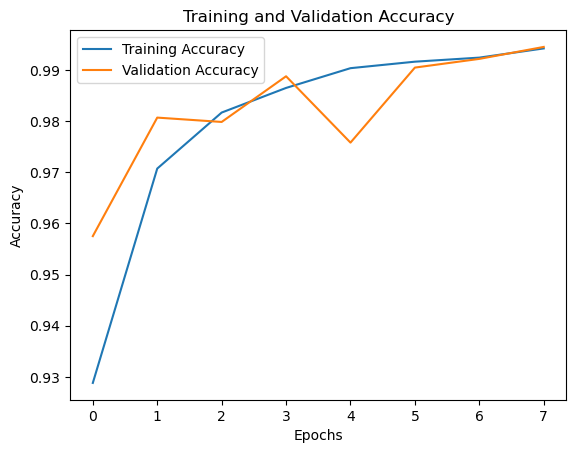

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

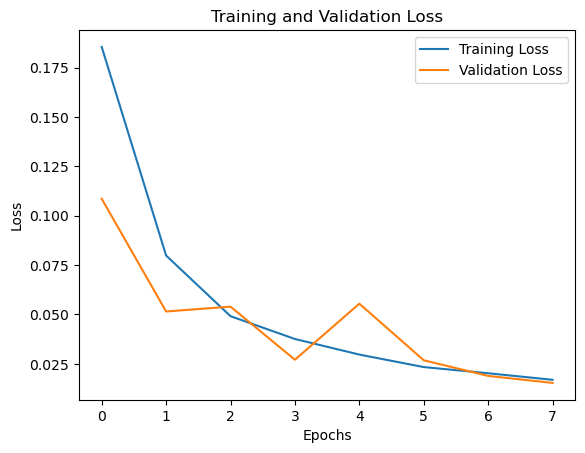

In [25]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

  1/211 ━━━━━━━━━━━━━━━━━━━━ 33s 158ms/step - accuracy: 1.0000 - loss: 1.0005e-04

2024-12-01 18:52:44.861598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.863787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.864843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.866430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.896767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.902694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.930338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.930795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:44.936515: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  2/211 ━━━━━━━━━━━━━━━━━━━━ 44s 212ms/step - accuracy: 1.0000 - loss: 0.0023    

2024-12-01 18:52:45.071309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.110536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.114675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.128873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.134381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.146319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.150196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.162906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.164855: W tensorflow/core/lib/png/png_io.cc:89] PNG 

  4/211 ━━━━━━━━━━━━━━━━━━━━ 32s 159ms/step - accuracy: 0.9889 - loss: 0.3905

2024-12-01 18:52:45.277938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.289790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.308183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.311256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.312791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.318094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.331418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.333289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.336150: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 10/211 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.9761 - loss: 0.7821

2024-12-01 18:52:45.661900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.662955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.720244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.732174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.734419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.858683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.860356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/211 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9740 - loss: 0.8343

2024-12-01 18:52:45.863440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.925803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.928009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.929625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:45.998461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/211 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9706 - loss: 0.9286

2024-12-01 18:52:46.135712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.139559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.205576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.215171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.217976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.218347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.279923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.282993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.284024: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 20/211 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9686 - loss: 0.9738

2024-12-01 18:52:46.351620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.433869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.491891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.492266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.501943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/211 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9674 - loss: 0.9971

2024-12-01 18:52:46.570047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.683665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.685825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.688556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.694089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.694886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.771732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/211 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9664 - loss: 1.0145

2024-12-01 18:52:46.774172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.849280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.860035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.864116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.917566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.917914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.920756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/211 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9656 - loss: 1.0251

2024-12-01 18:52:46.977244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.981183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:46.982038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.042939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.125203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.135087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.143837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/211 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.9638 - loss: 1.0515

2024-12-01 18:52:47.264543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.336089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.345566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.345842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.400138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.404743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.404895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.410042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.472393: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 36/211 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.9626 - loss: 1.0731

2024-12-01 18:52:47.486899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.533959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.538153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.628854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.657313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.679056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.684848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/211 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9618 - loss: 1.0877

2024-12-01 18:52:47.762758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.765553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.917093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.927902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/211 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9608 - loss: 1.1052

2024-12-01 18:52:47.993692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.995533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.997948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:47.998203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.000427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.066413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.068511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.072110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.072329: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 44/211 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.9600 - loss: 1.1200

2024-12-01 18:52:48.212221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.217647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.221509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.286472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.292666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.295734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.299931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.300011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.358940: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 47/211 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9593 - loss: 1.1312

2024-12-01 18:52:48.460402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.464336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.467109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.473571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.531842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.534683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.534768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.545484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.551531: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 51/211 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9586 - loss: 1.1437

2024-12-01 18:52:48.692806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.693774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.695452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.737188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.737341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.748145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.820552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.827456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.834792: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 55/211 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.9579 - loss: 1.1535

2024-12-01 18:52:48.972320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.974759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:48.978382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.066986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.161932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.168308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.170159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/211 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9574 - loss: 1.1611

2024-12-01 18:52:49.239639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.251355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.306042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.433613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/211 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9571 - loss: 1.1662

2024-12-01 18:52:49.494672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.595115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.660355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.672852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/211 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9568 - loss: 1.1705

2024-12-01 18:52:49.719329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.724439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.725861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.786714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.787673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.861665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.863528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.865645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.867258: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 69/211 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9566 - loss: 1.1729

2024-12-01 18:52:49.926623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.931749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.990654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.996906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:49.998144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.005117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.008038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.021215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.064905: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 71/211 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9564 - loss: 1.1743

2024-12-01 18:52:50.135508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.136512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.196860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.198000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.204280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.204378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.208201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.279598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/211 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9563 - loss: 1.1761

2024-12-01 18:52:50.363751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.435446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.437628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.438074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.443667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.483186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.485221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.489183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.495857: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 78/211 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9562 - loss: 1.1761 

2024-12-01 18:52:50.630182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.637620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.779065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.780766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.782061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/211 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9561 - loss: 1.1770

2024-12-01 18:52:50.841396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.850990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.858257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.912815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.917135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.920758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.920843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.934254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:50.975334: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 85/211 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9560 - loss: 1.1783

2024-12-01 18:52:51.063941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.094243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.094601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.163344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.167451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.168435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.168944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.173225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.240731: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 89/211 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9558 - loss: 1.1816

2024-12-01 18:52:51.302168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.304062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.306816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.310853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.355195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.356975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.361990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.362547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.426374: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 92/211 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9557 - loss: 1.1839

2024-12-01 18:52:51.509610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.624297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.628832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.632086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.632462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.634333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.636485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.724855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/211 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9556 - loss: 1.1858

2024-12-01 18:52:51.727700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.739430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.773061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.778168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.793750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.846757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.854955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.862539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.919855: W tensorflow/core/lib/png/png_io.cc:89] PNG 

 99/211 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9555 - loss: 1.1883

2024-12-01 18:52:51.971253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.971319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:51.978793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.042802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.057769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.057931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.103357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.161876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.169010: W tensorflow/core/lib/png/png_io.cc:89] PNG 

102/211 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9554 - loss: 1.1894

2024-12-01 18:52:52.179990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.229166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.229976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.231669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.232880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.234108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.298648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.302470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.302795: W tensorflow/core/lib/png/png_io.cc:89] PNG 

106/211 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9553 - loss: 1.1903

2024-12-01 18:52:52.445163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.457840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.515745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.516758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.517494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.521588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.574318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.581434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.583137: W tensorflow/core/lib/png/png_io.cc:89] PNG 

107/211 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9553 - loss: 1.1903

2024-12-01 18:52:52.652226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:52.826826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


111/211 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9552 - loss: 1.1901

2024-12-01 18:52:53.026390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.102941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.106701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.110610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.111505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.174076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.227623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/211 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9552 - loss: 1.1898

2024-12-01 18:52:53.327384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.335010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.418071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.499244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.499540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.499660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.504326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.504429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


117/211 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9551 - loss: 1.1895

2024-12-01 18:52:53.561848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.568816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.568876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.575135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.577933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.636919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.717767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.738134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/211 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9551 - loss: 1.1890

2024-12-01 18:52:53.816065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.829400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.874020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.889568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.890361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:53.948728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


123/211 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9551 - loss: 1.1886

2024-12-01 18:52:54.032677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.127783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.143498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.213475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/211 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9551 - loss: 1.1885

2024-12-01 18:52:54.256373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.256440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.259636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.331799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.331844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.398975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.399743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.405731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/211 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9550 - loss: 1.1885

2024-12-01 18:52:54.474828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.477275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.480195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.486925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.542185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.550638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.611407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.613188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.626588: W tensorflow/core/lib/png/png_io.cc:89] PNG 

133/211 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9550 - loss: 1.1883

2024-12-01 18:52:54.695769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.734783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.750809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.809887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.812867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.864312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.866959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/211 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9550 - loss: 1.1878

2024-12-01 18:52:54.927312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.995603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:54.995737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.004186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.007108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.011212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.013107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.077924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.080672: W tensorflow/core/lib/png/png_io.cc:89] PNG 

139/211 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9550 - loss: 1.1871

2024-12-01 18:52:55.139131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.144663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.218789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.225559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.290717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.293752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/211 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9550 - loss: 1.1862

2024-12-01 18:52:55.414548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.444958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.484360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.492762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.617149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/211 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9550 - loss: 1.1855

2024-12-01 18:52:55.695018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.702394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.767400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.769195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.783879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.784490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.850947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.858206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.864689: W tensorflow/core/lib/png/png_io.cc:89] PNG 

151/211 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9550 - loss: 1.1845

2024-12-01 18:52:55.918146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.926443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:55.996316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.003597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.065427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.065446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.065512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.073210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


153/211 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9550 - loss: 1.1840

2024-12-01 18:52:56.125798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.203191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.208279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.210099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.274225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/211 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9550 - loss: 1.1835

2024-12-01 18:52:56.342178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.404034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.410859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.419490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.421648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.423006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.483468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/211 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9550 - loss: 1.1831

2024-12-01 18:52:56.606955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.612871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.615371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.692356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.770544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/211 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9550 - loss: 1.1826

2024-12-01 18:52:56.859335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.978648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.987690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:56.995489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.049908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.053118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/211 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9550 - loss: 1.1820

2024-12-01 18:52:57.128265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.130680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.135470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.197380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.247478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.255805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.268484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.269353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.328181: W tensorflow/core/lib/png/png_io.cc:89] PNG 

170/211 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9550 - loss: 1.1815

2024-12-01 18:52:57.333344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.336893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.340366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.387104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.387746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.389394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.389432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.390552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/211 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9550 - loss: 1.1804

2024-12-01 18:52:57.552786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.657198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.657224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.658607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.692569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.697359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.711628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


176/211 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9550 - loss: 1.1801

2024-12-01 18:52:57.775082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.777810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.777979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.839089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.841907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.910816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.920144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.921961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.924955: W tensorflow/core/lib/png/png_io.cc:89] PNG 

180/211 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9550 - loss: 1.1793

2024-12-01 18:52:57.997346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:57.998091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.002558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.074423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.080849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.192979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.197284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


184/211 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9550 - loss: 1.1786

2024-12-01 18:52:58.270311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.345066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.406271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.412063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


186/211 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9550 - loss: 1.1782

2024-12-01 18:52:58.484651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.486552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.488473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.504332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.545496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.570142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


189/211 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9550 - loss: 1.1778

2024-12-01 18:52:58.700327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.706314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.710098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.711222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.713411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.779086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.784046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-01 18:52:58.882603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.9550 - loss: 1.1746
Training Accuracy: 0.9942
Validation Accuracy: 0.9945
Test Accuracy: 0.9552


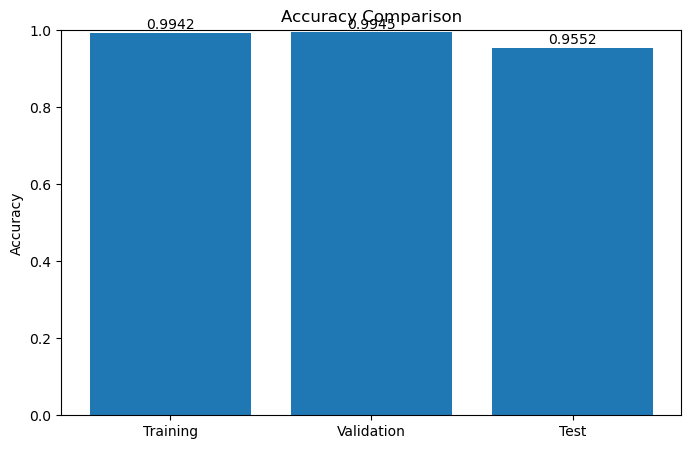

In [26]:
# Get training accuracy from the last epoch
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Get test accuracy
test_loss, test_accuracy = model.evaluate(test_ds)

# Print all accuracies
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 5))
accuracies = [final_train_accuracy, final_val_accuracy, test_accuracy]
labels = ['Training', 'Validation', 'Test']

plt.bar(labels, accuracies)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()